In [1]:
import numpy as np
import scipy 
import scipy.stats
from scipy import stats
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from itertools import groupby
import pickle
import os
import math
from sympy import S, symbols
from string import digits
from numpy import *
from scipy.integrate import simps

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
#sns.mpl.rcParams['figure.figsize'] = (16, 10)

# Directory to store pickled dataframes
directory = '/Users/dianaow/Documents/formula-1-race-data/dataframes/'

In [2]:
def read_from_pickle(directory, filename):
    df = pd.DataFrame()
    filepath = directory + filename
    with open(filepath, 'rb') as file:
        df = pickle.load(file)
            
    return df

In [3]:
df_races_maxlaps = read_from_pickle(directory, "df_races_maxlaps.pickle")
df_tyres = read_from_pickle(directory, "df_tyres.pickle")

tyre_degrad_nomin = read_from_pickle(directory, "tyre_degrad_nomin.pickle")
tyre_degrad_top10 = read_from_pickle(directory, "tyre_degrad_top10.pickle")
tyre_degrad_top10_tyre_stint = read_from_pickle(directory, "tyre_degrad_top10_tyre_stint.pickle")
tyre_degrad_rl = read_from_pickle(directory, "tyre_degrad_rl.pickle")

### Compare coefficients derived from the various methods of aggregation

In [4]:
df_tyres_trunc = df_tyres[df_tyres['year'] == 2017].drop(['session', 'stint 1', 'stint 2', 'stint 3', 'stint 4', 'fourth set'], axis=1)
for i,row in df_tyres_trunc.iterrows():
    if (df_tyres_trunc.loc[i,'first set'] == df_tyres_trunc.loc[i,'second set']):
        df_tyres_trunc.loc[i,'first set'] = df_tyres_trunc.loc[i,'first set'] + " 1"
        df_tyres_trunc.loc[i,'second set'] = df_tyres_trunc.loc[i,'second set'] + " 2"
        
    elif (df_tyres_trunc.loc[i,'second set'] == df_tyres_trunc.loc[i,'third set']):
        df_tyres_trunc.loc[i,'second set'] = df_tyres_trunc.loc[i,'second set'] + " 1"
        df_tyres_trunc.loc[i,'third set'] = df_tyres_trunc.loc[i,'third set'] + " 2"
    
    elif (df_tyres_trunc.loc[i,'first set'] == df_tyres_trunc.loc[i,'third set']):
        df_tyres_trunc.loc[i,'first set'] = df_tyres_trunc.loc[i,'first set'] + " 1"
        df_tyres_trunc.loc[i,'third set'] = df_tyres_trunc.loc[i,'third set'] + " 2"

In [5]:
tyre_degrad_top10_tyre_stint

coeffs  \
0                     [-59.0792599763, 763.946370888]   
1                     [-33.4980945986, 1431.01260134]   
2                     [-7.54333446438, 272.449831748]   
3                     [11.9874009763, -434.632297391]   
4                    [-17.5445821899, -9.67909628761]   
5                     [8.90893174551, -1314.59409116]   
6                    [-3.68012164383, -196.230725741]   
7                     [17.1958975988, -1613.67515545]   
8                      [8.2582675907, -305.476981416]   
9                     [6.21269205078, -757.160799243]   
10                     [-6.1538730093, 172.894465782]   
11                    [9.45322805274, -1523.20904536]   
12                    [69.3666033458, -2805.18597139]   
13  Did not run a full stint on this tyre during t...   
14                     [-29.229860369, 2774.08528644]   
15                    [-36.1427270791, 3578.89589866]   
16  Did not run a full stint on this tyre during t...   
17                    [76.6515082418, -4419.50986611]   
18  Did not run a full stint on this tyre during t...   
19  Did not run a full stint on this tyre during t...   
20                    [-168.131540735, 3202.71327718]   
21                    [27.3921177089, -3515.84956968]   
22                    [-13.6049206672, 1049.42247299]   
23                    [24.2877747253, -2493.43337912]   
24  Did not run a full stint on this tyre during t...   
25                     [0.19199405393, 2.93118088518]   
26                     [3.38599764298, -215.48084299]   
27  Did not run a full stint on this tyre during t...   

                                            min point  year          tyre  \
0                                     [6.46543618855]  2016    Super soft   
1                                     [21.3596119196]  2016    Super soft   
2                                     [18.0589786277]  2016    Super soft   
3                                     [18.1287127315]  2016    Super soft   
4                                   [-0.275842883656]  2016          Soft   
5                                     [73.7795579039]  2016          Soft   
6                                    [-26.6609021022]  2016          Soft   
7                                     [46.9203525487]  2016          Soft   
8                                      [18.495221792]  2016        Medium   
9                                     [60.9366111385]  2016        Medium   
10                                    [14.0476140409]  2016        Medium   
11                                    [80.5655505645]  2016        Medium   
12                                    [20.2200038353]  2016           Wet   
13  Did not run a full stint on this tyre during t...  2016           Wet   
14                                    [47.4529342839]  2016           Wet   
15                                    [49.5105957393]  2016           Wet   
16  Did not run a full stint on this tyre during t...  2016  Intermediate   
17                                    [28.8285903793]  2016  Intermediate   
18  Did not run a full stint on this tyre during t...  2016  Intermediate   
19  Did not run a full stint on this tyre during t...  2016  Intermediate   
20                                    [9.52442731204]  2016    Ultra soft   
21                                    [64.1763007709]  2016    Ultra soft   
22                                    [38.5677542215]  2016    Ultra soft   
23                                    [51.3310380907]  2016    Ultra soft   
24  Did not run a full stint on this tyre during t...  2016          Hard   
25                                   [-7.63351995849]  2016          Hard   
26                                    [31.8194023904]  2016          Hard   
27  Did not run a full stint on this tyre during t...  2016          Hard   

    stint  
0     1.0  
1     2.0  
2     3.0  
3     4.0  
4     1.0  
5     2.0  
6     3.0  
7     4.0  
8     1.0  
9     2.0  
10    3.0  
11    4.0  
12 

In [6]:
list_of_dfs = [tyre_degrad_top10_tyre_stint, tyre_degrad_top10, tyre_degrad_nomin, tyre_degrad_rl]
coeffs_cols = ['coeffs(top10, season agg)', 'coeffs(top10, race agg)', 'coeffs(all drivers, race agg)', 'coeffs(race leaders)']
min_cols = ['min point(top10, season agg)', 'min point(top10, race agg)', 'min point(all drivers, race agg)', 'min point(race leaders)']
    
name = df_tyres_trunc.name.unique()
tyre = ['Ultra soft', 'Soft', 'Super soft', 'Medium', 'Wet', 'Intermediate', 'Hard']
stint = range(1,5)
    
def merge_all_coeffs(list_of_dfs, coeffs_cols, min_cols, name, tyre, stint):
        
    # Create template of all races, tyres, stints in 2016
    template = pd.DataFrame(list(itertools.product(name, tyre, stint)), columns=['name', 'tyre', 'stint'])

    # Merge all dfs to template
    t = pd.merge(template, list_of_dfs[0], on=['tyre', 'stint'], how='left')
    t.rename(columns={"coeffs": coeffs_cols[0], "min point": min_cols[0]}, inplace=True)
    
    # Loop through race specific dfs
    for i, df in enumerate(list_of_dfs[1:4]):
        df = df[df['coeffs'] != "Did not run a full stint on this tyre during the race"]
        t = pd.merge(t, df, on=['name','tyre', 'stint', 'year'], how='left')
        t.rename(columns={"coeffs": coeffs_cols[i+1], "min point": min_cols[i]}, inplace=True)
    
    return t

In [7]:
t = merge_all_coeffs(list_of_dfs, coeffs_cols, min_cols, name, tyre, stint)
t

name          tyre stint  \
0     Brazilian Grand Prix    Ultra soft     1   
1     Brazilian Grand Prix    Ultra soft     2   
2     Brazilian Grand Prix    Ultra soft     3   
3     Brazilian Grand Prix    Ultra soft     4   
4     Brazilian Grand Prix          Soft     1   
5     Brazilian Grand Prix          Soft     2   
6     Brazilian Grand Prix          Soft     3   
7     Brazilian Grand Prix          Soft     4   
8     Brazilian Grand Prix    Super soft     1   
9     Brazilian Grand Prix    Super soft     2   
10    Brazilian Grand Prix    Super soft     3   
11    Brazilian Grand Prix    Super soft     4   
12    Brazilian Grand Prix        Medium     1   
13    Brazilian Grand Prix        Medium     2   
14    Brazilian Grand Prix        Medium     3   
15    Brazilian Grand Prix        Medium     4   
16    Brazilian Grand Prix           Wet     1   
17    Brazilian Grand Prix           Wet     2   
18    Brazilian Grand Prix           Wet     3   
19    Brazilian Grand Prix           Wet     4   
20    Brazilian Grand Prix  Intermediate     1   
21    Brazilian Grand Prix  Intermediate     2   
22    Brazilian Grand Prix  Intermediate     3   
23    Brazilian Grand Prix  Intermediate     4   
24    Brazilian Grand Prix          Hard     1   
25    Brazilian Grand Prix          Hard     2   
26    Brazilian Grand Prix          Hard     3   
27    Brazilian Grand Prix          Hard     4   
28      Mexican Grand Prix    Ultra soft     1   
29      Mexican Grand Prix    Ultra soft     2   
..                     ...           ...   ...   
502  Australian Grand Prix          Hard     3   
503  Australian Grand Prix          Hard     4   
504   Abu Dhabi Grand Prix    Ultra soft     1   
505   Abu Dhabi Grand Prix    Ultra soft     2   
506   Abu Dhabi Grand Prix    Ultra soft     3   
507   Abu Dhabi Grand Prix    Ultra soft     4   
508   Abu Dhabi Grand Prix          Soft     1   
509   Abu Dhabi Grand Prix          Soft     2   
510   Abu Dhabi Grand Prix          Soft     3   
511   Abu Dhabi Grand Prix          Soft     4   
512   Abu Dhabi Grand Prix    Super soft     1   
513   Abu Dhabi Grand Prix    Super soft     2   
514   Abu Dhabi Grand Prix    Super soft     3   
515   Abu Dhabi Grand Prix    Super soft     4   
516   Abu Dhabi Grand Prix        Medium     1   
517   Abu Dhabi Grand Prix        Medium     2   
518   Abu Dhabi Grand Prix        Medium     3   
519   Abu Dhabi Grand Prix        Medium     4   
520   Abu Dhabi Grand Prix           Wet     1   
521   Abu Dhabi Grand Prix           Wet     2   
522   Abu Dhabi Grand Prix           Wet     3   
523   Abu Dhabi Grand Prix           Wet     4   
524   Abu Dhabi Grand Prix  Intermediate     1   
525   Abu Dhabi Grand Prix  Intermediate     2   
526   Abu Dhabi Grand Prix  Intermediate     3   
527   Abu Dhabi Grand Prix  Intermediate     4   
528   Abu Dhabi Grand Prix          Hard     1   
529   Abu Dhabi Grand Prix          Hard     2   
530   Abu Dhabi Grand Prix          Hard     3   
531   Abu Dhabi Grand Prix          Hard     4   

                             coeffs(top10, season agg)  \
0                      [-168.131540735, 3202.71327718]   
1                      [27.3921177089, -3515.84956968]   
2                      [-13.6049206672, 1049.42247299]   
3                      [24.2877747253, -2493.43337912]   
4                     [-17.5445821899, -9.67909628761]   
5                      [8.90893174551, -1314.59409116]   
6                     [-3.68012164383, -196.230725741]   
7                      [17.1958975988, -1613.67515545]   
8                      [-59.0792599763, 763.946370888]   
9                      [-33.4980945986, 1431.01260134]   
10                     [-7.54333446438, 272.449831748]   
11                     [11.9874009763, -434.632297391]   
12                      [8.2582675907, -305.476981416]   
13                     [6.21269205078, -757.160799243]   
14                      [-6.1538730093, 172.8944657

In [8]:
t1 = t.copy(deep=True)
t2 = t.copy(deep=True)

### Select coeffs of race leaders, followed by top10 race agg, followed by all drivers race agg

#### Inital plot of season agg coeffs show high variance as compared to the plot lines of race leaders, top10 drivers, so they will not be used in the model

In [9]:
def select_coeffs(df):

    # For race_leaders, fill in with race leaders ,followed by race agg, followed by season agg
    df['coeffs'] = df['coeffs(race leaders)']
    df['coeffs'].fillna(df['coeffs(top10, race agg)'], inplace=True) 
    df['coeffs'].fillna(df['coeffs(all drivers, race agg)'], inplace=True) 
    
    # Clean df
    df.replace("Did not run a full stint on this tyre during the race", "None", inplace=True)
    df.fillna("None", inplace=True)

    # Label which coeffs are from which type of aggregation (indiv, per race, per season)
    for i,row in df.iterrows():
        if (df.loc[i,'coeffs(top10, race agg)'] != "None") & (df.loc[i,'coeffs(all drivers, race agg)'] != "None") & (df.loc[i,'coeffs(race leaders)'] != "None"):
            df.loc[i,'type'] = "race leader"
        elif (df.loc[i,'coeffs(top10, race agg)'] != "None") & (df.loc[i,'coeffs(all drivers, race agg)'] != "None") & (df.loc[i,'coeffs(race leaders)'] == "None"):
            df.loc[i,'type'] = "top10, race agg"
        elif (df.loc[i,'coeffs(top10, race agg)'] == "None") & (df.loc[i,'coeffs(all drivers, race agg)'] != "None") & (df.loc[i,'coeffs(race leaders)'] == "None"):
            df.loc[i,'type'] = "all drivers, race agg"
            
    return df

In [10]:
race_leaders = select_coeffs(t1)

/Users/dianaow/anaconda2/lib/python2.7/site-packages/pandas/core/missing.py:50: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [11]:
race_leaders = race_leaders[race_leaders['coeffs'] != "None"]
race_leaders

name          tyre  stint  \
16       Brazilian Grand Prix           Wet      1   
18       Brazilian Grand Prix           Wet      3   
32         Mexican Grand Prix          Soft      1   
41         Mexican Grand Prix        Medium      2   
60   United States Grand Prix          Soft      1   
61   United States Grand Prix          Soft      2   
70   United States Grand Prix        Medium      3   
88        Japanese Grand Prix          Soft      1   
109       Japanese Grand Prix          Hard      2   
110       Japanese Grand Prix          Hard      3   
116      Malaysian Grand Prix          Soft      1   
118      Malaysian Grand Prix          Soft      3   
140      Singapore Grand Prix    Ultra soft      1   
145      Singapore Grand Prix          Soft      2   
146      Singapore Grand Prix          Soft      3   
172        Italian Grand Prix          Soft      1   
181        Italian Grand Prix        Medium      2   
209        Belgian Grand Prix        Medium      2   
210        Belgian Grand Prix        Medium      3   
229      Hungarian Grand Prix          Soft      2   
230      Hungarian Grand Prix          Soft      3   
232      Hungarian Grand Prix    Super soft      1   
266        British Grand Prix        Medium      3   
273        British Grand Prix  Intermediate      2   
280       Austrian Grand Prix    Ultra soft      1   
285       Austrian Grand Prix          Soft      2   
290       Austrian Grand Prix    Super soft      3   
336       Canadian Grand Prix    Ultra soft      1   
341       Canadian Grand Prix          Soft      2   
345       Canadian Grand Prix    Super soft      2   
365         Monaco Grand Prix    Ultra soft      2   
380         Monaco Grand Prix           Wet      1   
396        Spanish Grand Prix          Soft      1   
398        Spanish Grand Prix          Soft      3   
405        Spanish Grand Prix        Medium      2   
425        Russian Grand Prix          Soft      2   
428        Russian Grand Prix    Super soft      1   
453        Bahrain Grand Prix          Soft      2   
455        Bahrain Grand Prix          Soft      4   
456        Bahrain Grand Prix    Super soft      1   
458        Bahrain Grand Prix    Super soft      3   
484     Australian Grand Prix    Super soft      1   
485     Australian Grand Prix    Super soft      2   
490     Australian Grand Prix        Medium      3   
509      Abu Dhabi Grand Prix          Soft      2   
510      Abu Dhabi Grand Prix          Soft      3   

            coeffs(top10, season agg) min point(top10, season agg)  year  \
16    [69.3666033458, -2805.18597139]              [20.2200038353]  2016   
18     [-29.229860369, 2774.08528644]              [47.4529342839]  2016   
32   [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
41    [6.21269205078, -757.160799243]              [60.9366111385]  2016   
60   [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
61    [8.90893174551, -1314.59409116]              [73.7795579039]  2016   
70     [-6.1538730093, 172.894465782]              [14.0476140409]  2016   
88   [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
109    [0.19199405393, 2.93118088518]             [-7.63351995849]  2016   
110    [3.38599764298, -215.48084299]              [31.8194023904]  2016   
116  [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
118  [-3.68012164383, -196.230725741]             [-26.6609021022]  2016   
140   [-168.131540735, 3202.71327718]              [9.52442731204]  2016   
145   [8.90893174551, -1314.59409116]              [73.7795579039]  2016   
146  [-3.68012164383, -196.230725741]             [-26.6609021022]  2016   
172  [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
181   [6.21269205078, -757.160799243]              [60.9366111385]  2016   
209   [6.21269205078, -757.160799243]              [60.9366111385]  2016   
210    [-6.1538730093, 172.894465782]     

### Select coeffs of top10 race agg, followed by all drivers race agg

In [12]:
def select_coeffs_1(df):

    # For race_leaders, fill in with race leaders ,followed by race agg, followed by season agg
    df['coeffs'] = df['coeffs(top10, race agg)']
    df['coeffs'].fillna(df['coeffs(all drivers, race agg)'], inplace=True)

    # Clean df
    df.replace("Did not run a full stint on this tyre during the race", "None", inplace=True)
    df.fillna("None", inplace=True)

    # Label which coeffs are from which type of aggregation (indiv, per race, per season)
    for i,row in df.iterrows():
        if (df.loc[i,'coeffs(all drivers, race agg)'] != "None") & (df.loc[i,'coeffs(top10, race agg)'] != "None"):
            df.loc[i,'type'] = "top10, race agg"
        elif (df.loc[i,'coeffs(all drivers, race agg)']!= "None") & (df.loc[i,'coeffs(top10, race agg)'] == "None"):
            df.loc[i,'type'] = "all drivers, race agg"
            
    return df

In [55]:
all_drivers = select_coeffs_1(t2)

In [56]:
all_drivers

name          tyre  stint  \
0     Brazilian Grand Prix    Ultra soft      1   
1     Brazilian Grand Prix    Ultra soft      2   
2     Brazilian Grand Prix    Ultra soft      3   
3     Brazilian Grand Prix    Ultra soft      4   
4     Brazilian Grand Prix          Soft      1   
5     Brazilian Grand Prix          Soft      2   
6     Brazilian Grand Prix          Soft      3   
7     Brazilian Grand Prix          Soft      4   
8     Brazilian Grand Prix    Super soft      1   
9     Brazilian Grand Prix    Super soft      2   
10    Brazilian Grand Prix    Super soft      3   
11    Brazilian Grand Prix    Super soft      4   
12    Brazilian Grand Prix        Medium      1   
13    Brazilian Grand Prix        Medium      2   
14    Brazilian Grand Prix        Medium      3   
15    Brazilian Grand Prix        Medium      4   
16    Brazilian Grand Prix           Wet      1   
17    Brazilian Grand Prix           Wet      2   
18    Brazilian Grand Prix           Wet      3   
19    Brazilian Grand Prix           Wet      4   
20    Brazilian Grand Prix  Intermediate      1   
21    Brazilian Grand Prix  Intermediate      2   
22    Brazilian Grand Prix  Intermediate      3   
23    Brazilian Grand Prix  Intermediate      4   
24    Brazilian Grand Prix          Hard      1   
25    Brazilian Grand Prix          Hard      2   
26    Brazilian Grand Prix          Hard      3   
27    Brazilian Grand Prix          Hard      4   
28      Mexican Grand Prix    Ultra soft      1   
29      Mexican Grand Prix    Ultra soft      2   
..                     ...           ...    ...   
502  Australian Grand Prix          Hard      3   
503  Australian Grand Prix          Hard      4   
504   Abu Dhabi Grand Prix    Ultra soft      1   
505   Abu Dhabi Grand Prix    Ultra soft      2   
506   Abu Dhabi Grand Prix    Ultra soft      3   
507   Abu Dhabi Grand Prix    Ultra soft      4   
508   Abu Dhabi Grand Prix          Soft      1   
509   Abu Dhabi Grand Prix          Soft      2   
510   Abu Dhabi Grand Prix          Soft      3   
511   Abu Dhabi Grand Prix          Soft      4   
512   Abu Dhabi Grand Prix    Super soft      1   
513   Abu Dhabi Grand Prix    Super soft      2   
514   Abu Dhabi Grand Prix    Super soft      3   
515   Abu Dhabi Grand Prix    Super soft      4   
516   Abu Dhabi Grand Prix        Medium      1   
517   Abu Dhabi Grand Prix        Medium      2   
518   Abu Dhabi Grand Prix        Medium      3   
519   Abu Dhabi Grand Prix        Medium      4   
520   Abu Dhabi Grand Prix           Wet      1   
521   Abu Dhabi Grand Prix           Wet      2   
522   Abu Dhabi Grand Prix           Wet      3   
523   Abu Dhabi Grand Prix           Wet      4   
524   Abu Dhabi Grand Prix  Intermediate      1   
525   Abu Dhabi Grand Prix  Intermediate      2   
526   Abu Dhabi Grand Prix  Intermediate      3   
527   Abu Dhabi Grand Prix  Intermediate      4   
528   Abu Dhabi Grand Prix          Hard      1   
529   Abu Dhabi Grand Prix          Hard      2   
530   Abu Dhabi Grand Prix          Hard      3   
531   Abu Dhabi Grand Prix          Hard      4   

            coeffs(top10, season agg) min point(top10, season agg)  year  \
0     [-168.131540735, 3202.71327718]              [9.52442731204]  2016   
1     [27.3921177089, -3515.84956968]              [64.1763007709]  2016   
2     [-13.6049206672, 1049.42247299]              [38.5677542215]  2016   
3     [24.2877747253, -2493.43337912]              [51.3310380907]  2016   
4    [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
5     [8.90893174551, -1314.59409116]              [73.7795579039]  2016   
6    [-3.68012164383, -196.230725741]             [-26.6609021022]  2016   
7     [17.1958975988, -1613.67515545]              [46.9203525487]  2016   
8     [-59.0792599763, 763.946370888]              [6.46543618855]  2016   
9     [-33.4980945986, 1431.01260134]              [21.3596119196]  2016   
10    [-7.54333446438, 

In [14]:
all_drivers = all_drivers[all_drivers['coeffs'] != "None"]
all_drivers

name        tyre  stint  \
16       Brazilian Grand Prix         Wet      1   
18       Brazilian Grand Prix         Wet      3   
19       Brazilian Grand Prix         Wet      4   
32         Mexican Grand Prix        Soft      1   
34         Mexican Grand Prix        Soft      3   
36         Mexican Grand Prix  Super soft      1   
41         Mexican Grand Prix      Medium      2   
42         Mexican Grand Prix      Medium      3   
60   United States Grand Prix        Soft      1   
61   United States Grand Prix        Soft      2   
64   United States Grand Prix  Super soft      1   
66   United States Grand Prix  Super soft      3   
69   United States Grand Prix      Medium      2   
70   United States Grand Prix      Medium      3   
88        Japanese Grand Prix        Soft      1   
90        Japanese Grand Prix        Soft      3   
96        Japanese Grand Prix      Medium      1   
98        Japanese Grand Prix      Medium      3   
109       Japanese Grand Prix        Hard      2   
110       Japanese Grand Prix        Hard      3   
116      Malaysian Grand Prix        Soft      1   
118      Malaysian Grand Prix        Soft      3   
119      Malaysian Grand Prix        Soft      4   
124      Malaysian Grand Prix      Medium      1   
125      Malaysian Grand Prix      Medium      2   
137      Malaysian Grand Prix        Hard      2   
138      Malaysian Grand Prix        Hard      3   
140      Singapore Grand Prix  Ultra soft      1   
141      Singapore Grand Prix  Ultra soft      2   
142      Singapore Grand Prix  Ultra soft      3   
..                        ...         ...    ...   
405        Spanish Grand Prix      Medium      2   
406        Spanish Grand Prix      Medium      3   
407        Spanish Grand Prix      Medium      4   
425        Russian Grand Prix        Soft      2   
428        Russian Grand Prix  Super soft      1   
429        Russian Grand Prix  Super soft      2   
430        Russian Grand Prix  Super soft      3   
433        Russian Grand Prix      Medium      2   
452        Bahrain Grand Prix        Soft      1   
453        Bahrain Grand Prix        Soft      2   
454        Bahrain Grand Prix        Soft      3   
455        Bahrain Grand Prix        Soft      4   
456        Bahrain Grand Prix  Super soft      1   
457        Bahrain Grand Prix  Super soft      2   
458        Bahrain Grand Prix  Super soft      3   
461        Bahrain Grand Prix      Medium      2   
463        Bahrain Grand Prix      Medium      4   
480     Australian Grand Prix        Soft      1   
482     Australian Grand Prix        Soft      3   
484     Australian Grand Prix  Super soft      1   
485     Australian Grand Prix  Super soft      2   
487     Australian Grand Prix  Super soft      4   
489     Australian Grand Prix      Medium      2   
490     Australian Grand Prix      Medium      3   
504      Abu Dhabi Grand Prix  Ultra soft      1   
508      Abu Dhabi Grand Prix        Soft      1   
509      Abu Dhabi Grand Prix        Soft      2   
510      Abu Dhabi Grand Prix        Soft      3   
512      Abu Dhabi Grand Prix  Super soft      1   
514      Abu Dhabi Grand Prix  Super soft      3   

            coeffs(top10, season agg) min point(top10, season agg)  year  \
16    [69.3666033458, -2805.18597139]              [20.2200038353]  2016   
18     [-29.229860369, 2774.08528644]              [47.4529342839]  2016   
19    [-36.1427270791, 3578.89589866]              [49.5105957393]  2016   
32   [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
34   [-3.68012164383, -196.230725741]             [-26.6609021022]  2016   
36    [-59.0792599763, 763.946370888]              [6.46543618855]  2016   
41    [6.21269205078, -757.160799243]              [60.9366111385]  2016   
42     [-6.1538730093, 172.894465782]              [14.0476140409]  2016   
60   [-17.5445821899, -9.67909628761]            [-0.275842883656]  2016   
61    [8.90893174551, -1314.59409116]   

### Plot the tyre degradation curves based on the coeffs selected

In [15]:
def plot_degradation_curves(tyre_degrad, name, year, column):

    plt.figure(figsize=(20,10))
    c_new = []
    model = tyre_degrad[tyre_degrad['name'] == name].reset_index(drop=True)
    model = model[model[column] != "Did not run a full stint on this tyre during the race"].reset_index(drop=True)

    #maxlaps = df_races_maxlaps[(df_races_maxlaps['name'] == name) & (df_races_maxlaps['year'] == year) ]['total laps']
    # I assume that you have 7types of tyres:
    #Super soft, Soft, Medium, Wet, Intermediate, Ultra soft, Hard
    #we will use one colour for each type of tyre, as requested, i propose following order

    #Super soft - b
    #Soft - g
    #Medium - r
    #Wet - c
    #Intermediate - m
    #Ultra soft - y
    #Hard - k


    t = linspace(0, 50)
    coeffs = model[column]
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    c = [coeffs[i](t) for i in range(len(coeffs))]
    for i in c:
        i = i-i[0]
        c_new.append(i)
        
    for idx, item in enumerate(c_new):

    	try:
    		if model['tyre'][idx] == 'Super soft':
        		plt.plot(t, item, color = colors[0], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Soft':
        		plt.plot(t, item, color = colors[1], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Medium':
        		plt.plot(t, item, color = colors[2], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Wet':
        		plt.plot(t, item, color = colors[3], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Intermediate':
        		plt.plot(t, item, color = colors[4], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Ultra soft':
        		plt.plot(t, item, color = colors[5], label=(model['stint'][idx], model['tyre'][idx]))
        	elif model['tyre'][idx] == 'Hard':
        		plt.plot(t, item, color = colors[6], label=(model['stint'][idx], model['tyre'][idx]))
        				
        except:
        	pass
        	
    plt.title(str(name))
    plt.xlabel('lap number', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    plt.legend(loc='upper left')
    plt.show()

In [16]:
def plot_degradation_curves1(tyre_degrad, name, year, column):

    plt.figure(figsize=(20,10))
    c_new = []
    model = tyre_degrad[tyre_degrad['name'] == name].reset_index(drop=True)
    model = model[model[column].notnull()].reset_index(drop=True)
    model = model[model[column] != "Did not run a full stint on this tyre during the race"].reset_index(drop=True)

    #maxlaps = df_races_maxlaps[(df_races_maxlaps['name'] == name) & (df_races_maxlaps['year'] == year) ]['total laps']

    t = linspace(0, 40)
    coeffs = model[column]
    colors = ['#000000', '#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#C2B280',
              '#848482', '#008856', '#E68FAC', '#0067A5', '#F99379', '#604E97', '#F6A600', '#B3446C', 
              '#DCD300', '#882D17', '#8DB600', '#654522', '#E25822', '#2B3D26']

    c = [coeffs[i](t) for i in range(len(coeffs))]
    for i in c:
        i = i-i[0]
        c_new.append(i)
        
    for idx, item in enumerate(c_new):
        
        plt.plot(t, item, color=colors[idx], label=(model['stint'][idx], model['tyre'][idx], model['type'][idx]))

    plt.title(str(name))
    plt.xlabel('lap number', fontsize=18)
    plt.ylabel('ylabel', fontsize=16)
    plt.legend(loc='upper left')
    plt.show()

#### The 10 drivers who make it through to Q3 must hand back the set of the softer compound tyres nominated for Q3, and start the race on the tyres with which they set their fastest time in Q2. All other drivers will be able to use the set that is saved for Q3 during the race.

In [17]:
# Groups
races = df_races_maxlaps[df_races_maxlaps['year'] == 2016].name.unique()
stint12 = [1,2]
stint123 = [1,2, 3]
sssm = ['Super soft', 'Soft', 'Medium']
ussss = ["Ultra soft", 'Super soft', 'Soft']
ussss123 = ["Canadian Grand Prix", "German Grand Prix", "Singapore Grand Prix", "Abu Dhabi Grand Prix"]
sssm12 = ["Russian Grand Prix", "Bahrain Grand Prix", "Chinese Grand Prix", "Azerbaijan Grand Prix"] 
sssm123 = ["Australian Grand Prix", "Bahrain Grand Prix", "Chinese Grand Prix", "Spanish Grand Prix", "Italian Grand Prix"]

### 1) Coeffs selected in the following priority order: Race leaders, top 10 drivers, all drivers

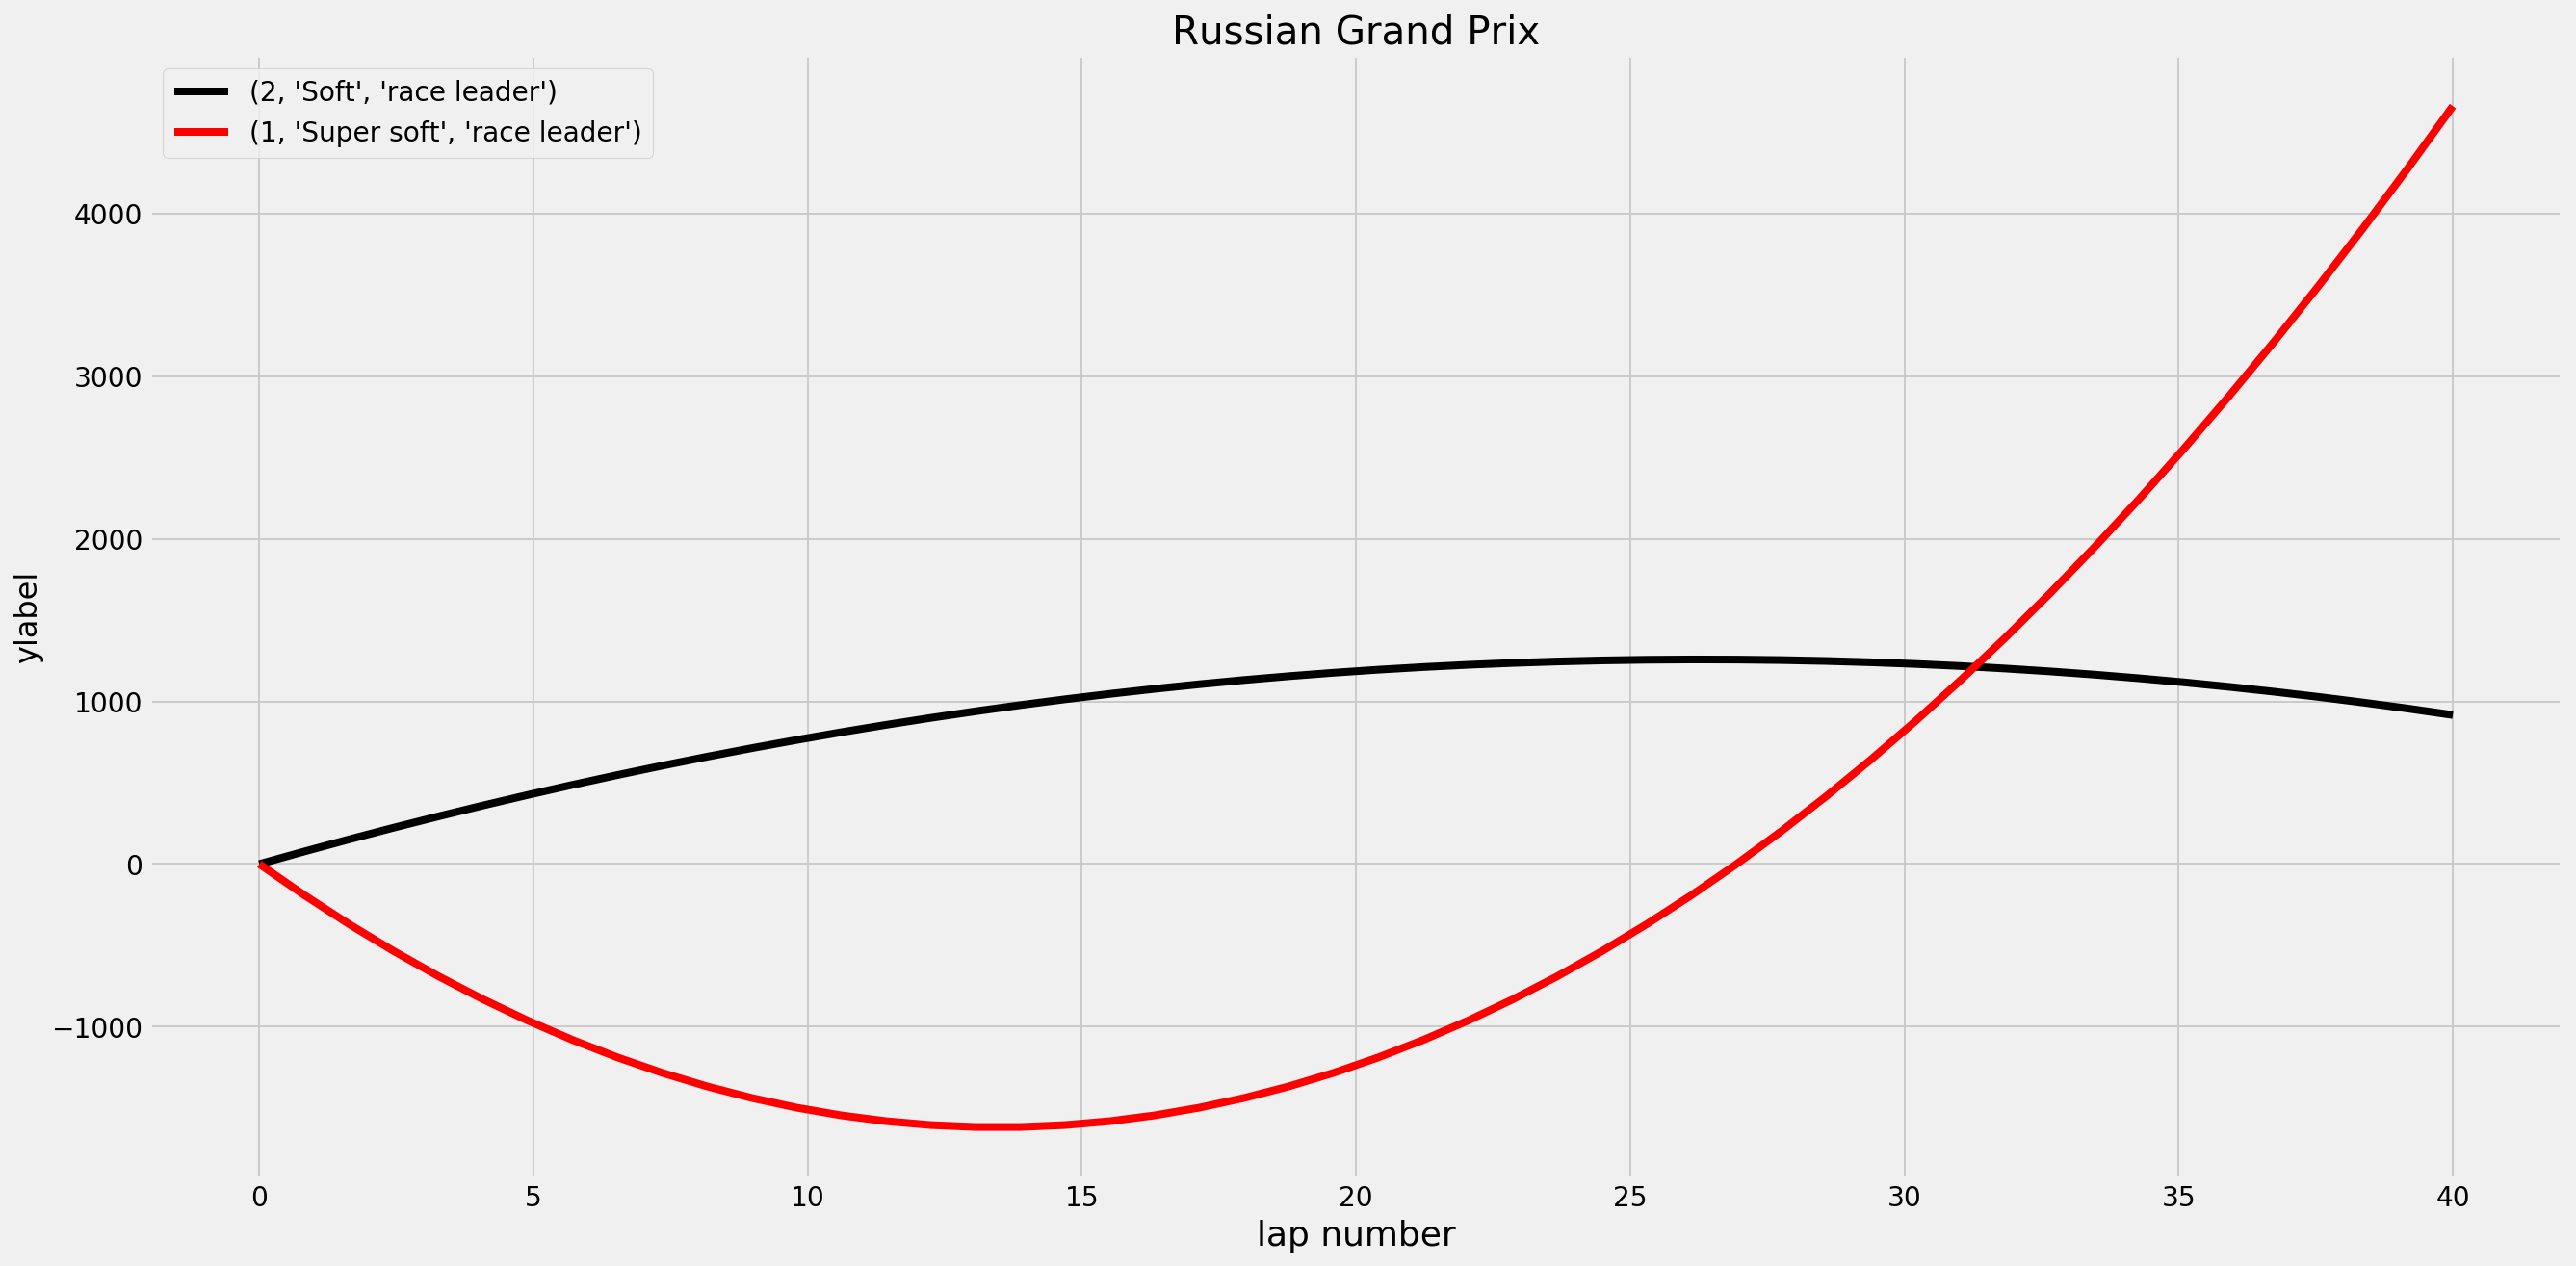

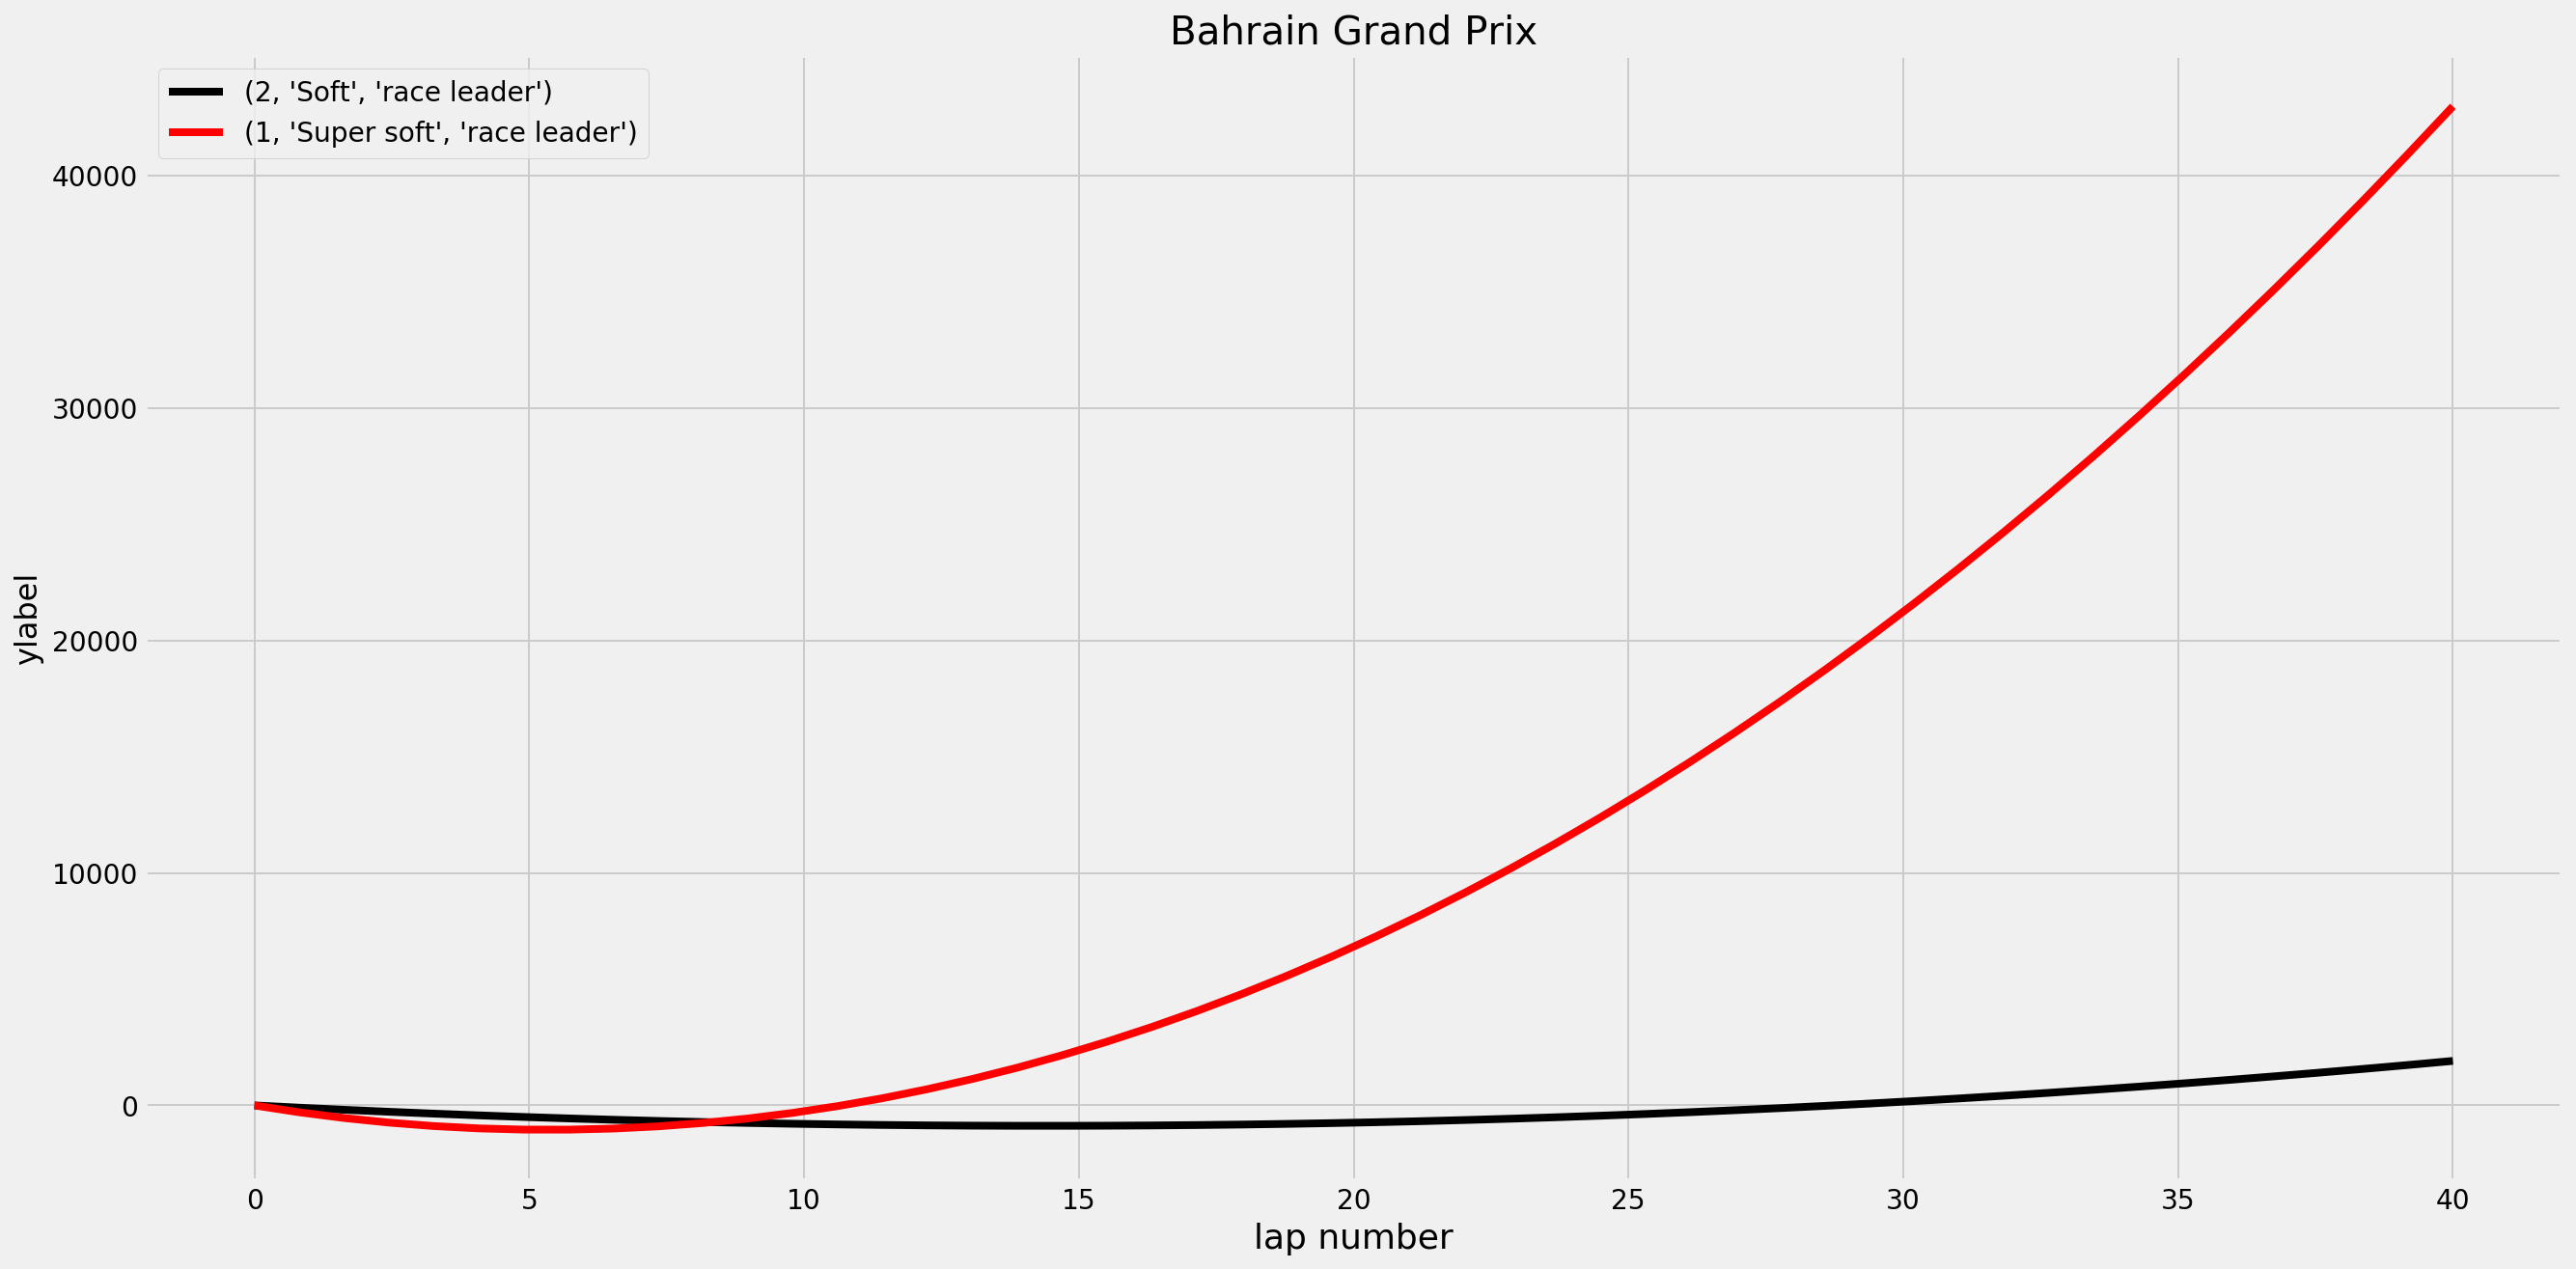

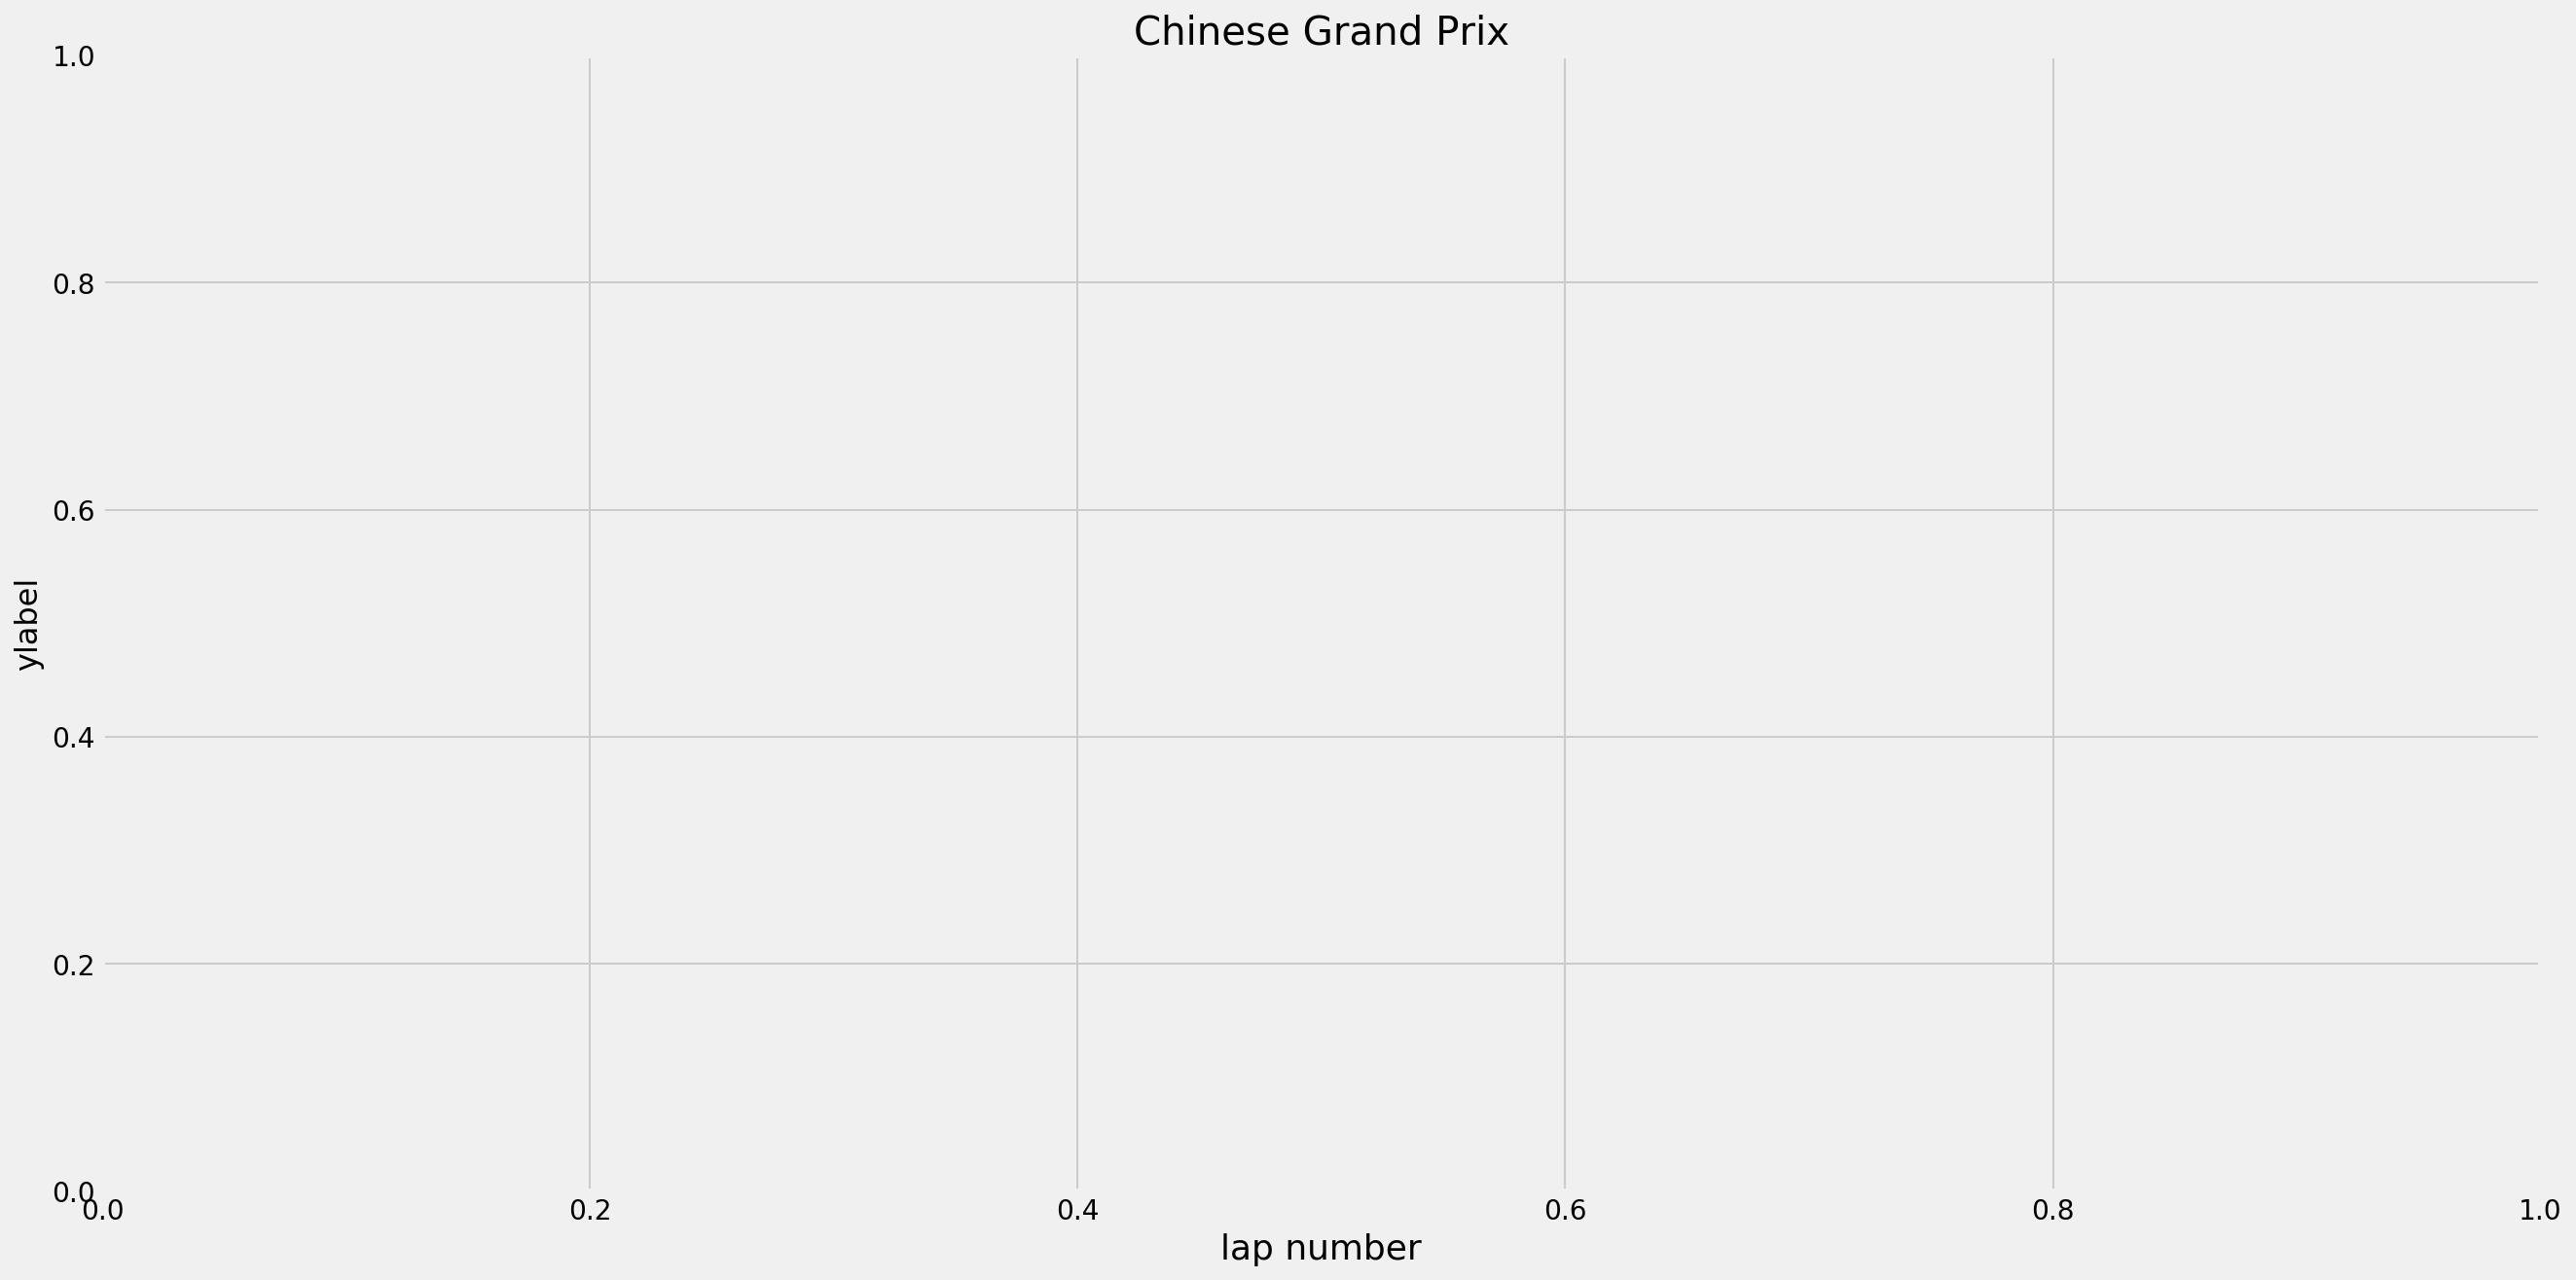

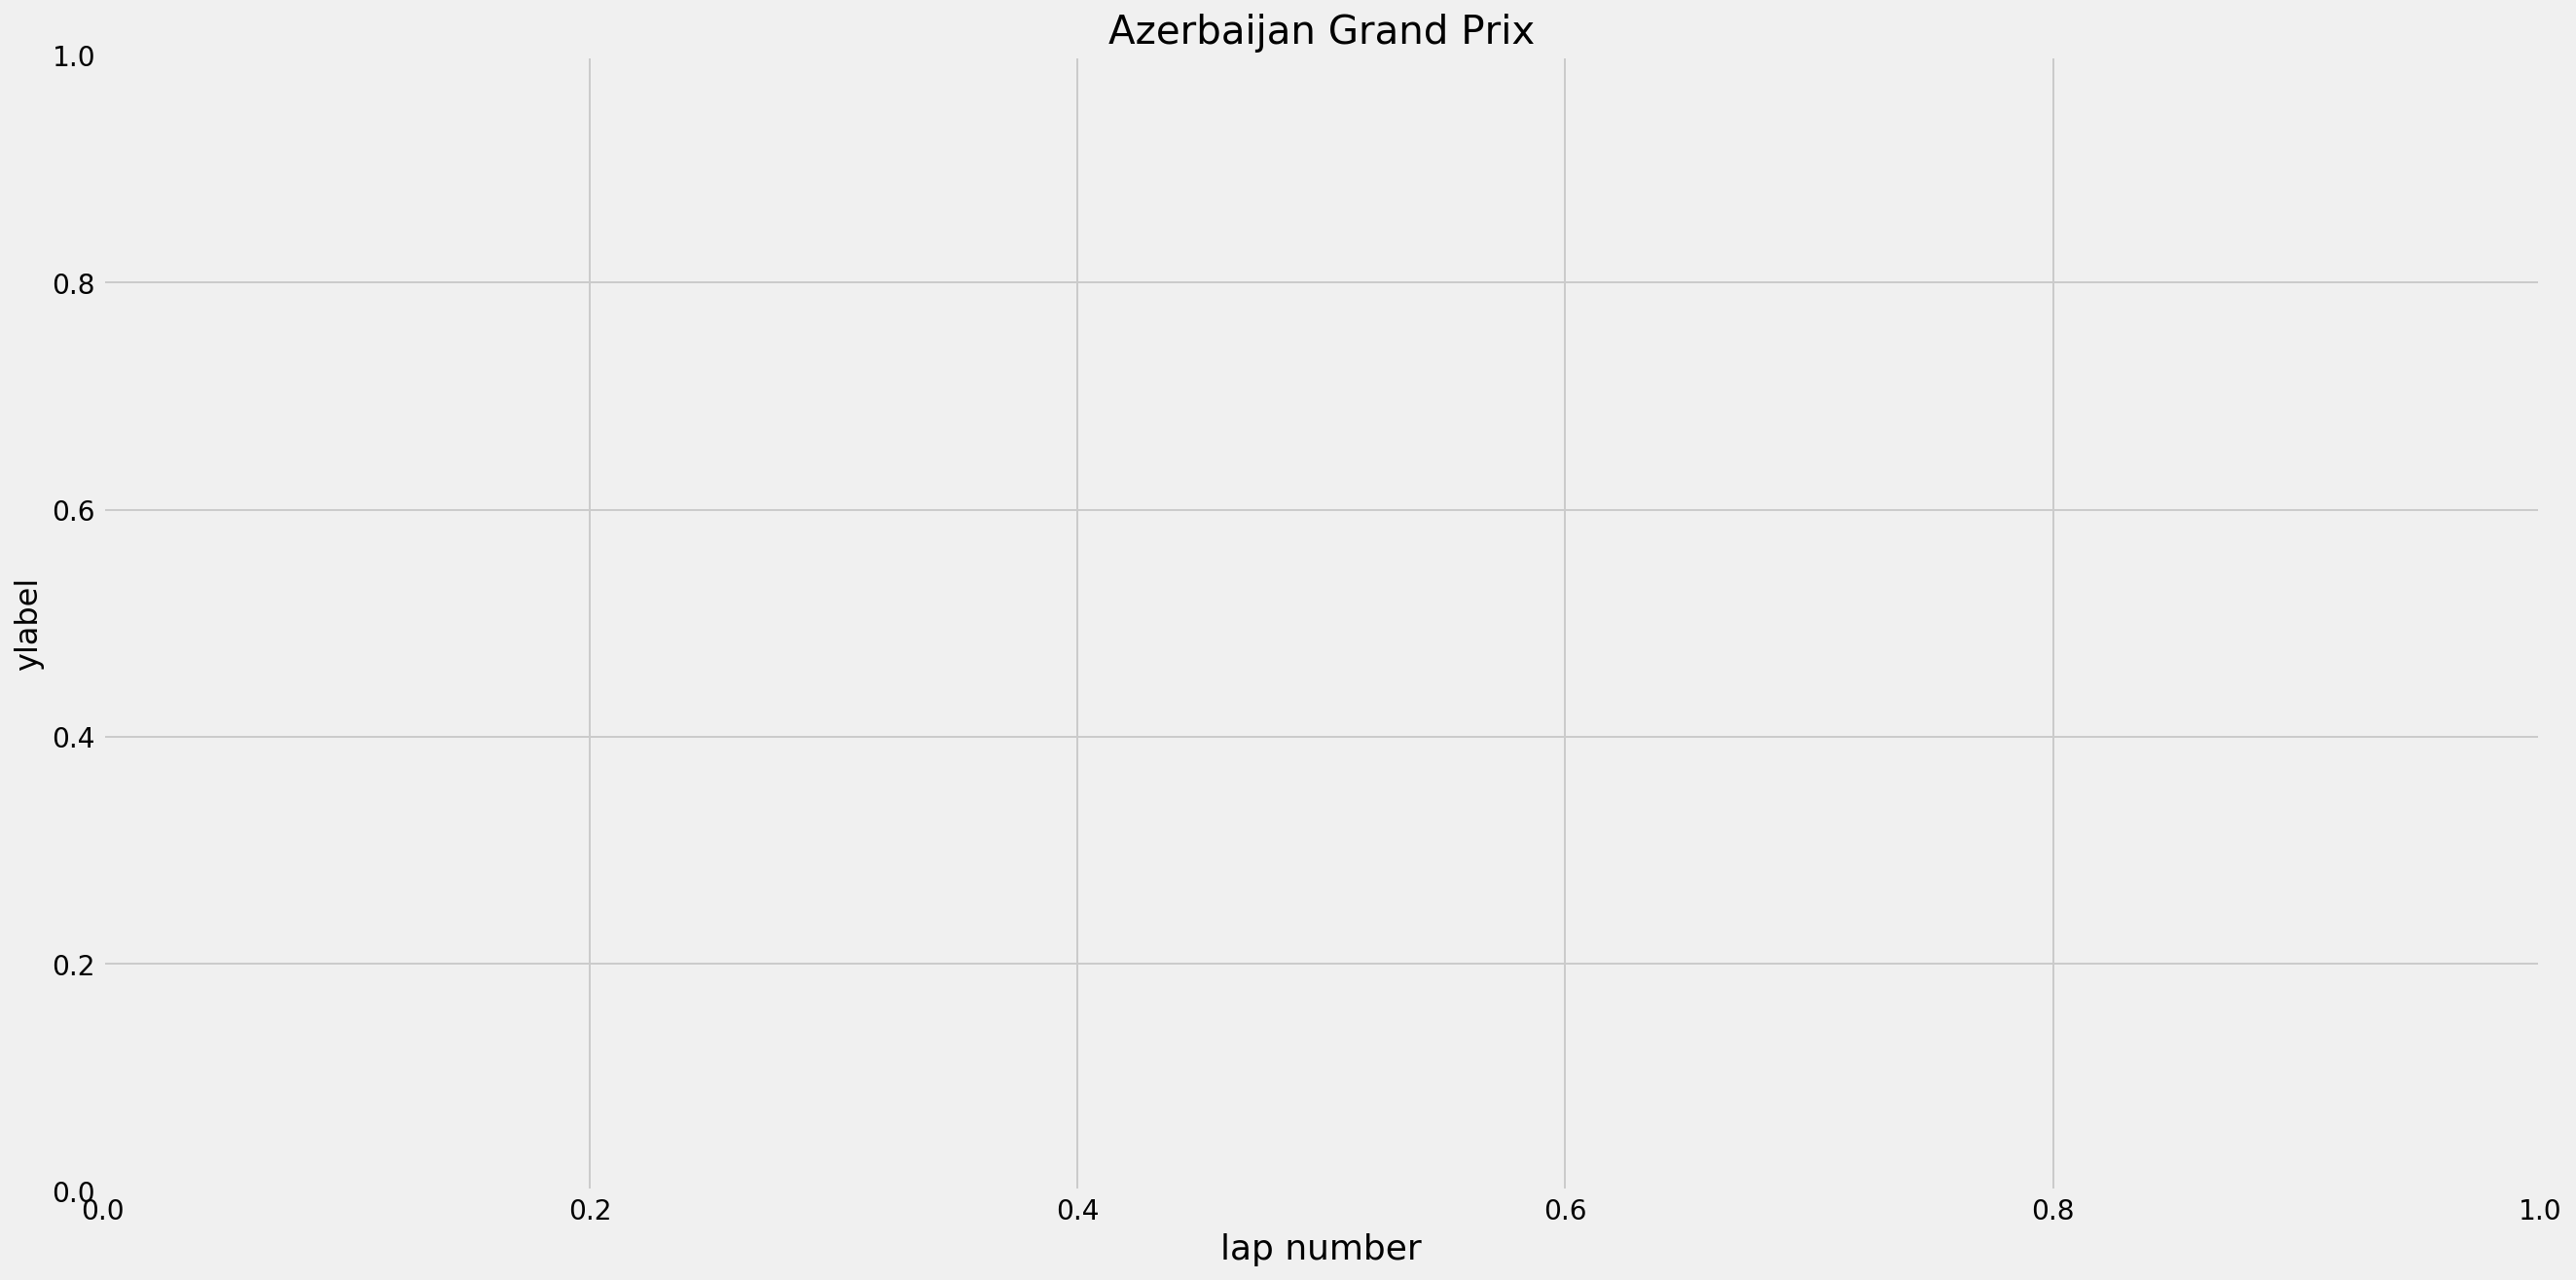

In [18]:
plot_sssm12 = race_leaders[(race_leaders['tyre'].isin(sssm)) & \
                    (race_leaders['stint'].isin(stint12))]
for name in sssm12:
    plot_degradation_curves1(plot_sssm12, name, 2016, "coeffs")

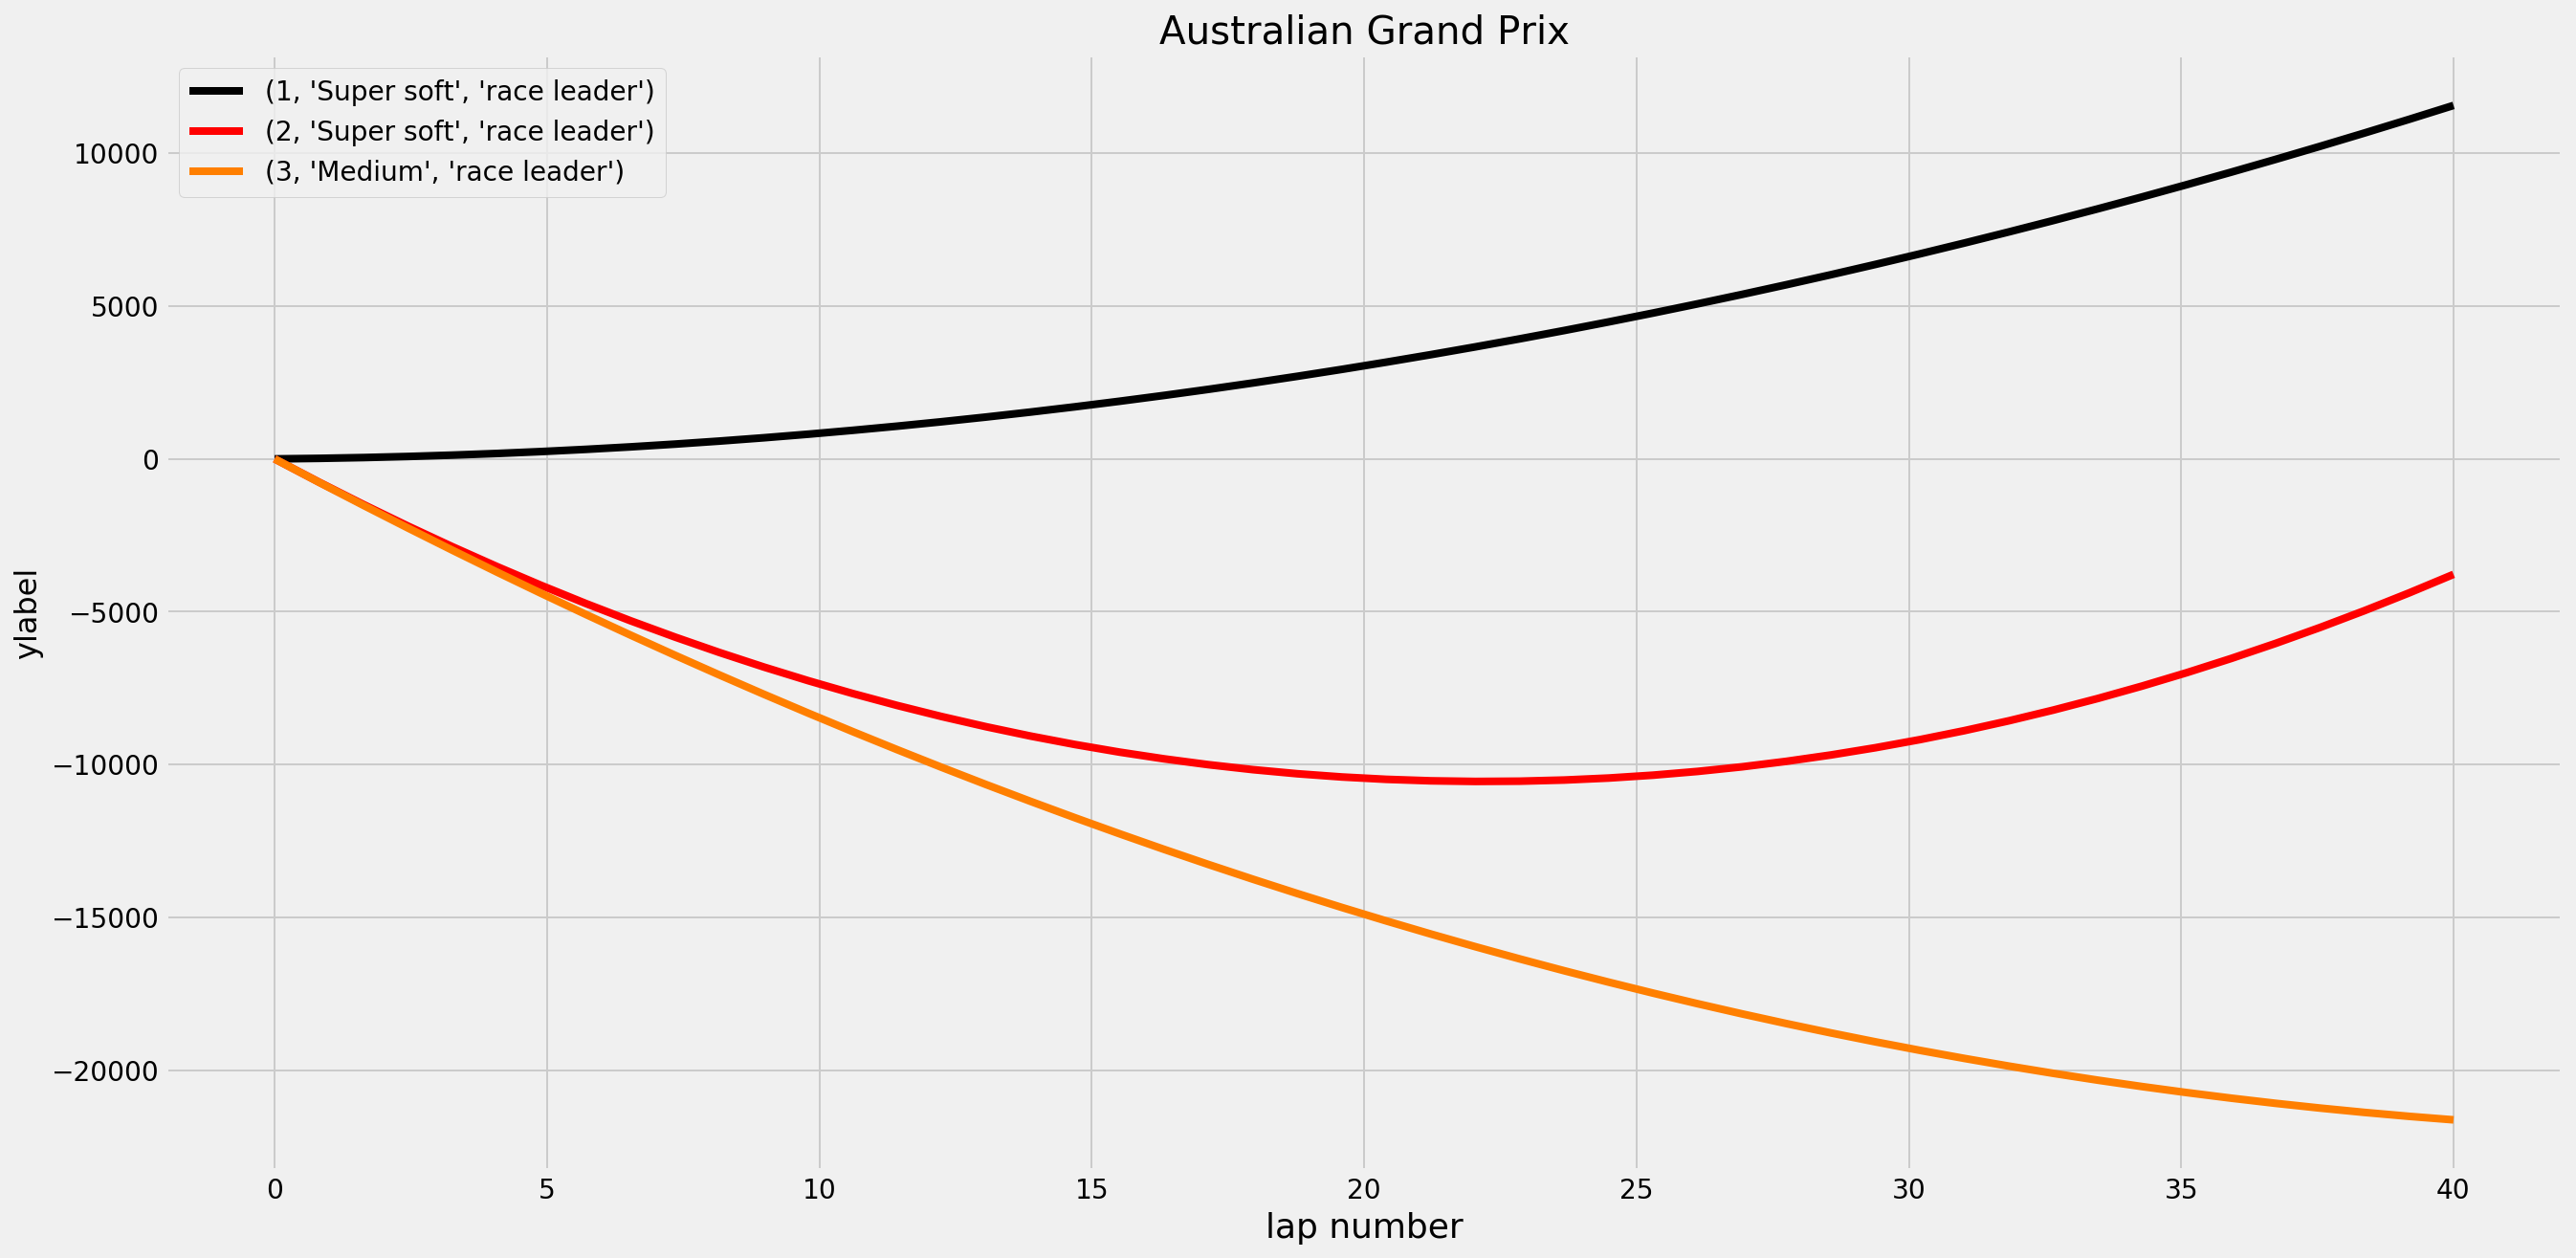

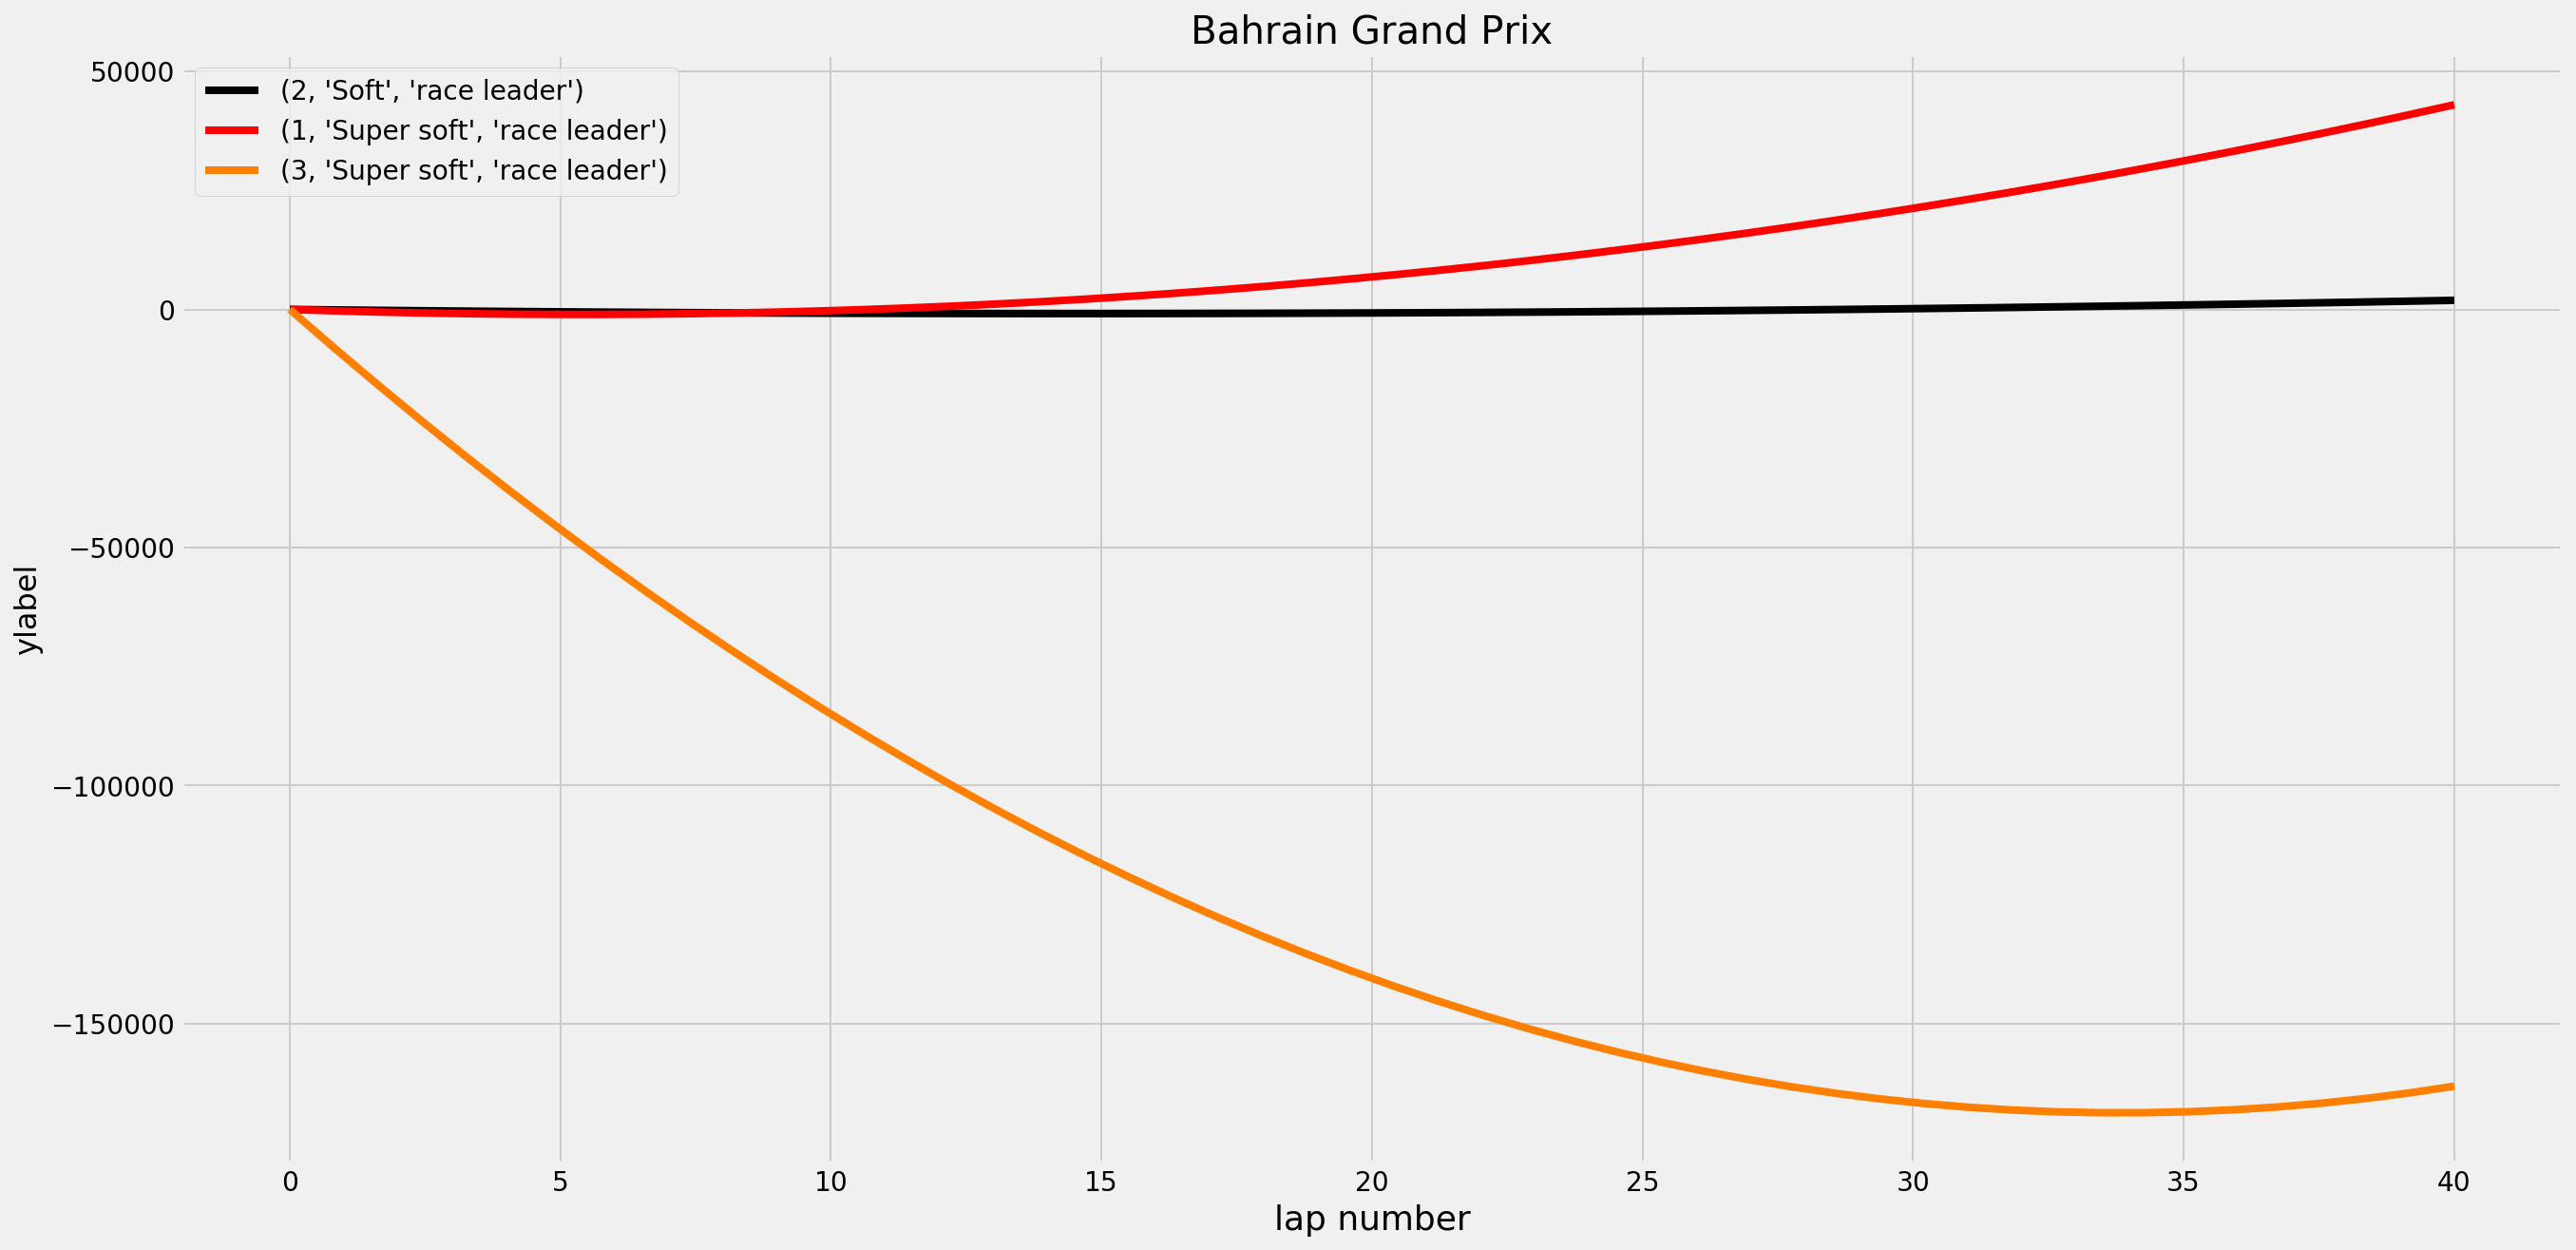

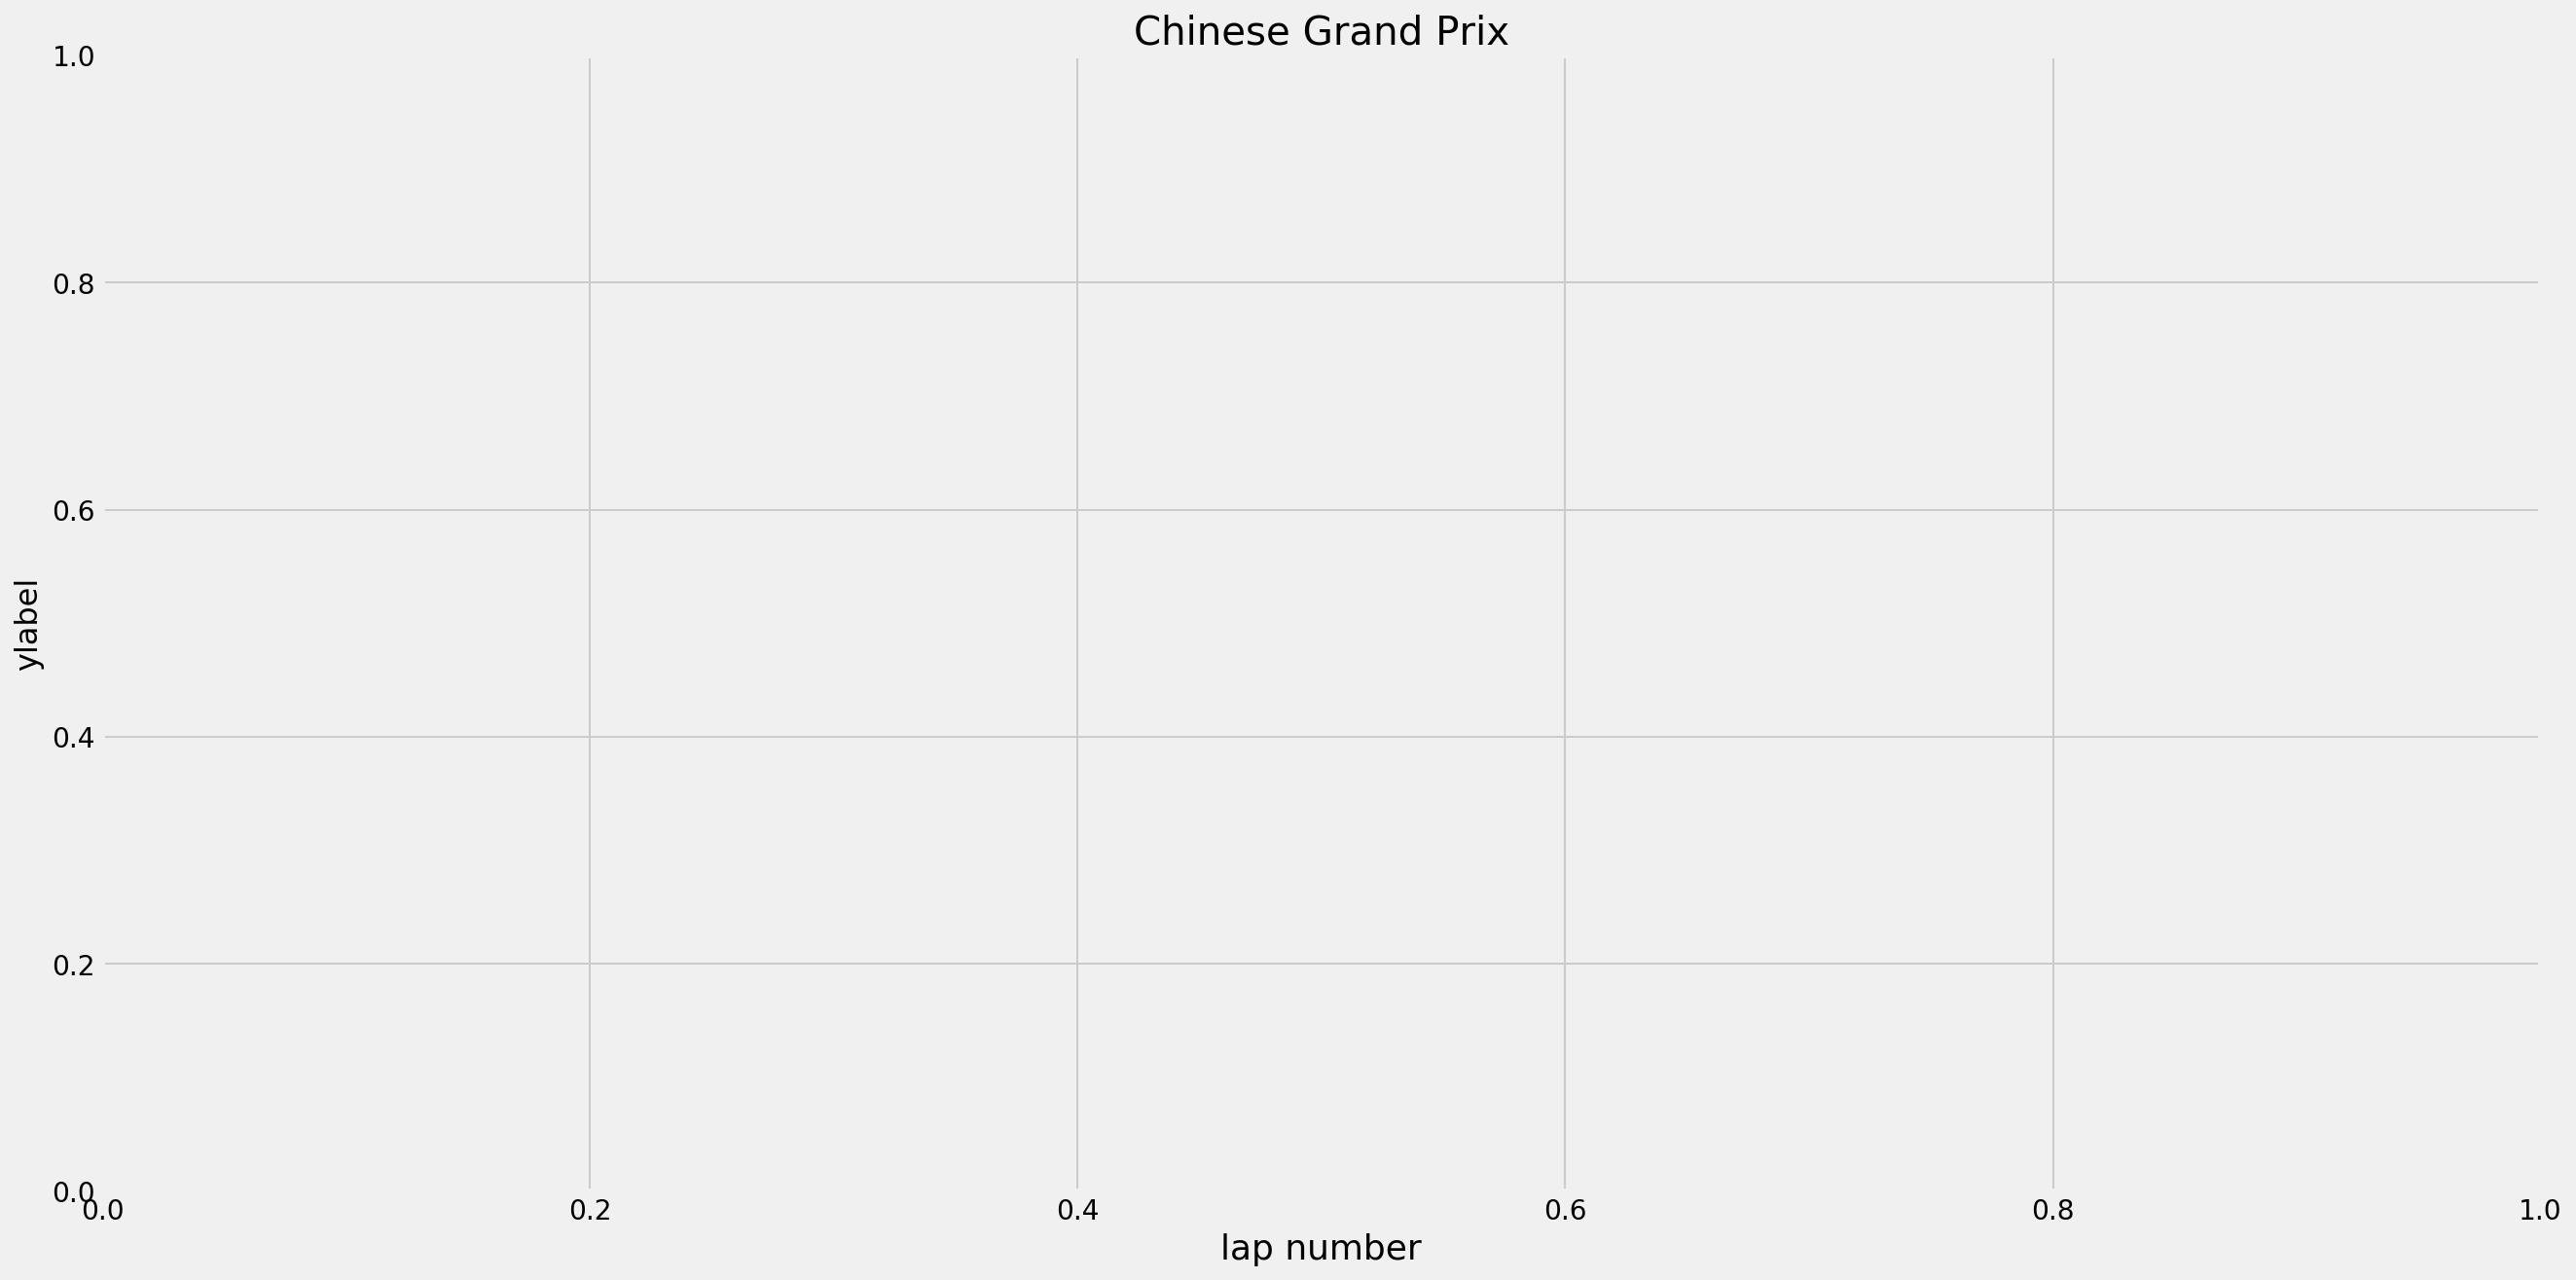

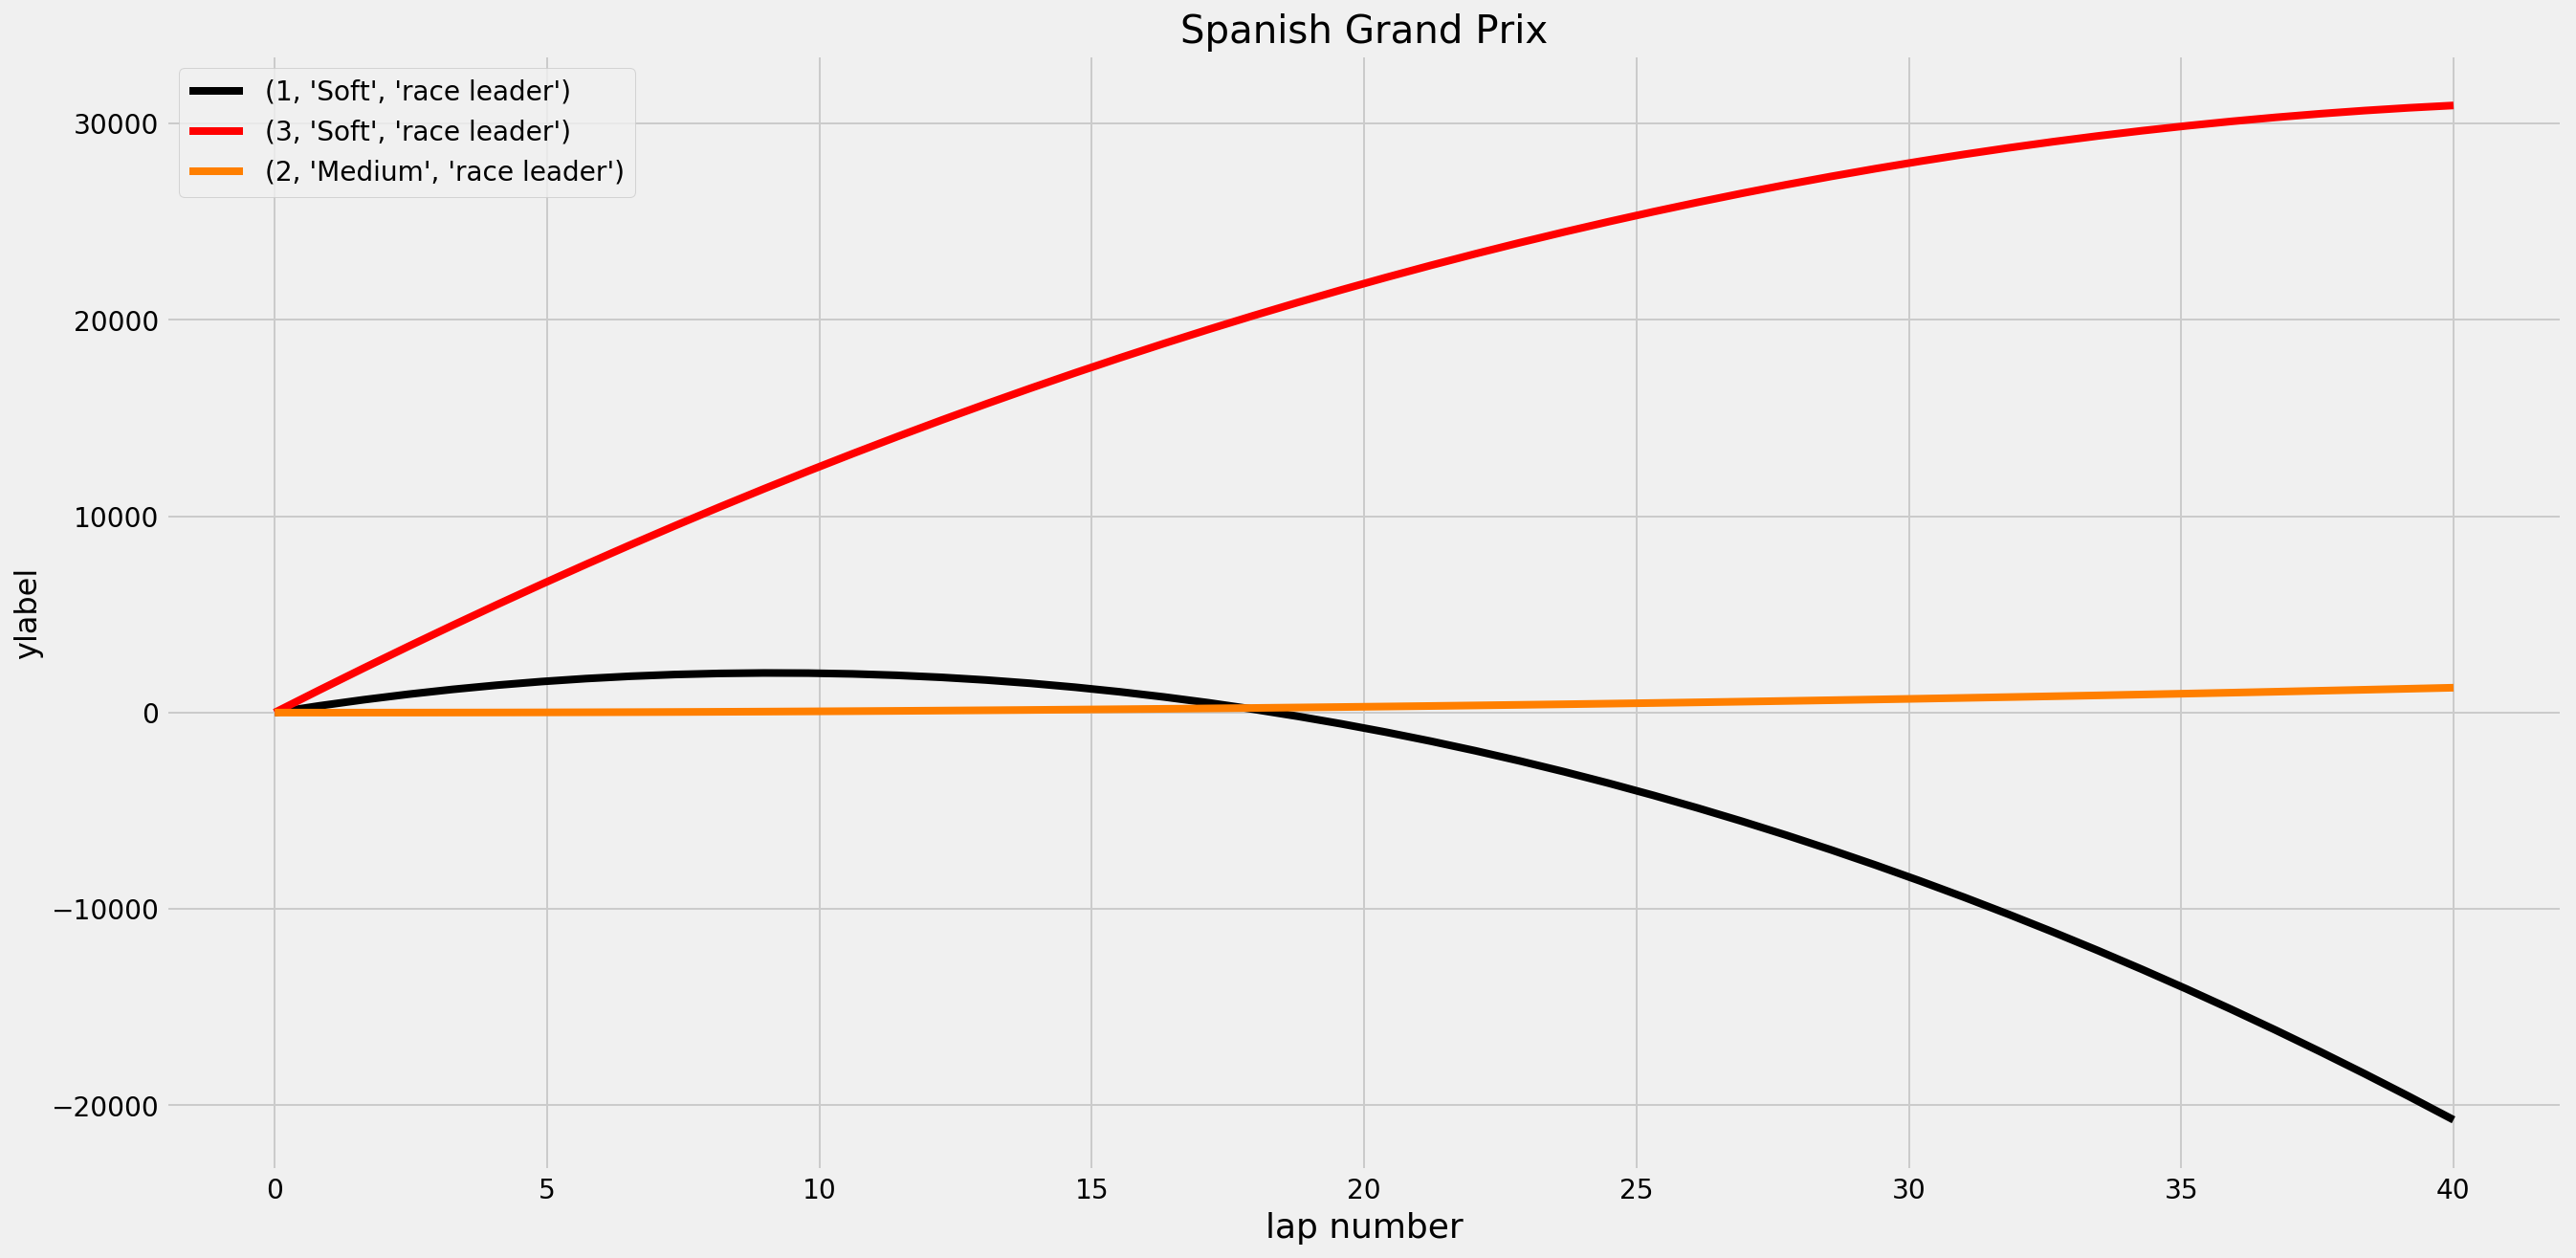

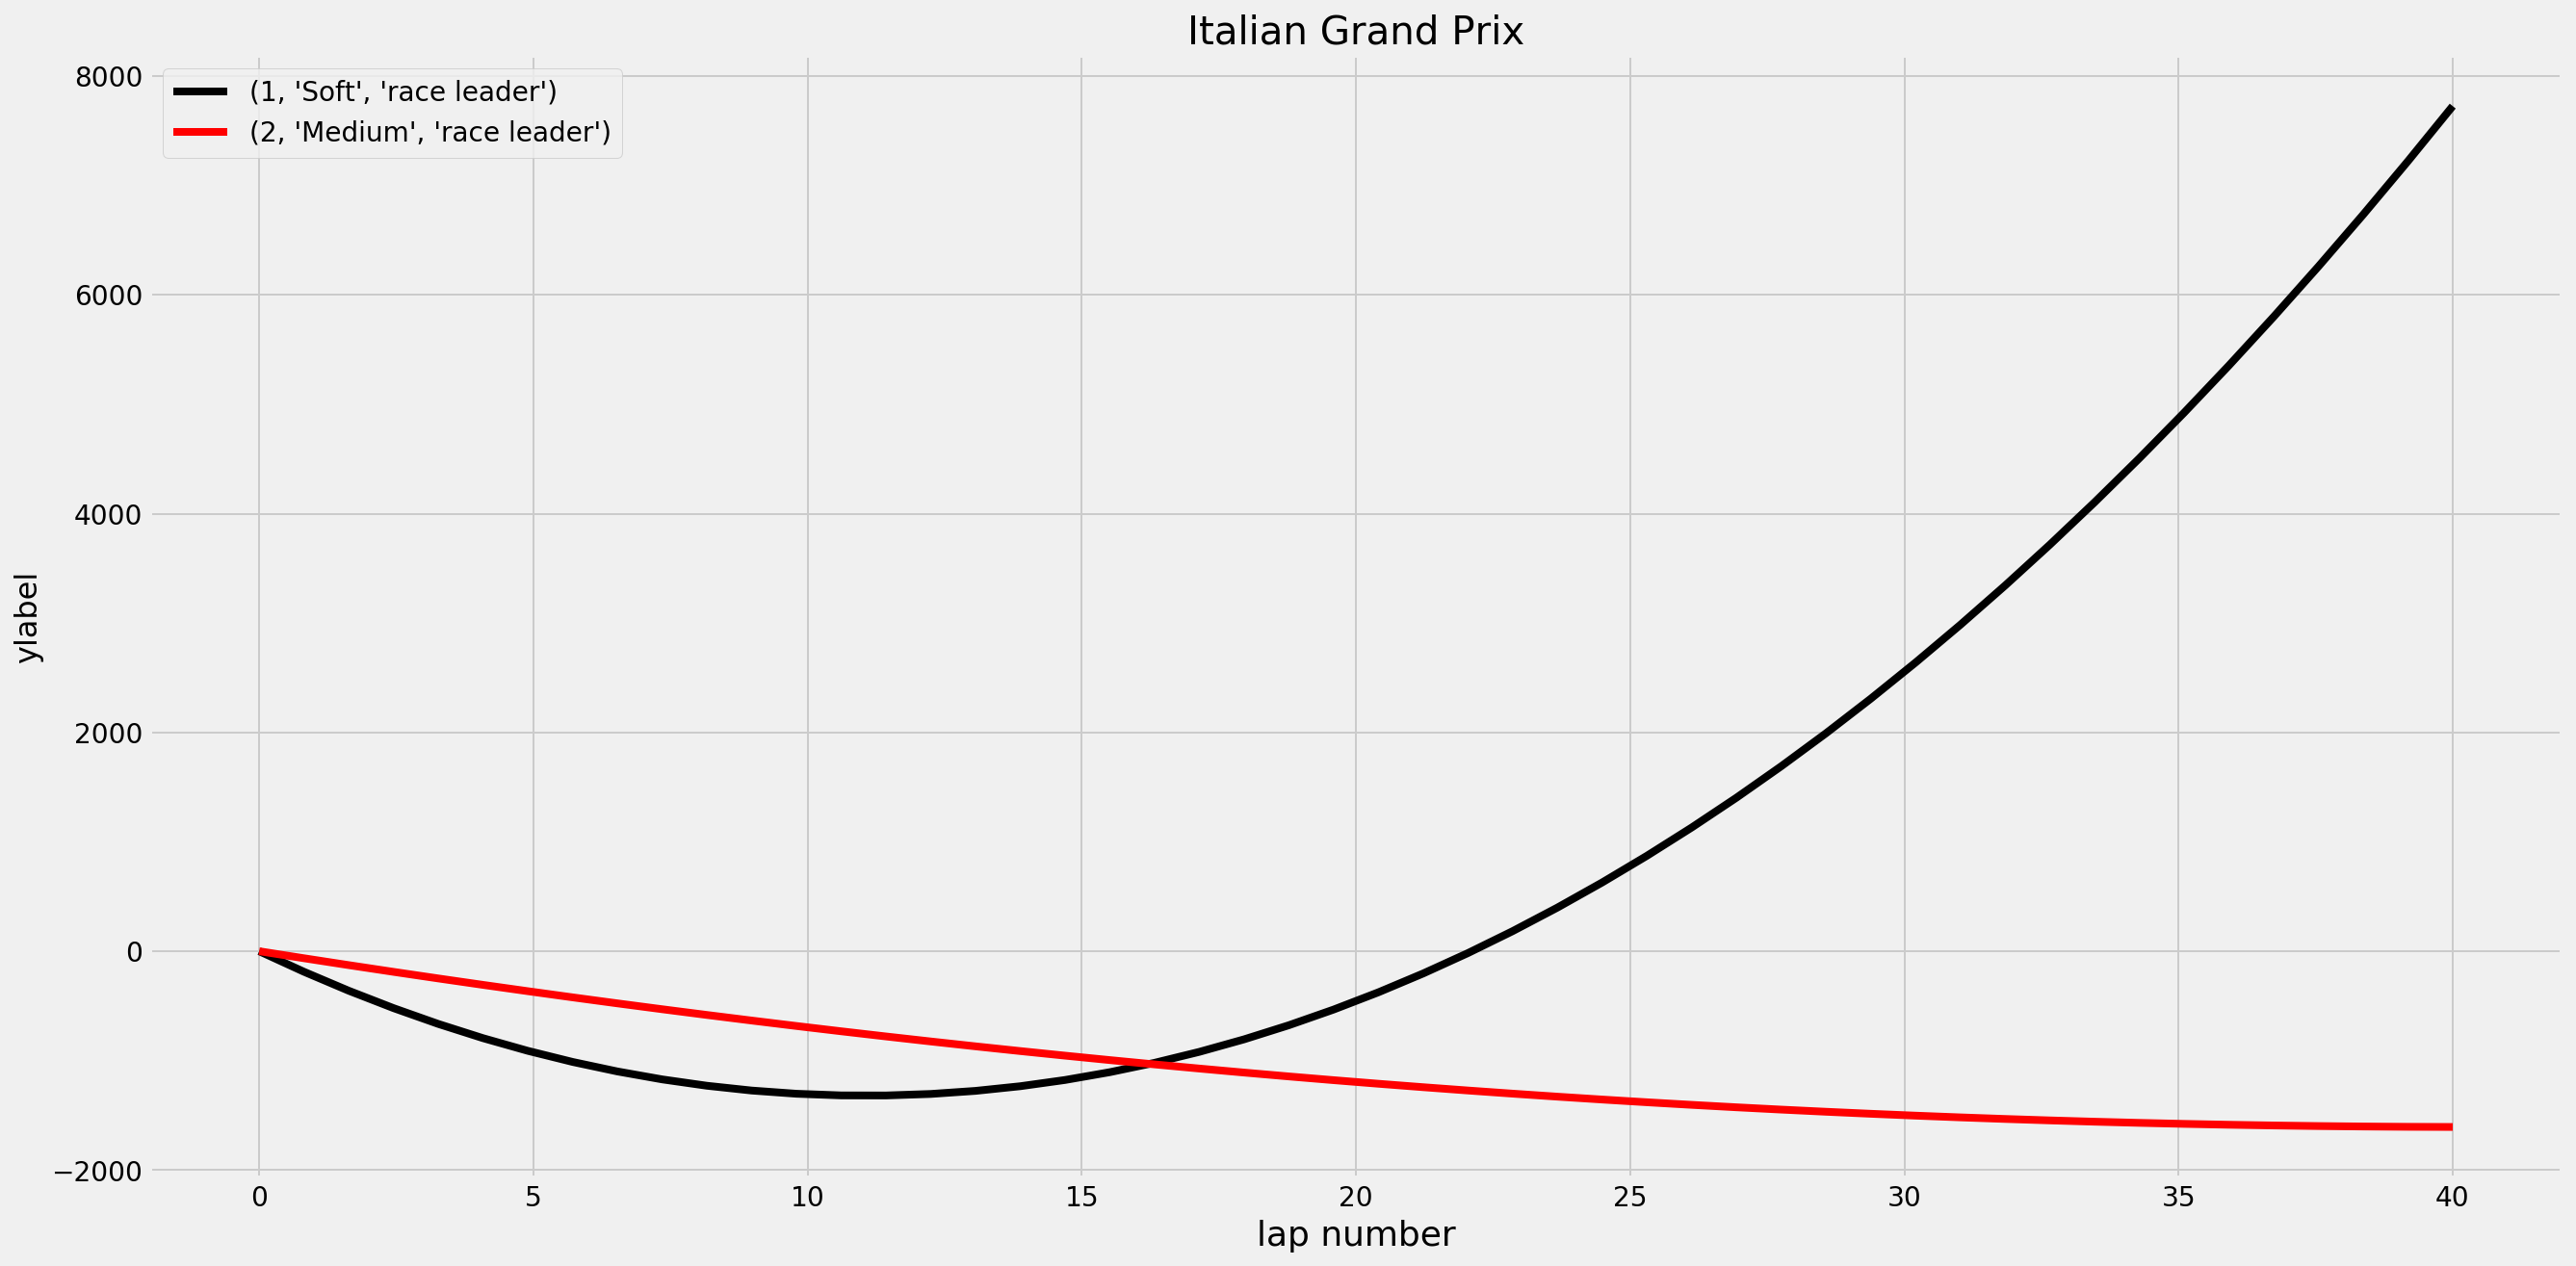

In [19]:
plot_sssm123 = race_leaders[(race_leaders['tyre'].isin(sssm)) & \
                    (race_leaders['stint'].isin(stint123)) & \
                    (race_leaders['name'].isin(sssm123))]
for name in sssm123:
    plot_degradation_curves1(plot_sssm123, name, 2016, "coeffs")

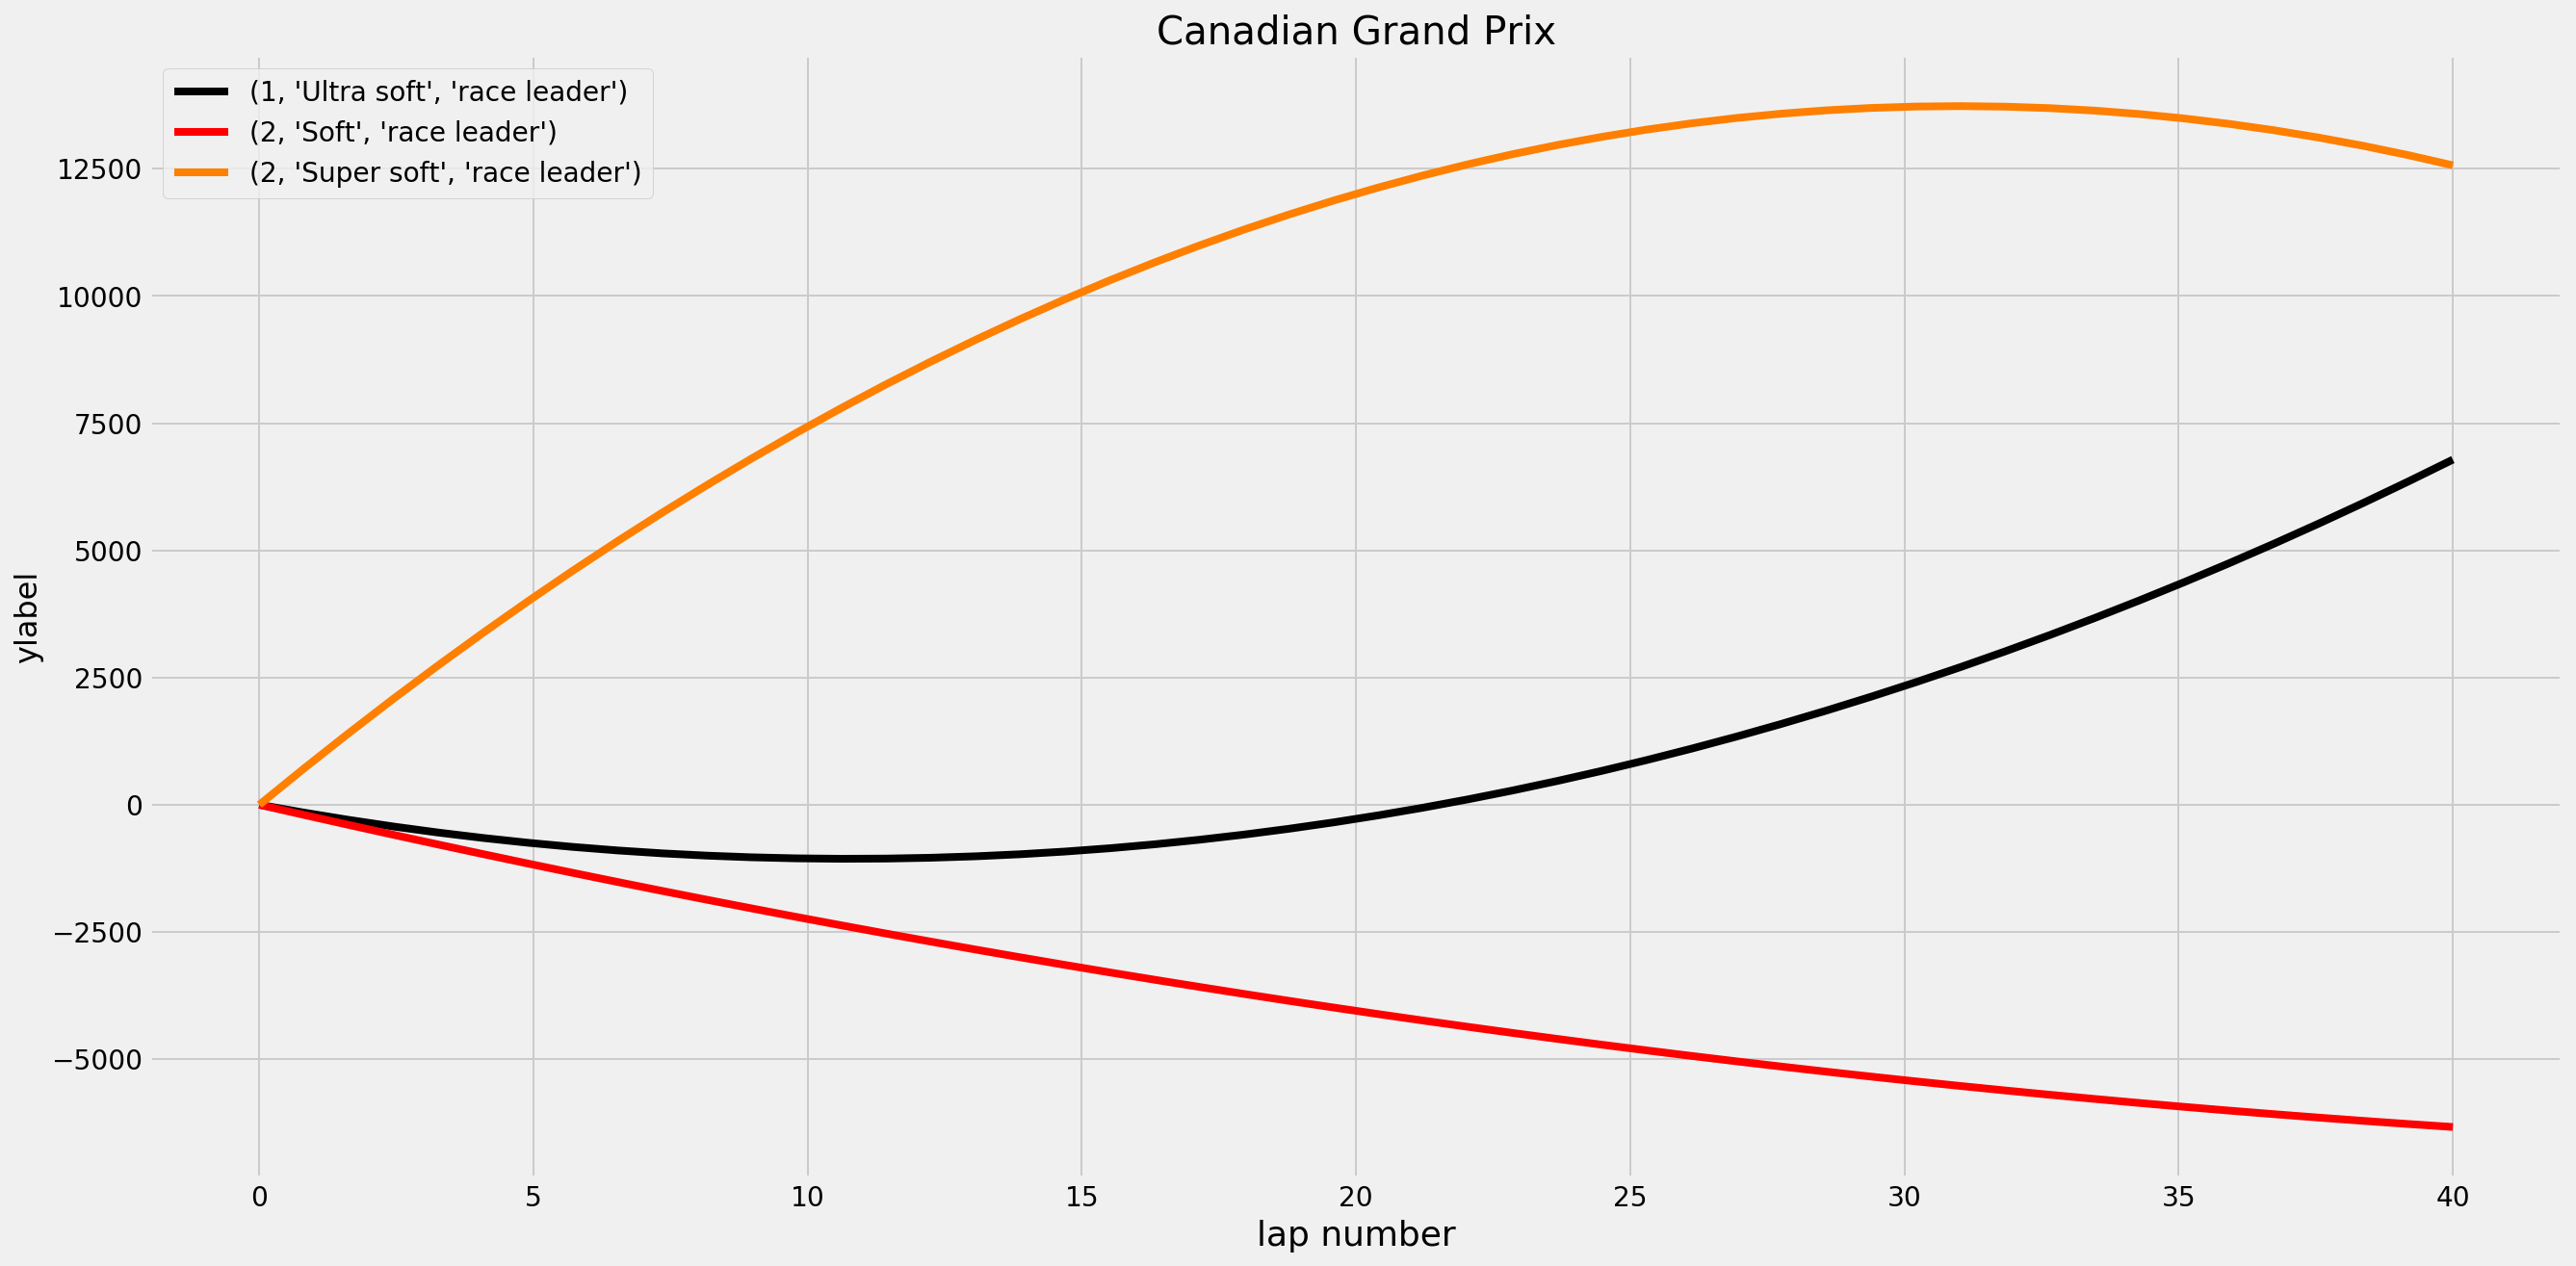

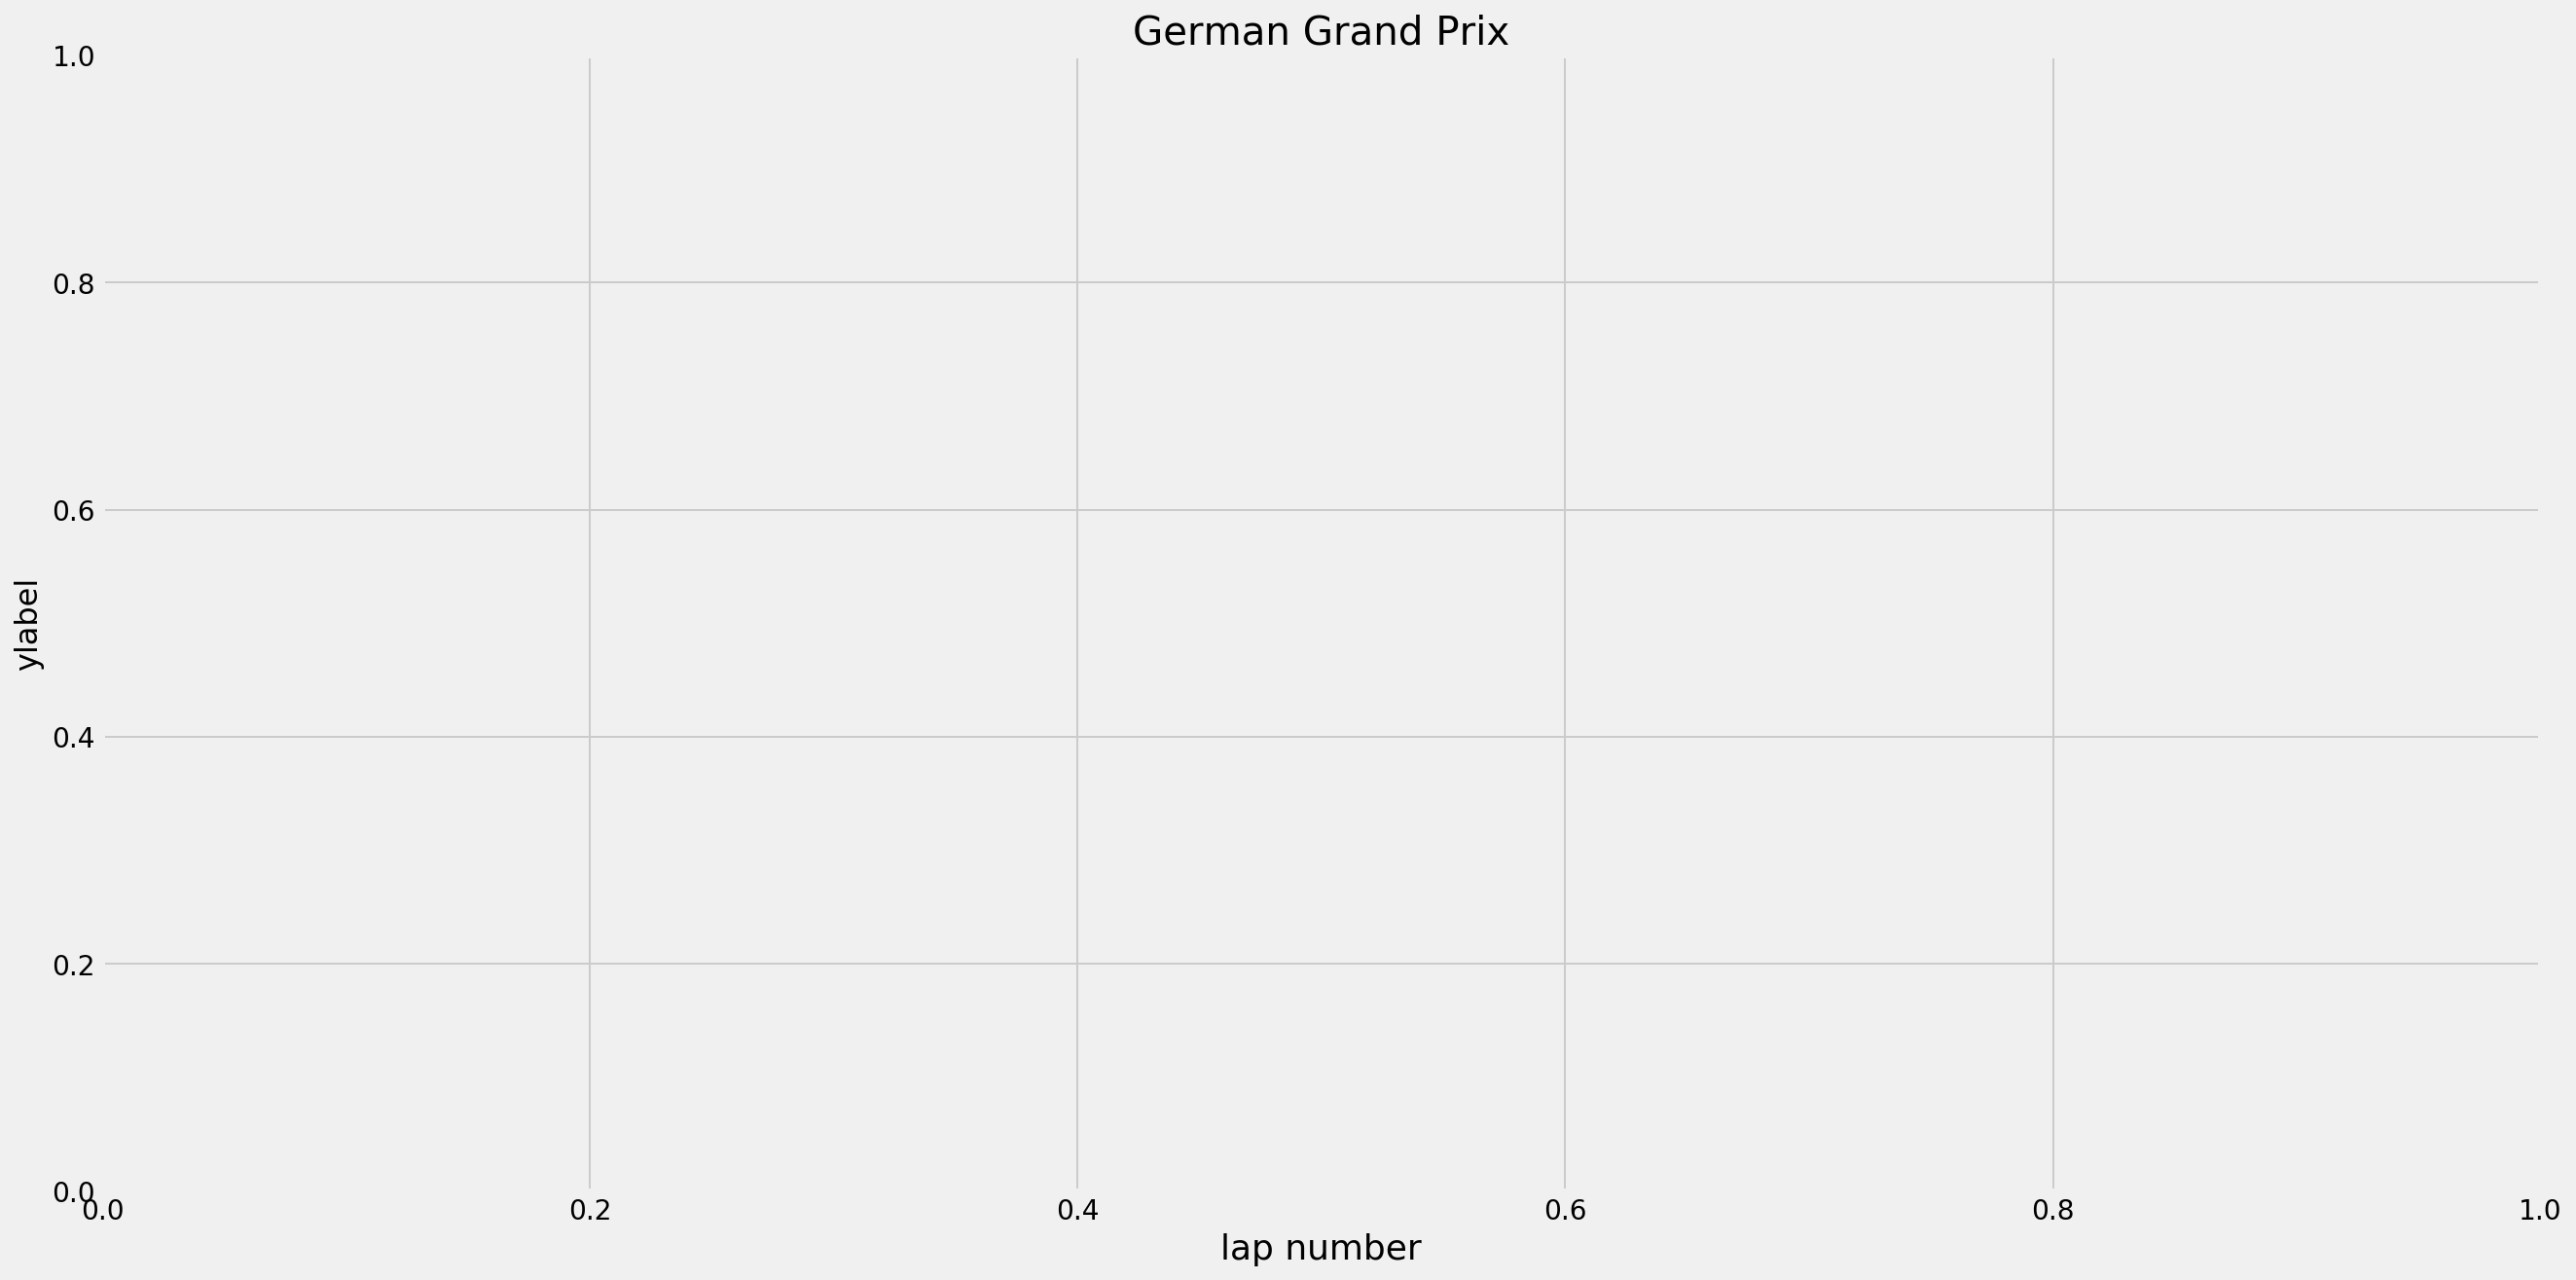

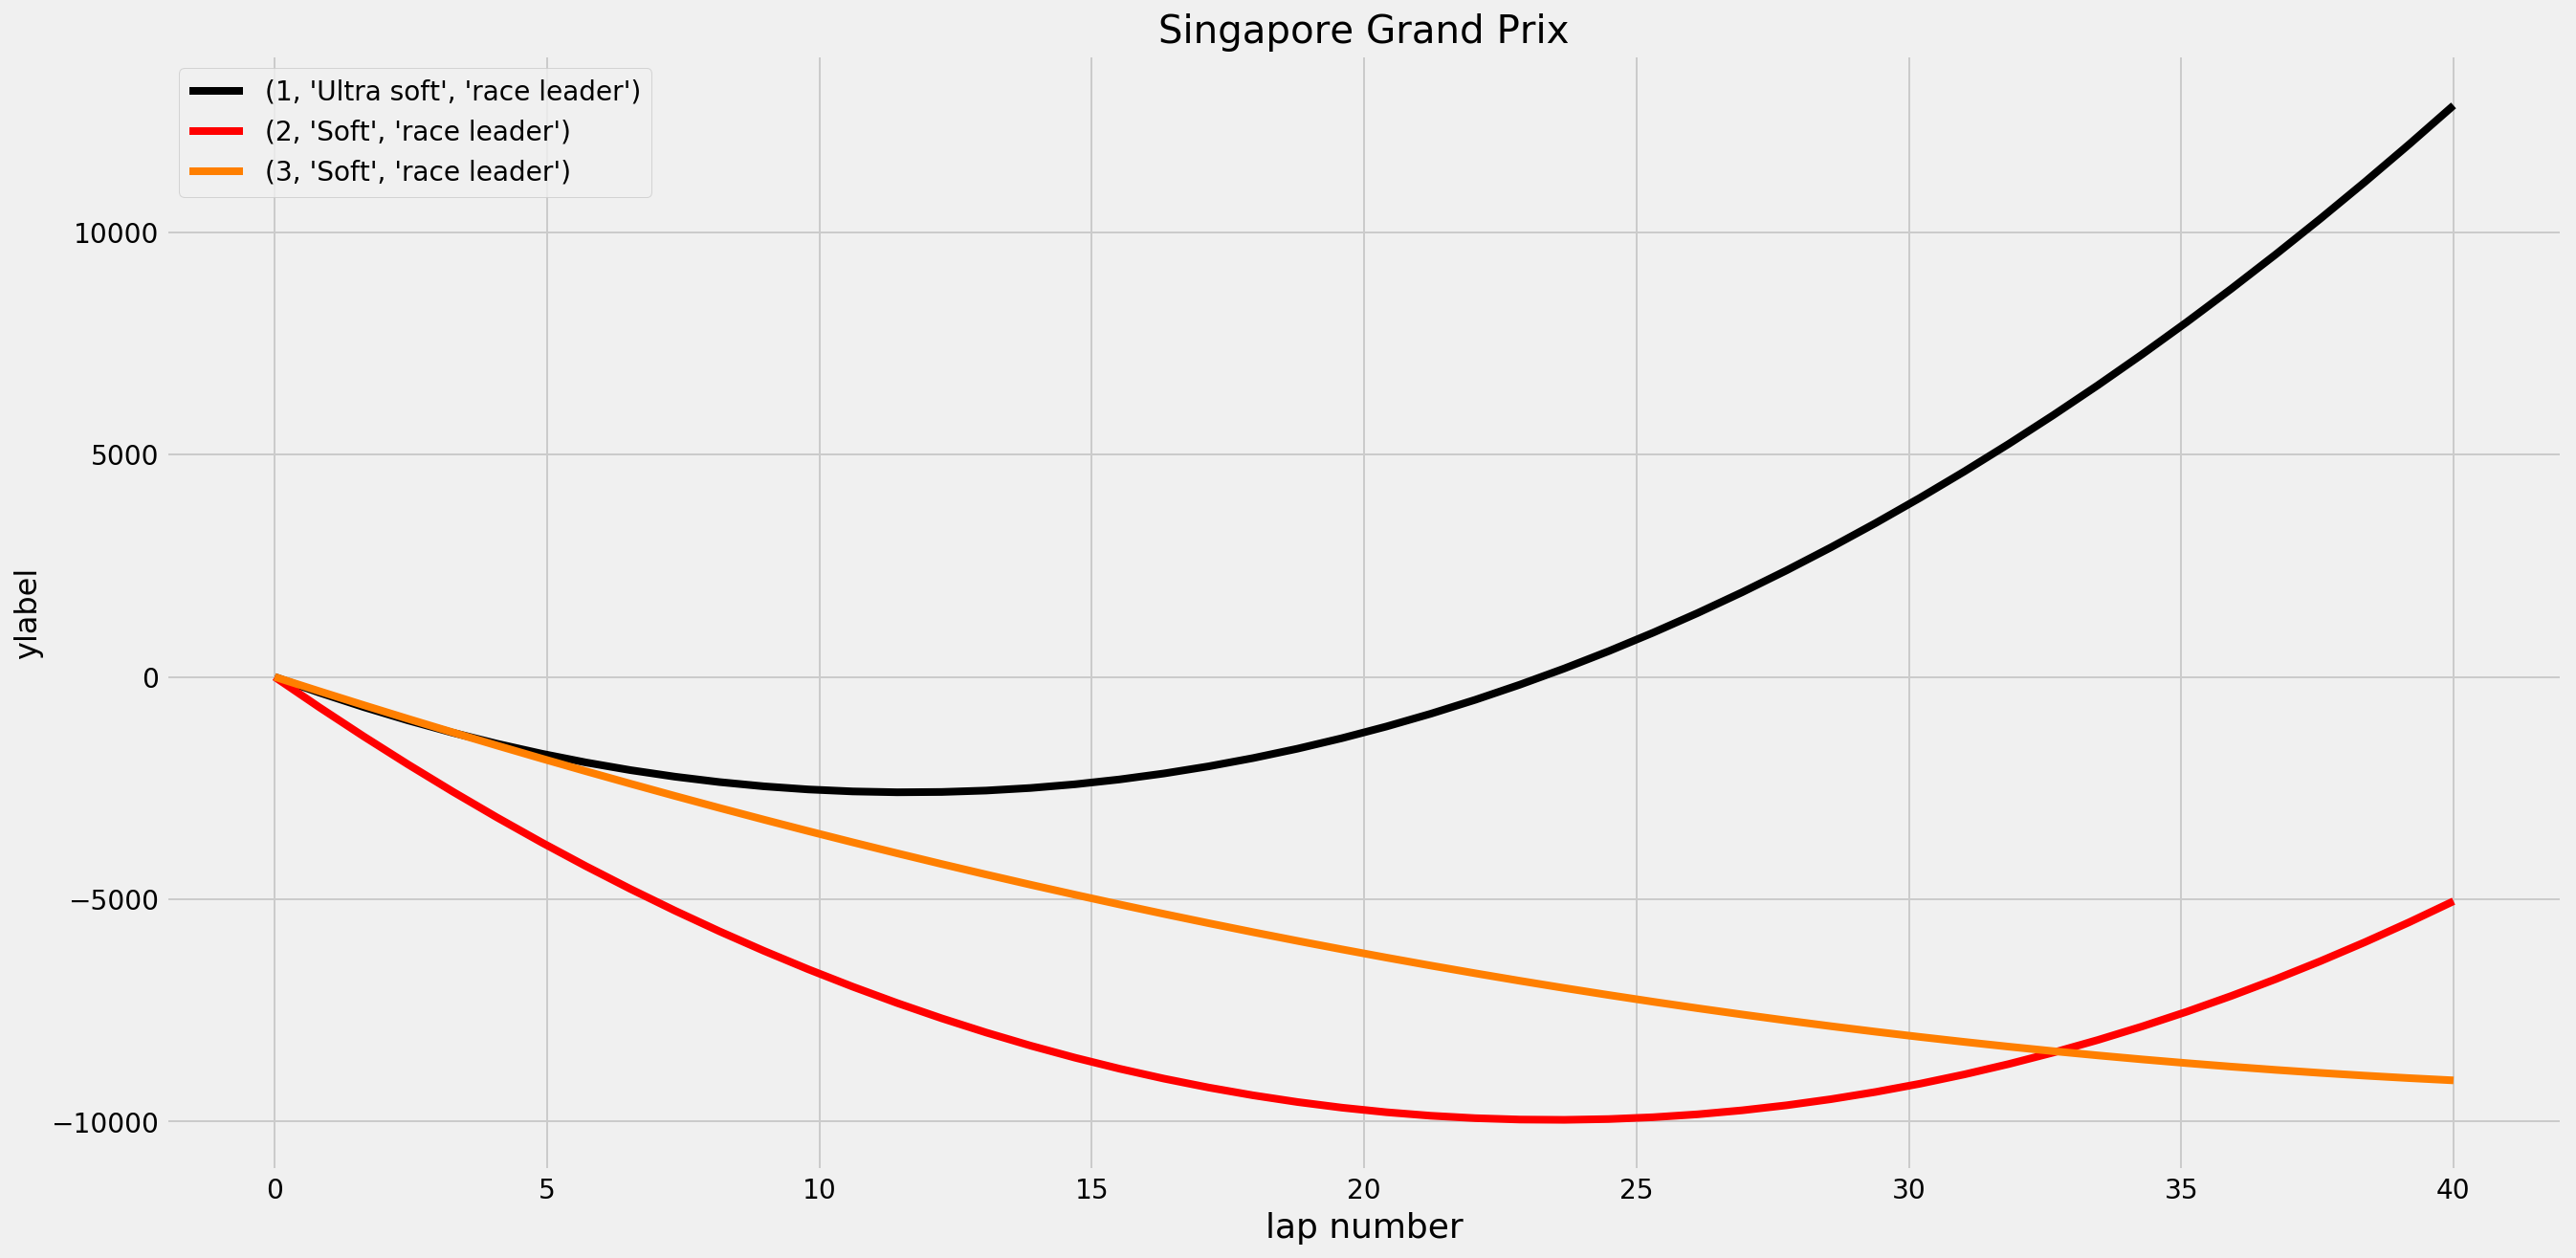

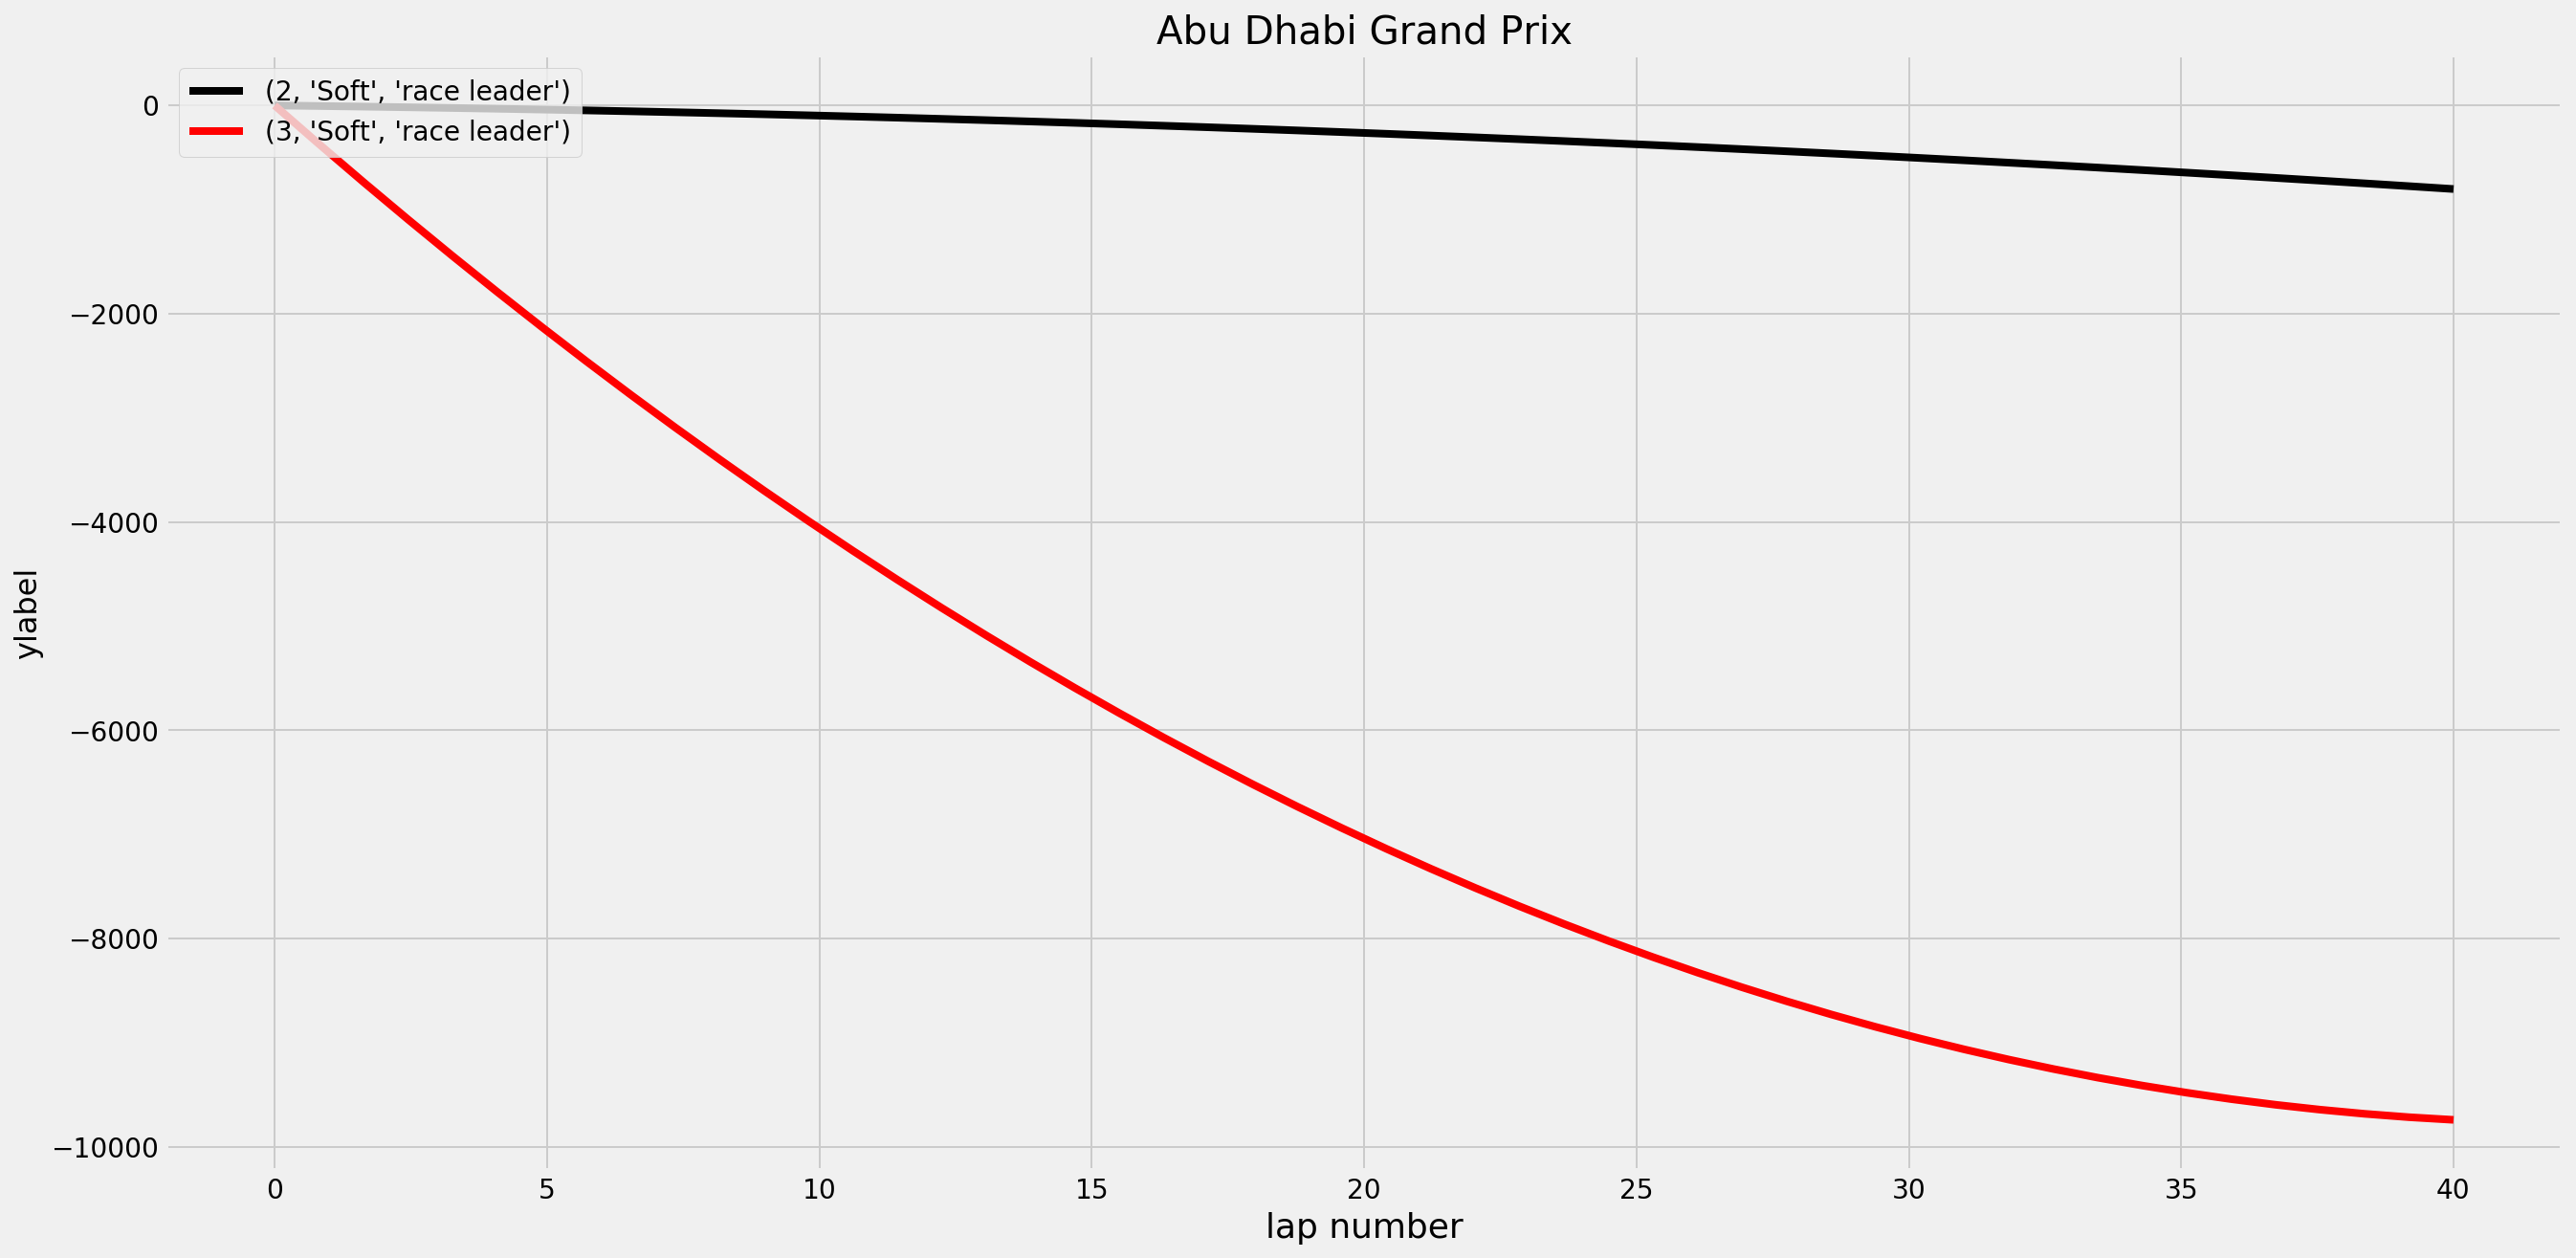

In [20]:
plot_ussss123 = race_leaders[(race_leaders['tyre'].isin(ussss)) & \
                    (race_leaders['stint'].isin(stint123)) & \
                    (race_leaders['name'].isin(ussss123))]
for name in ussss123:
    plot_degradation_curves1(plot_ussss123, name, 2016, "coeffs")

### 2) Coeffs selected in the following priority order: Top 10 drivers, all drivers

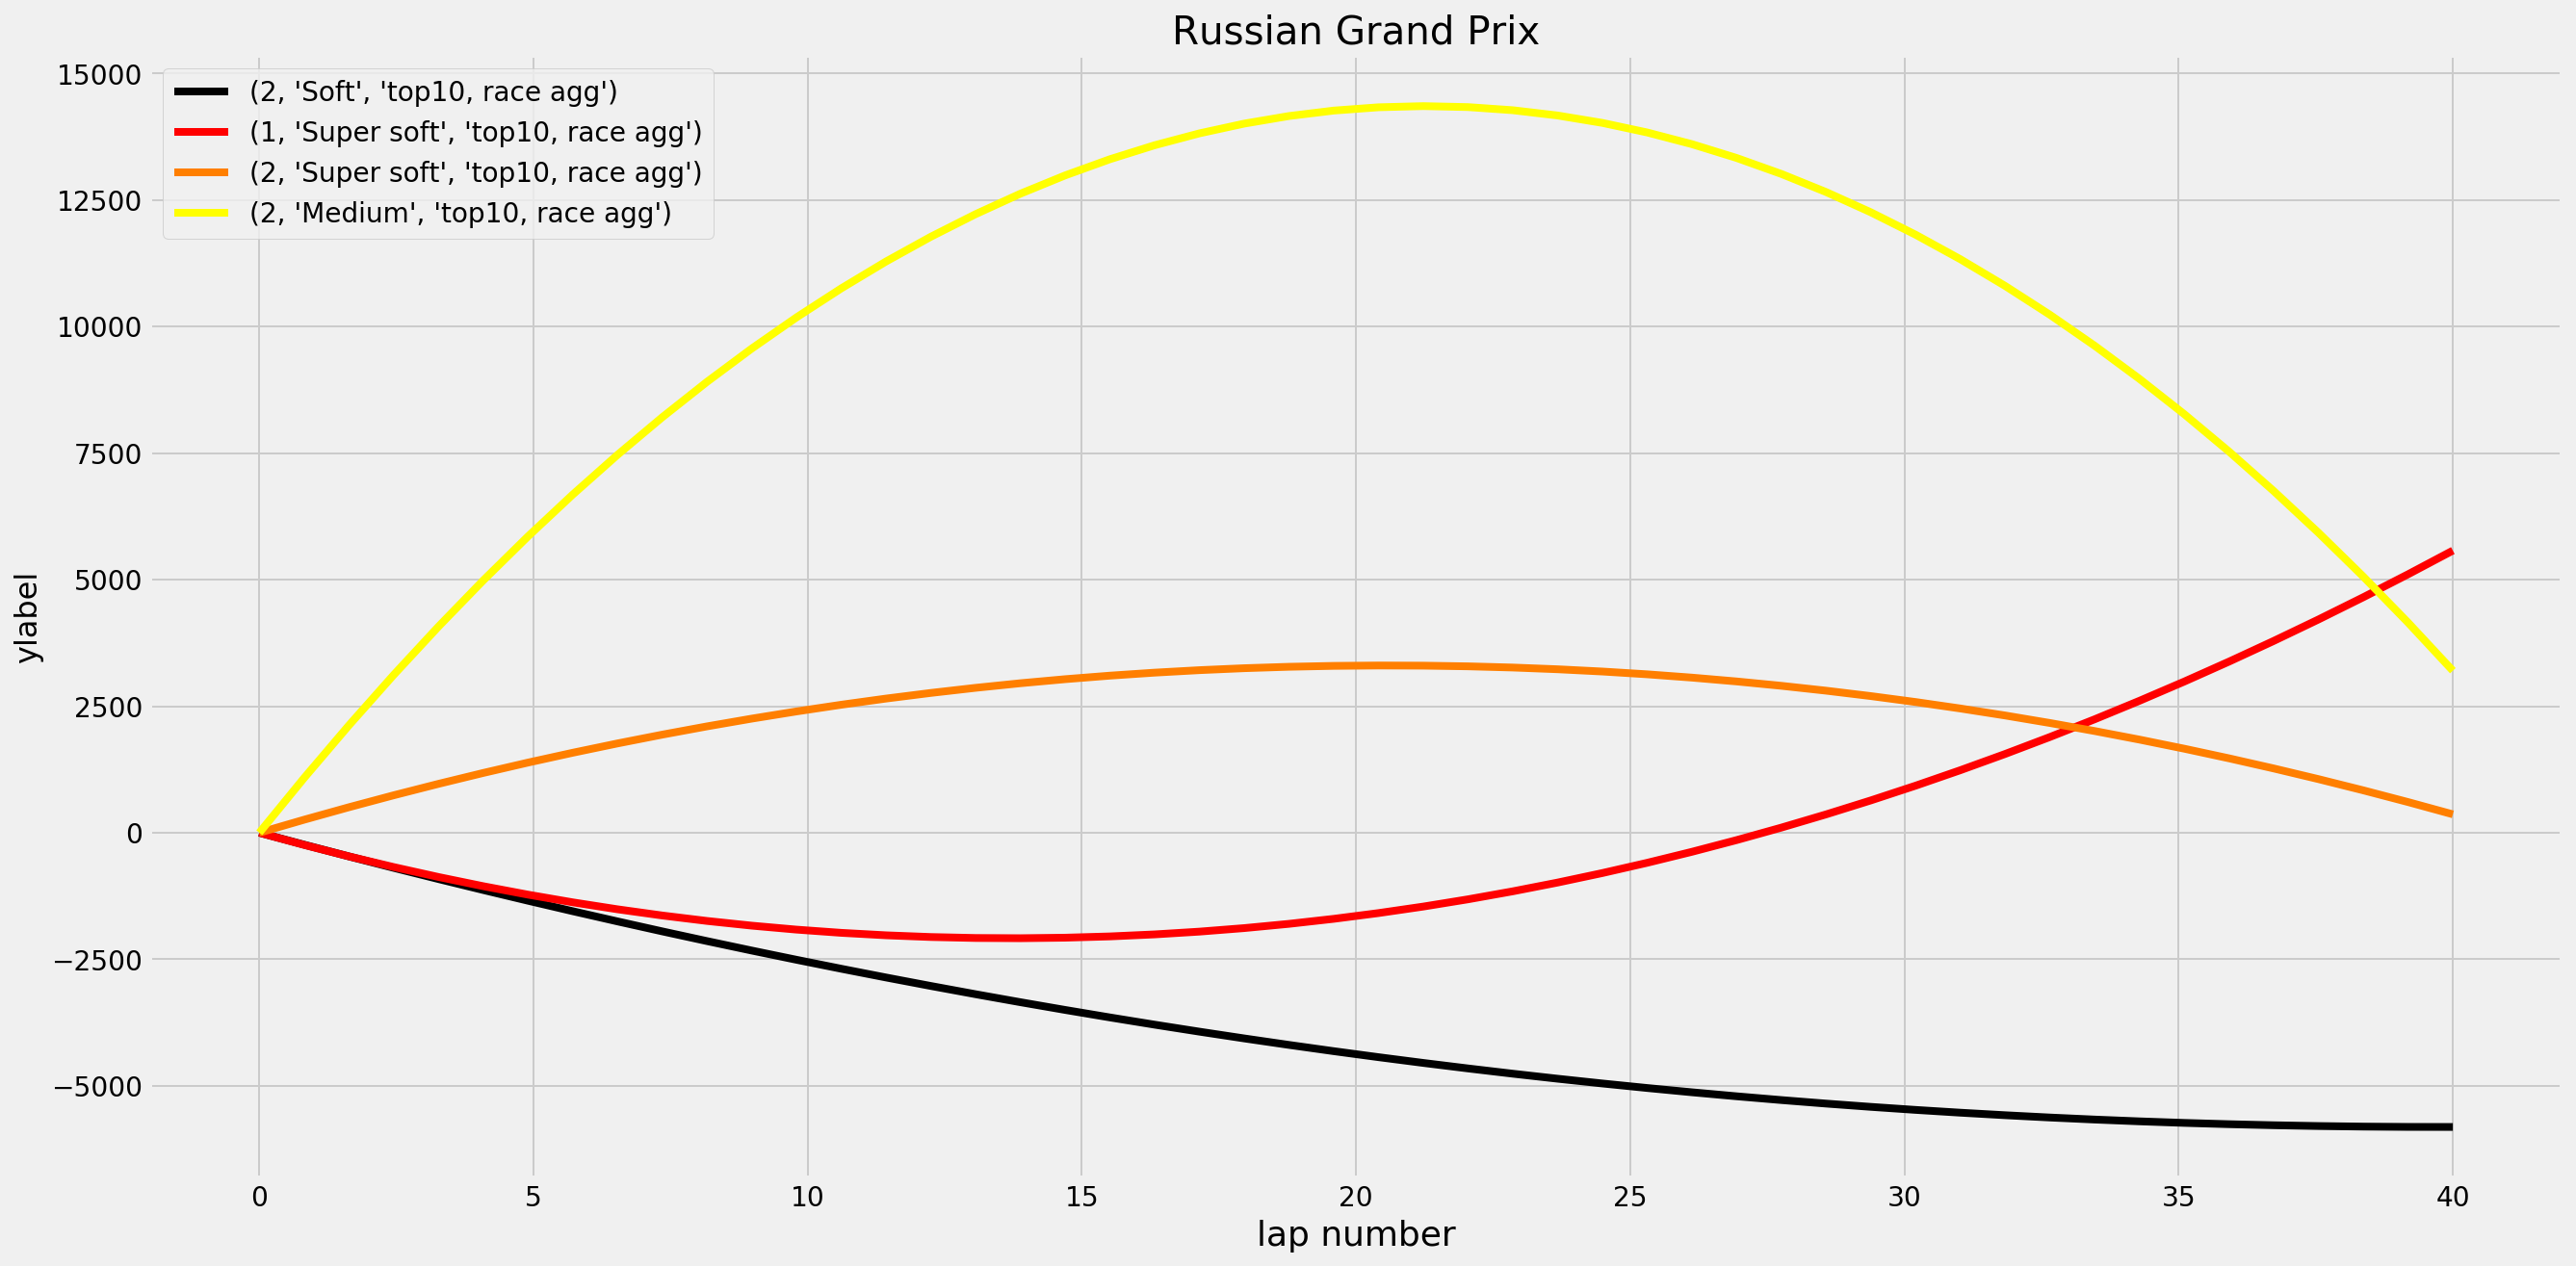

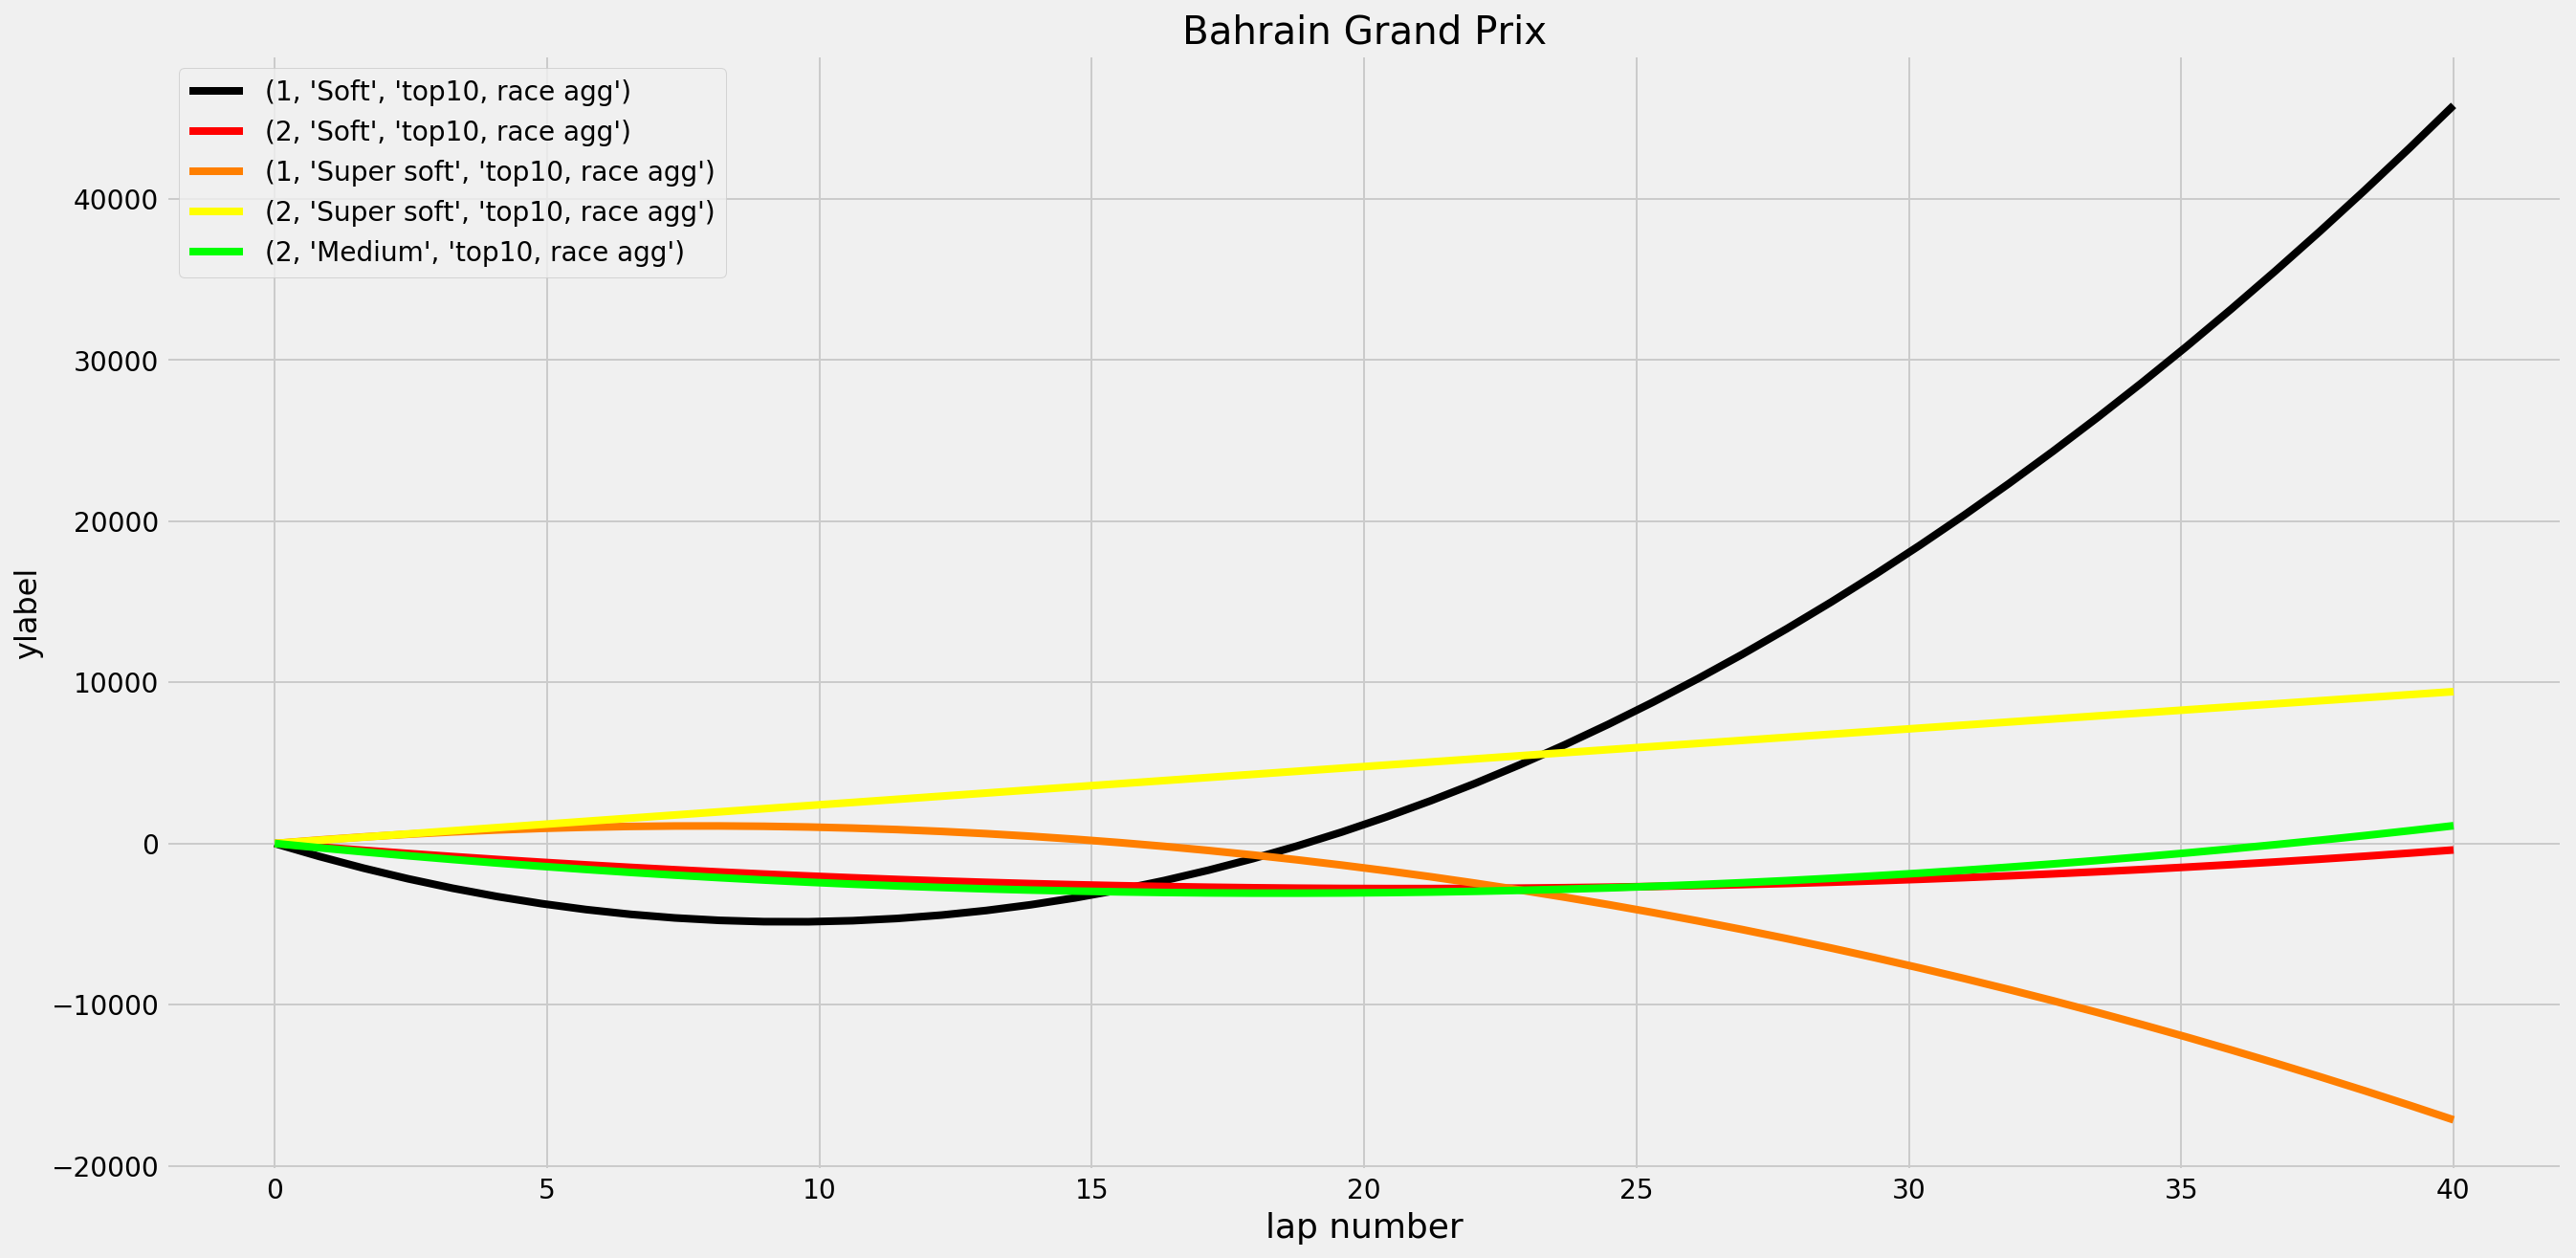

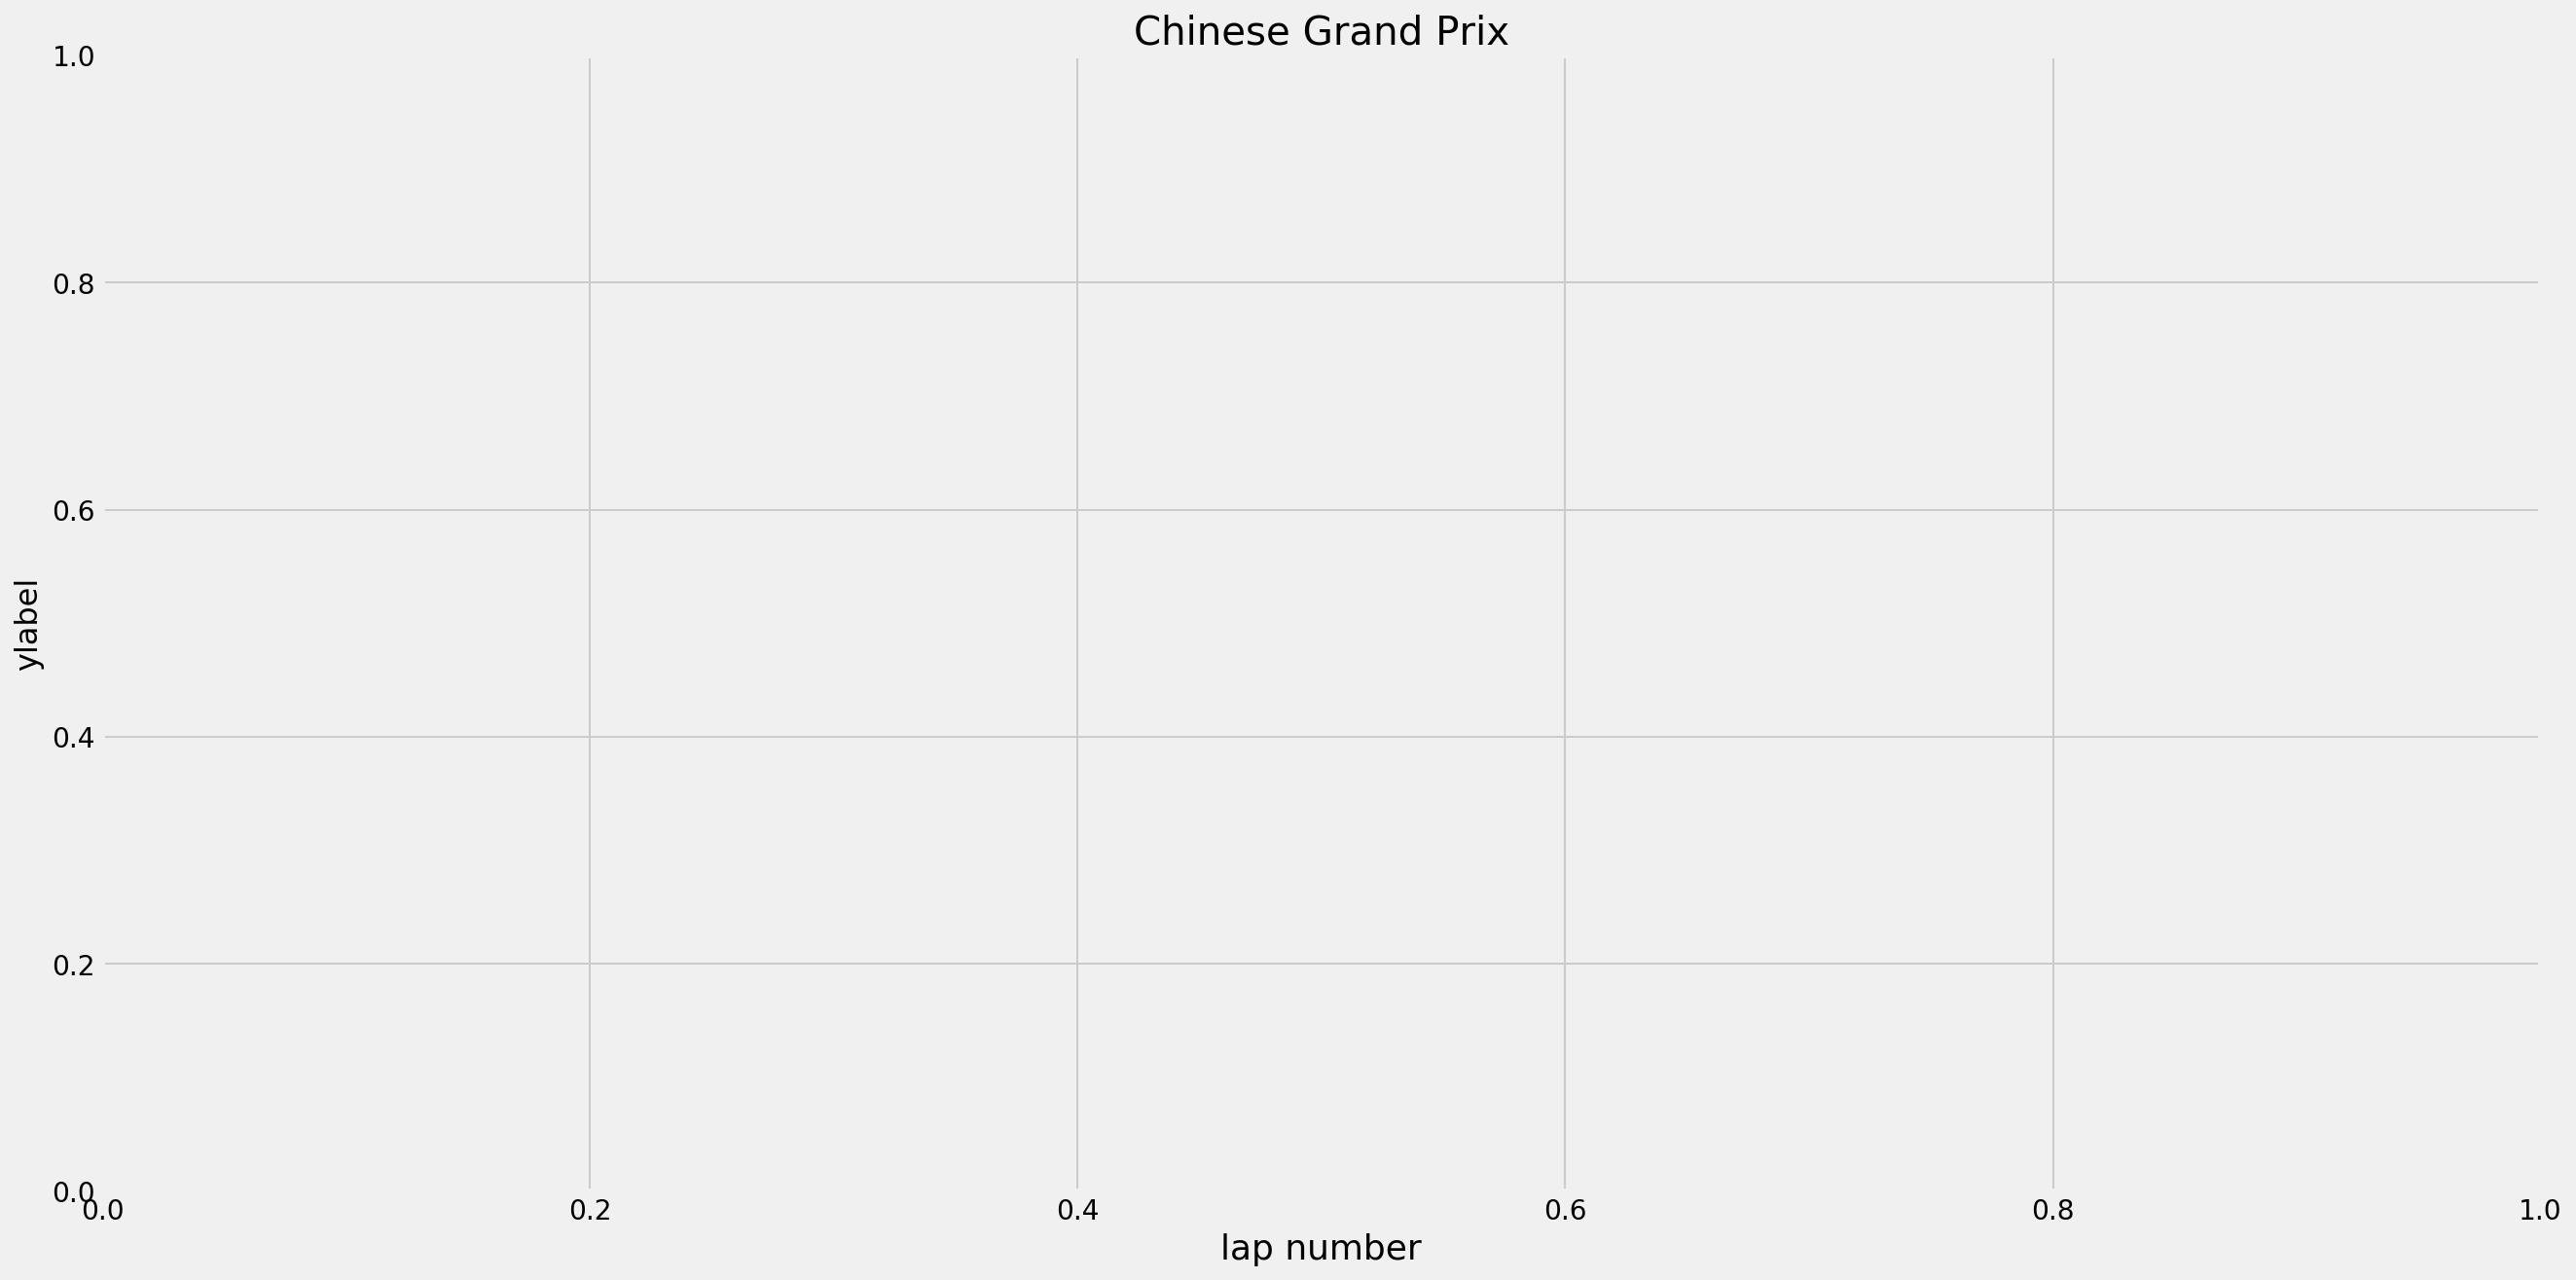

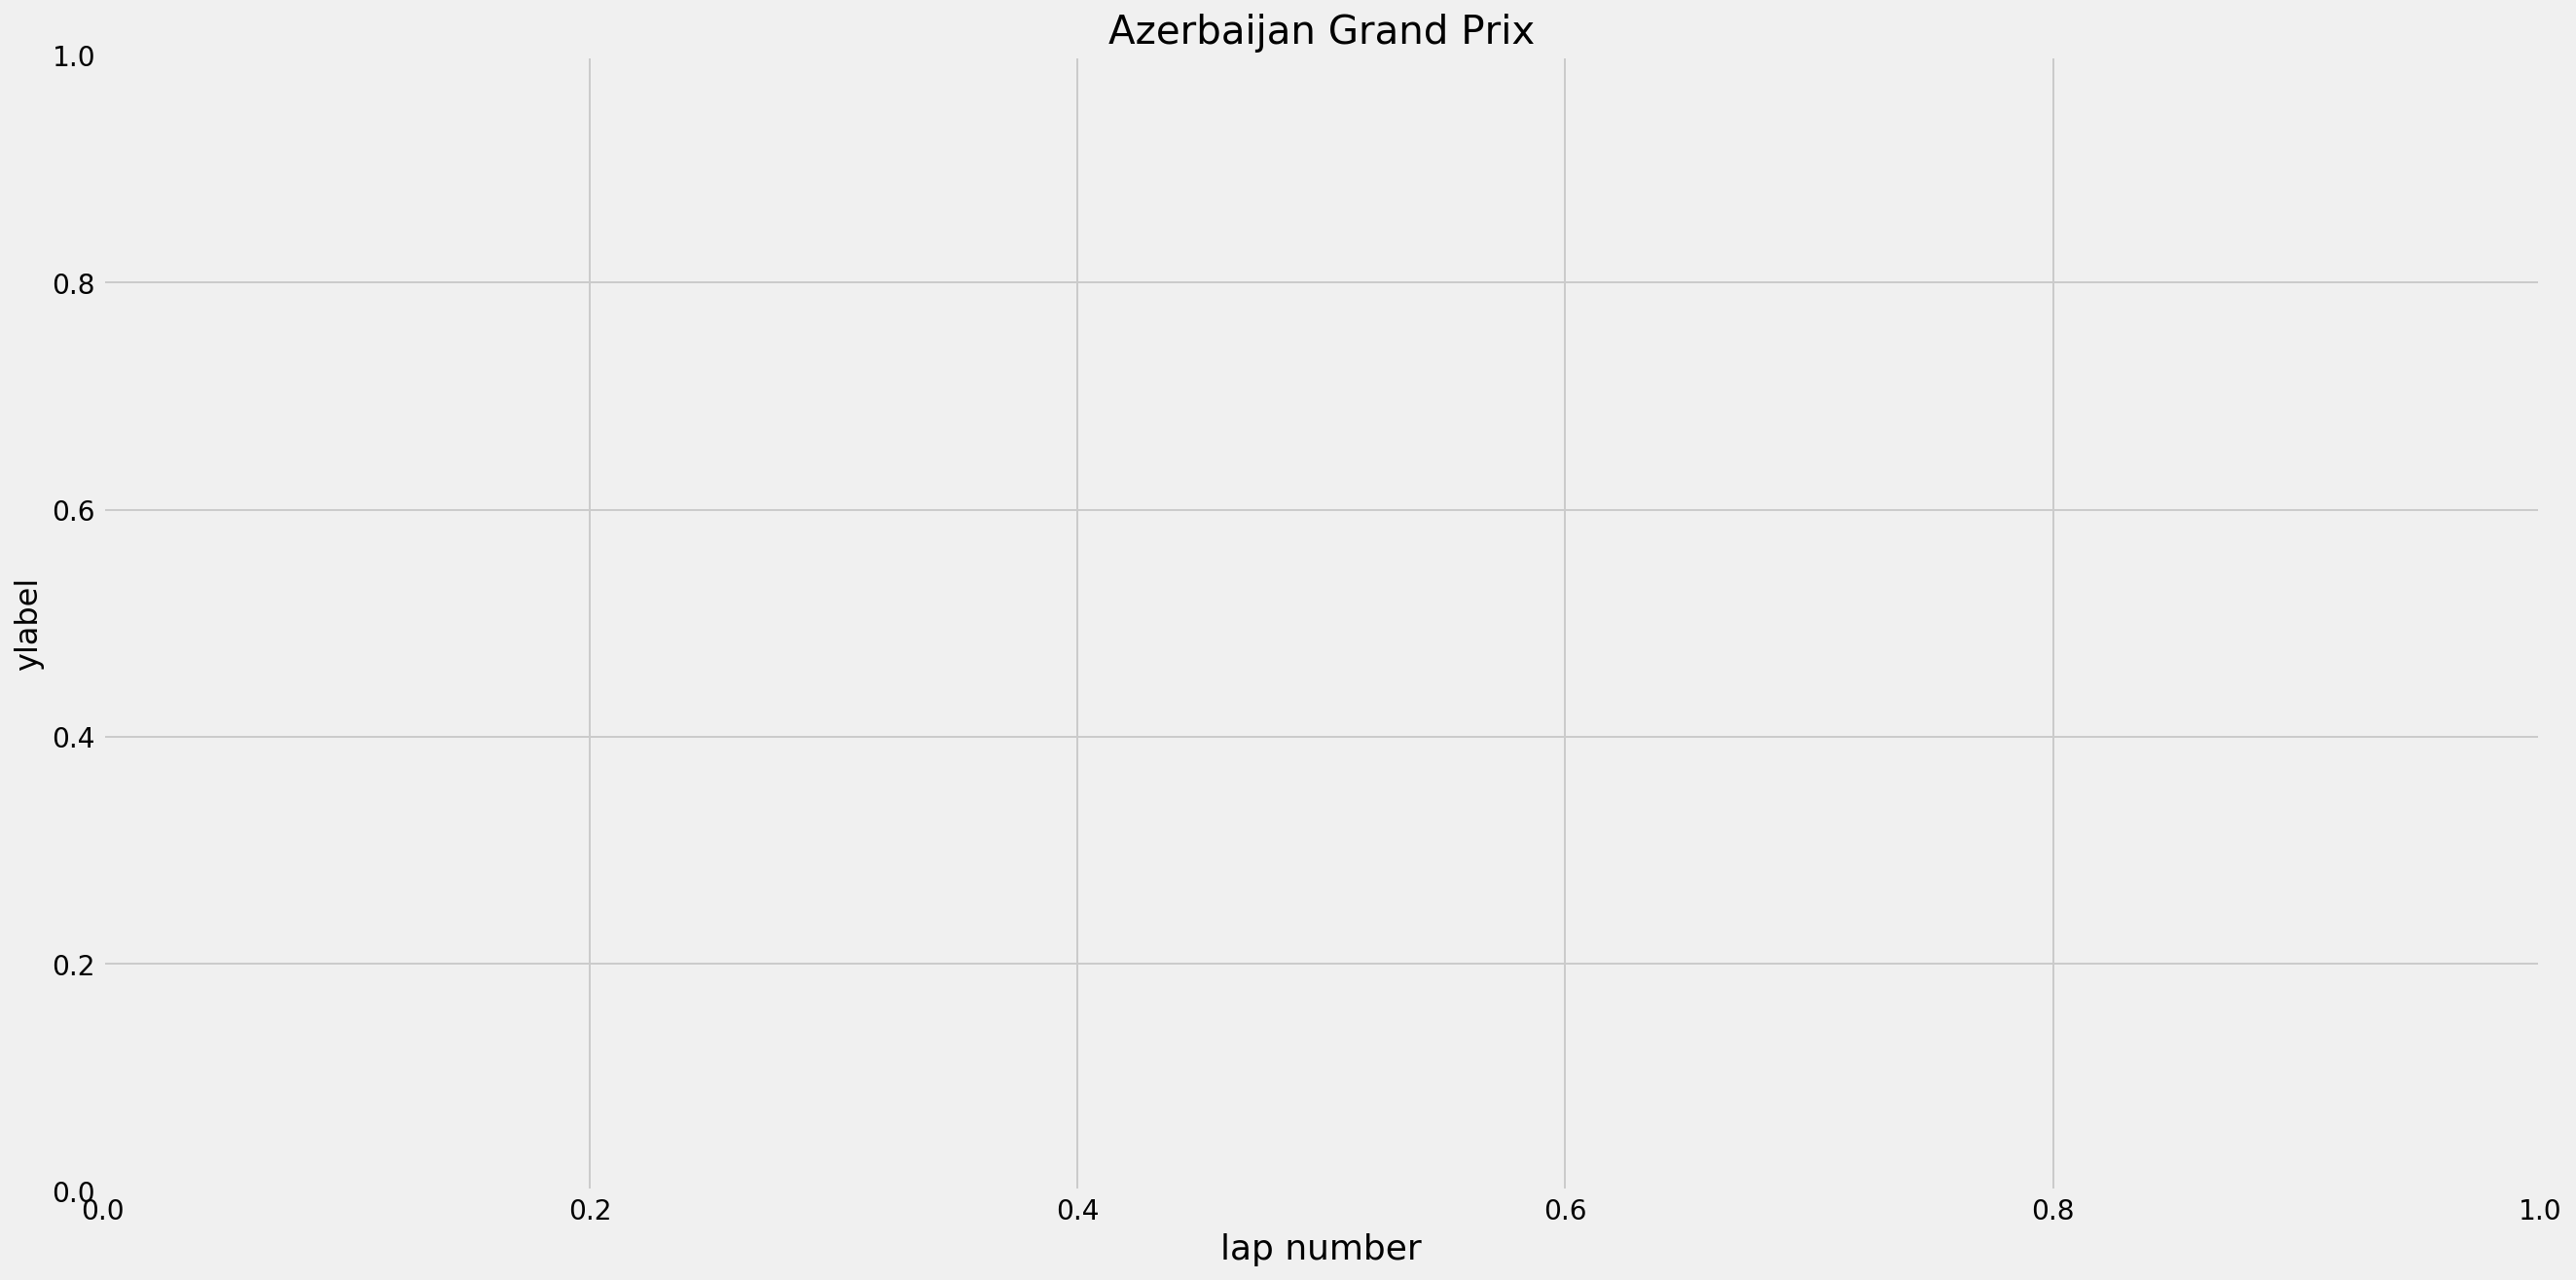

In [21]:
plot_sssm12_ad = all_drivers[(all_drivers['tyre'].isin(sssm)) & \
                        (all_drivers['stint'].isin(stint12))]
for name in sssm12:
    plot_degradation_curves1(plot_sssm12_ad, name, 2016, "coeffs")

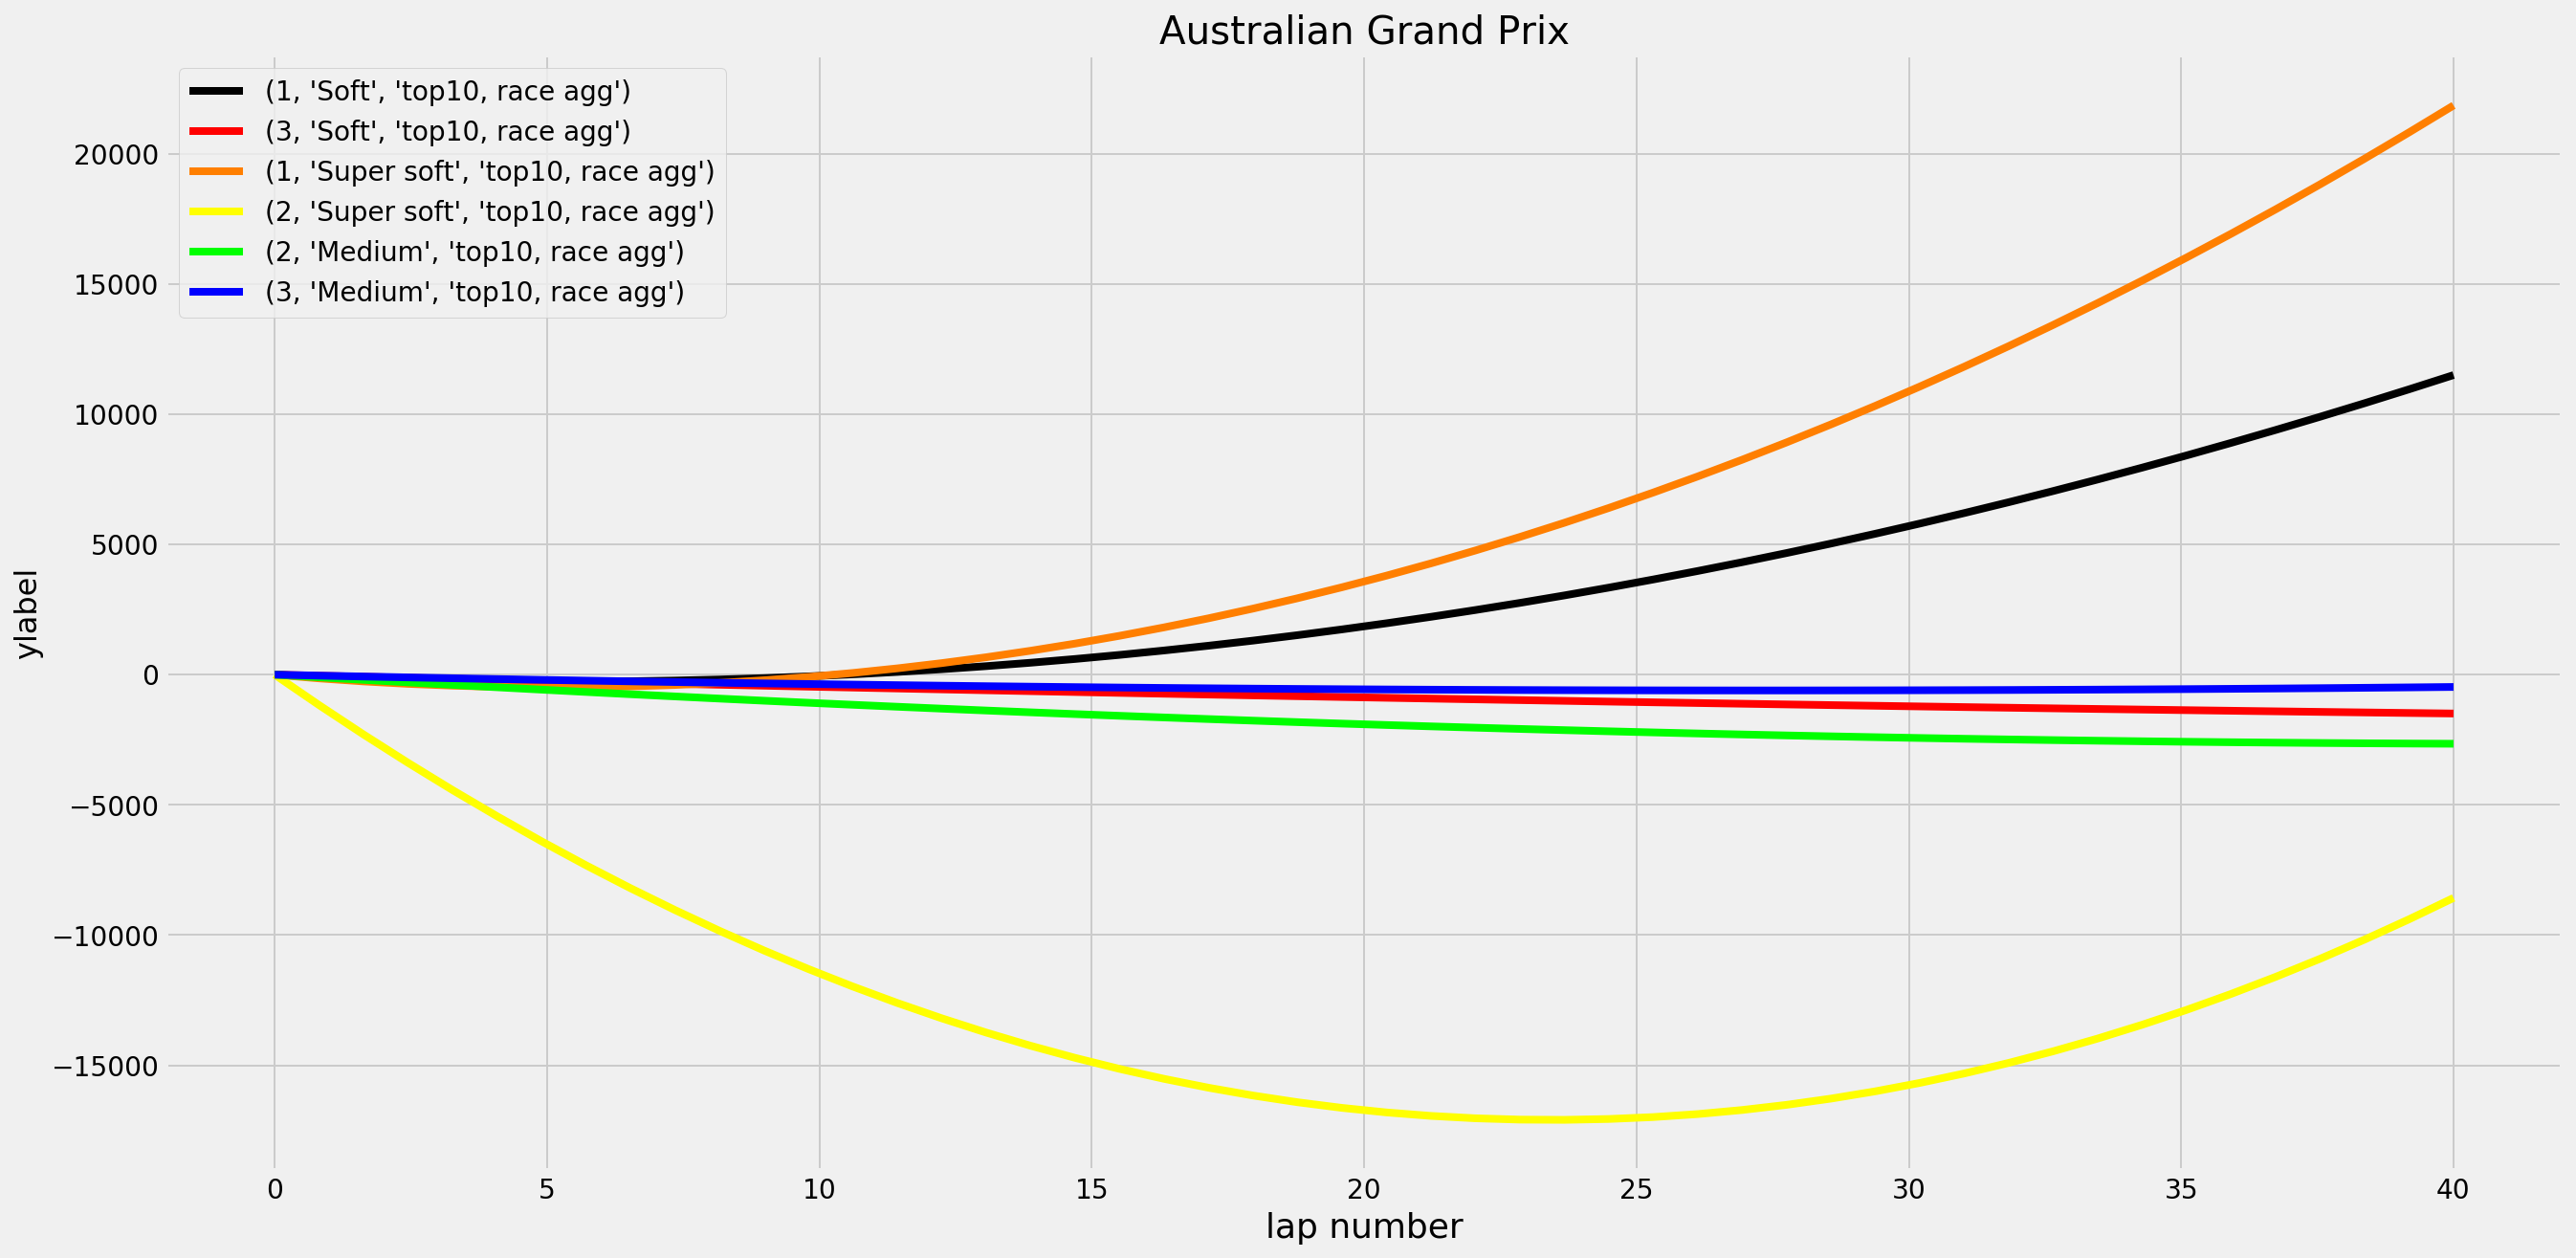

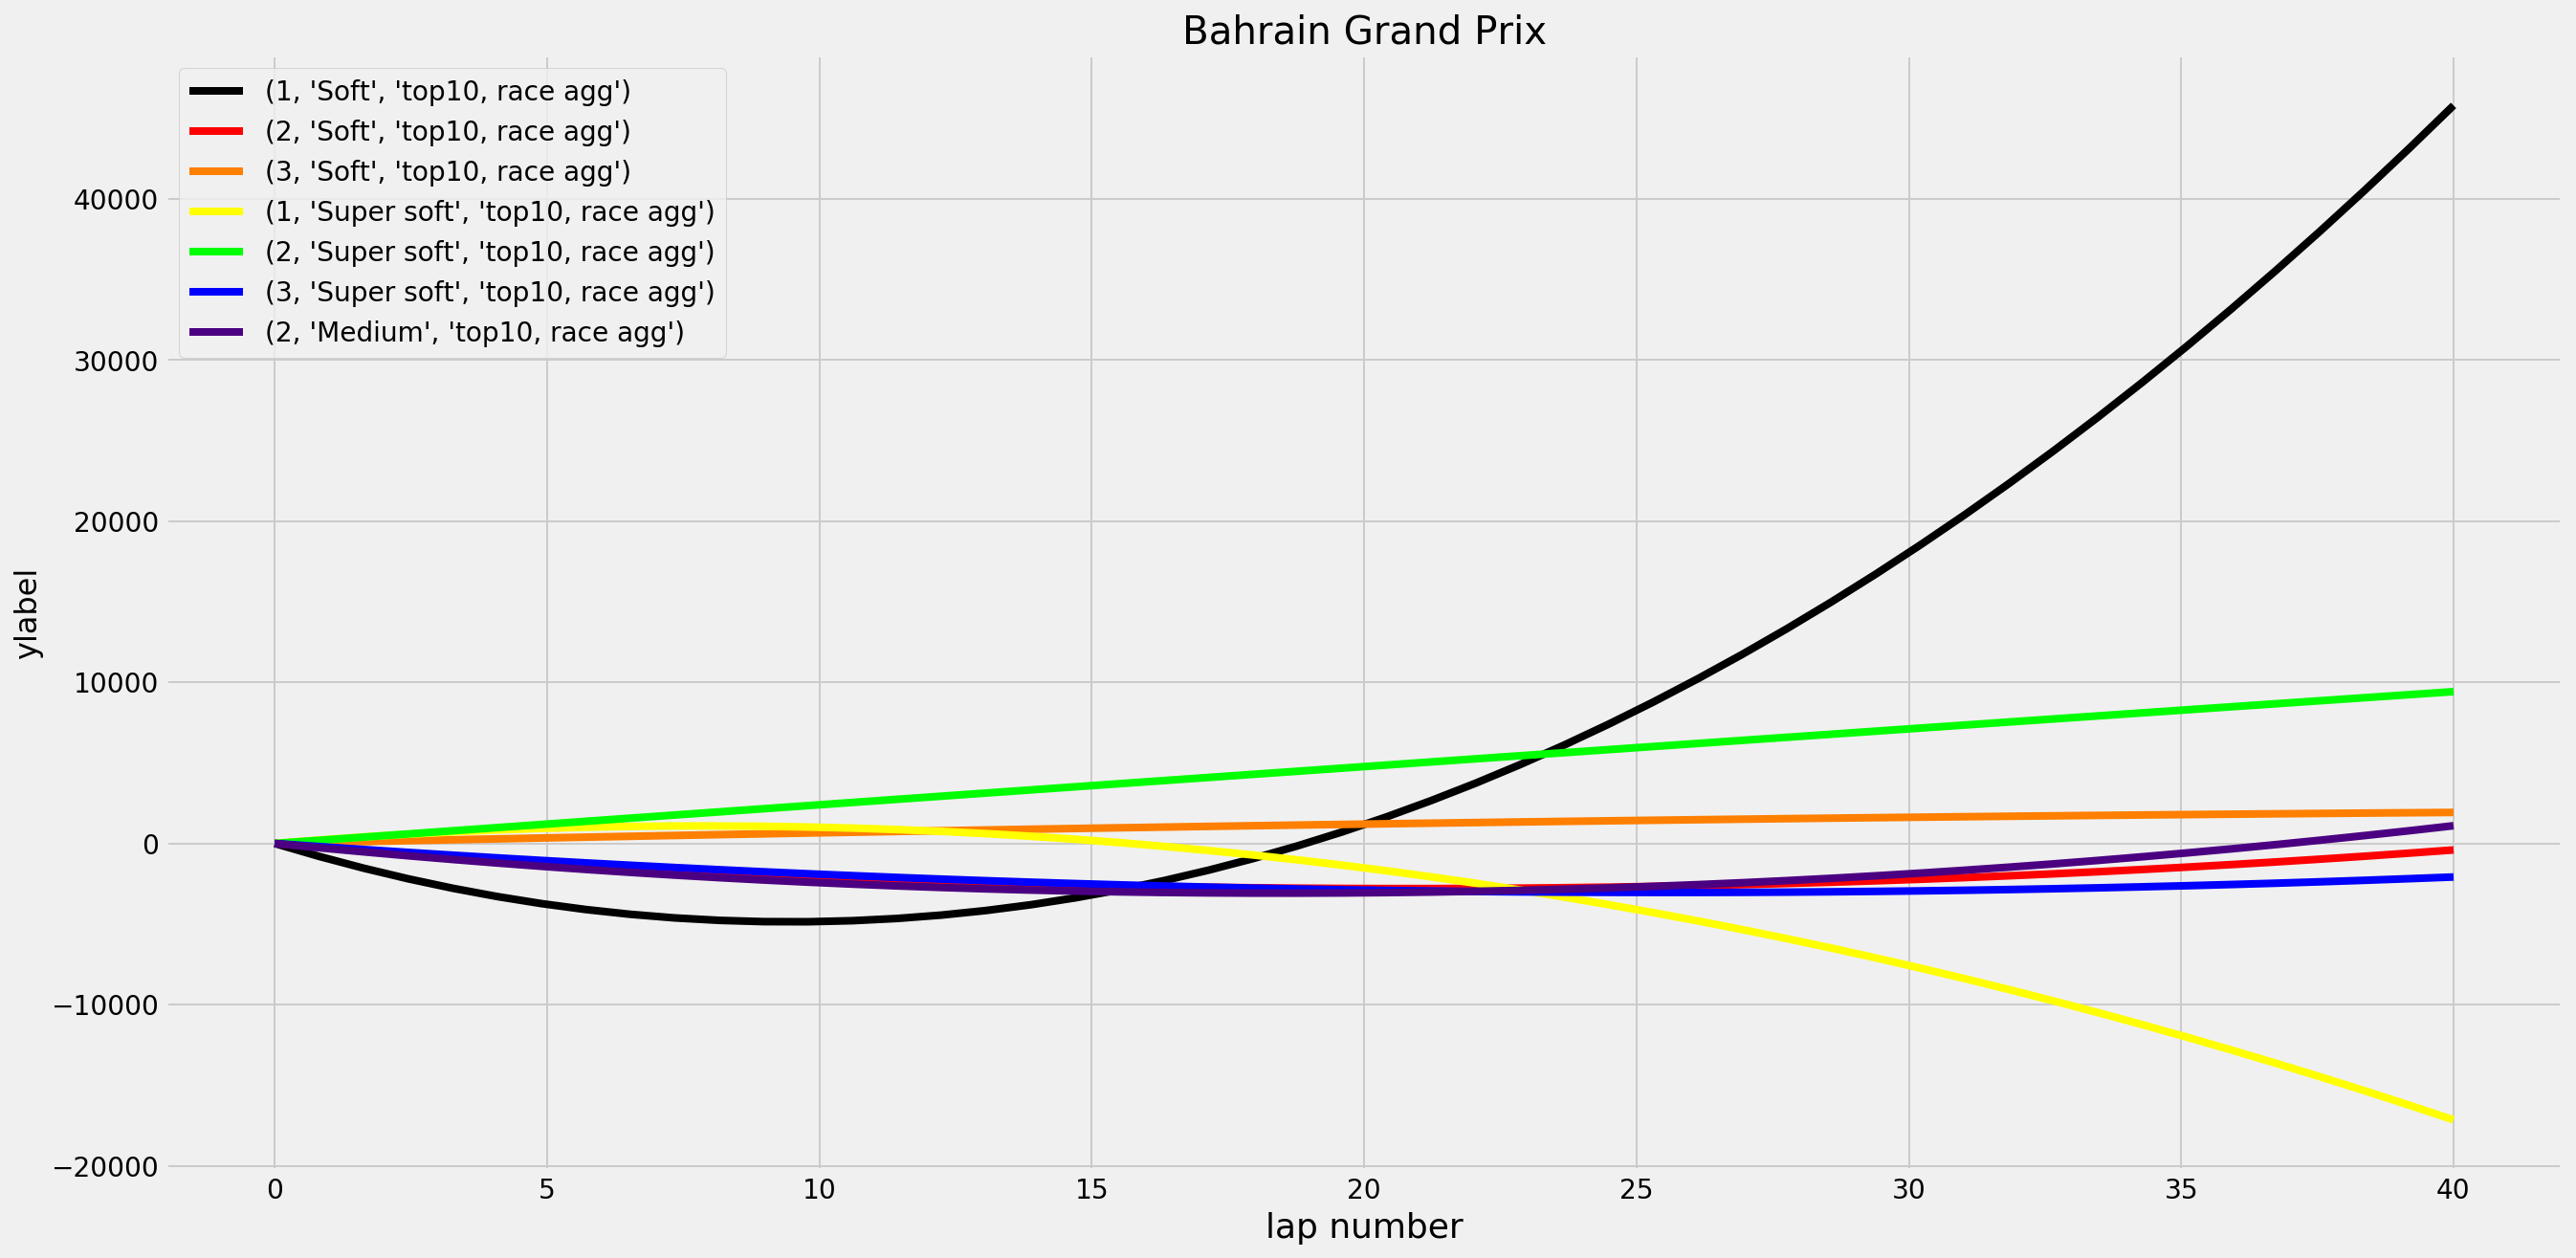

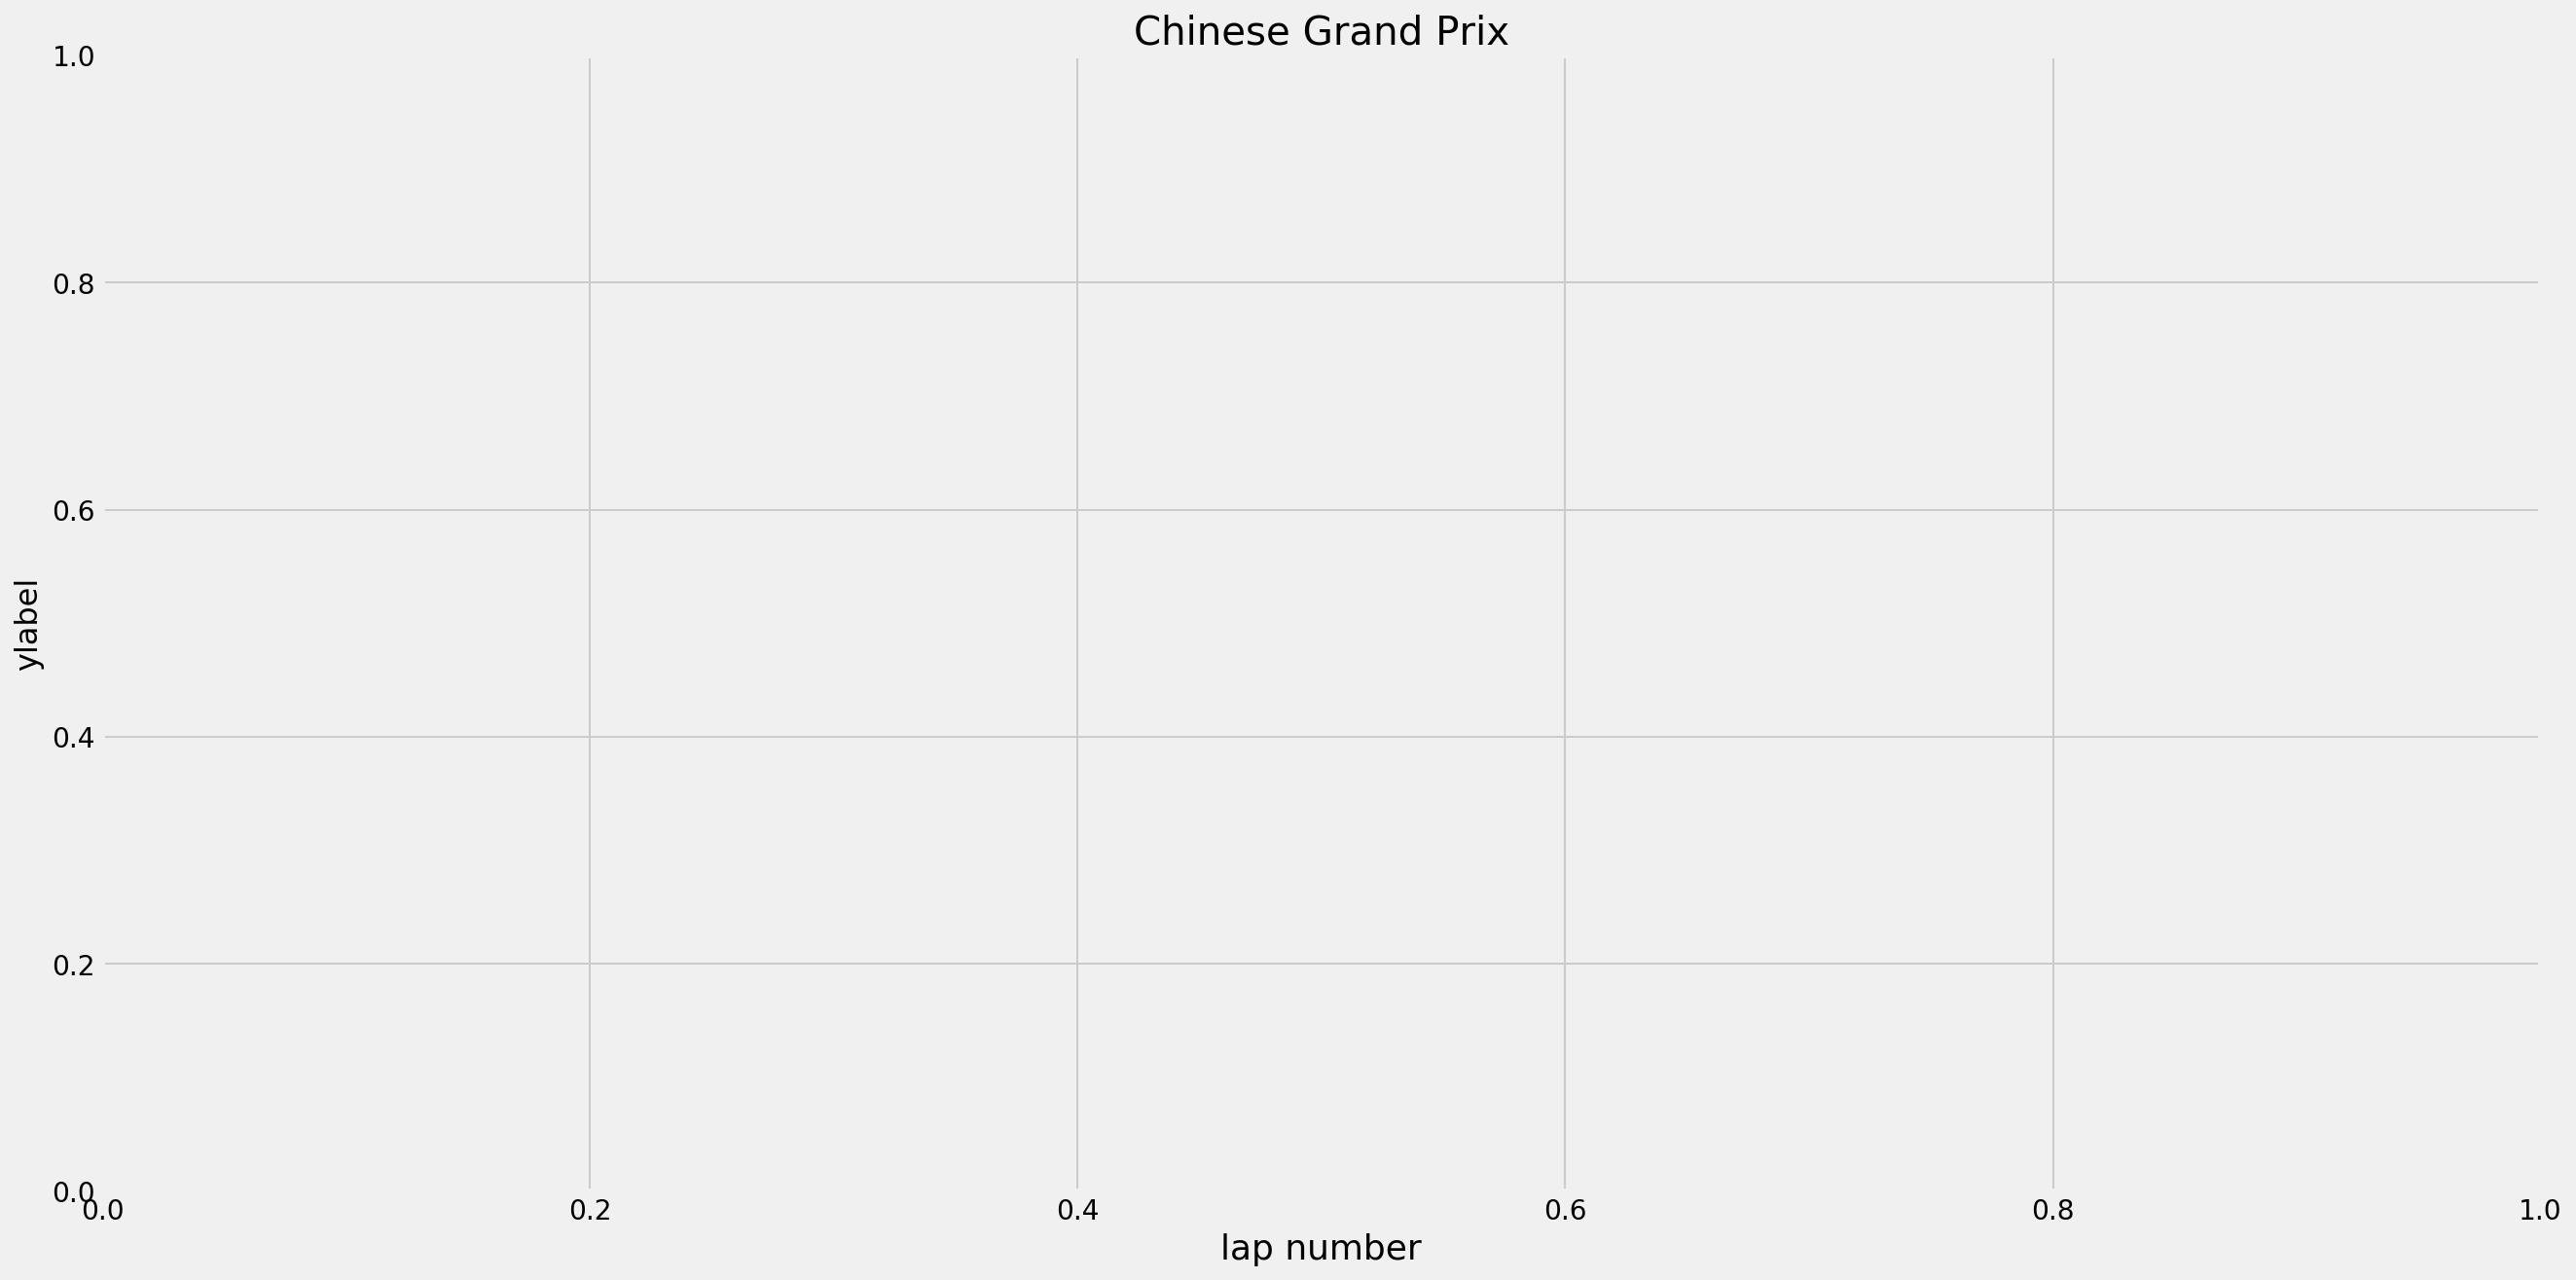

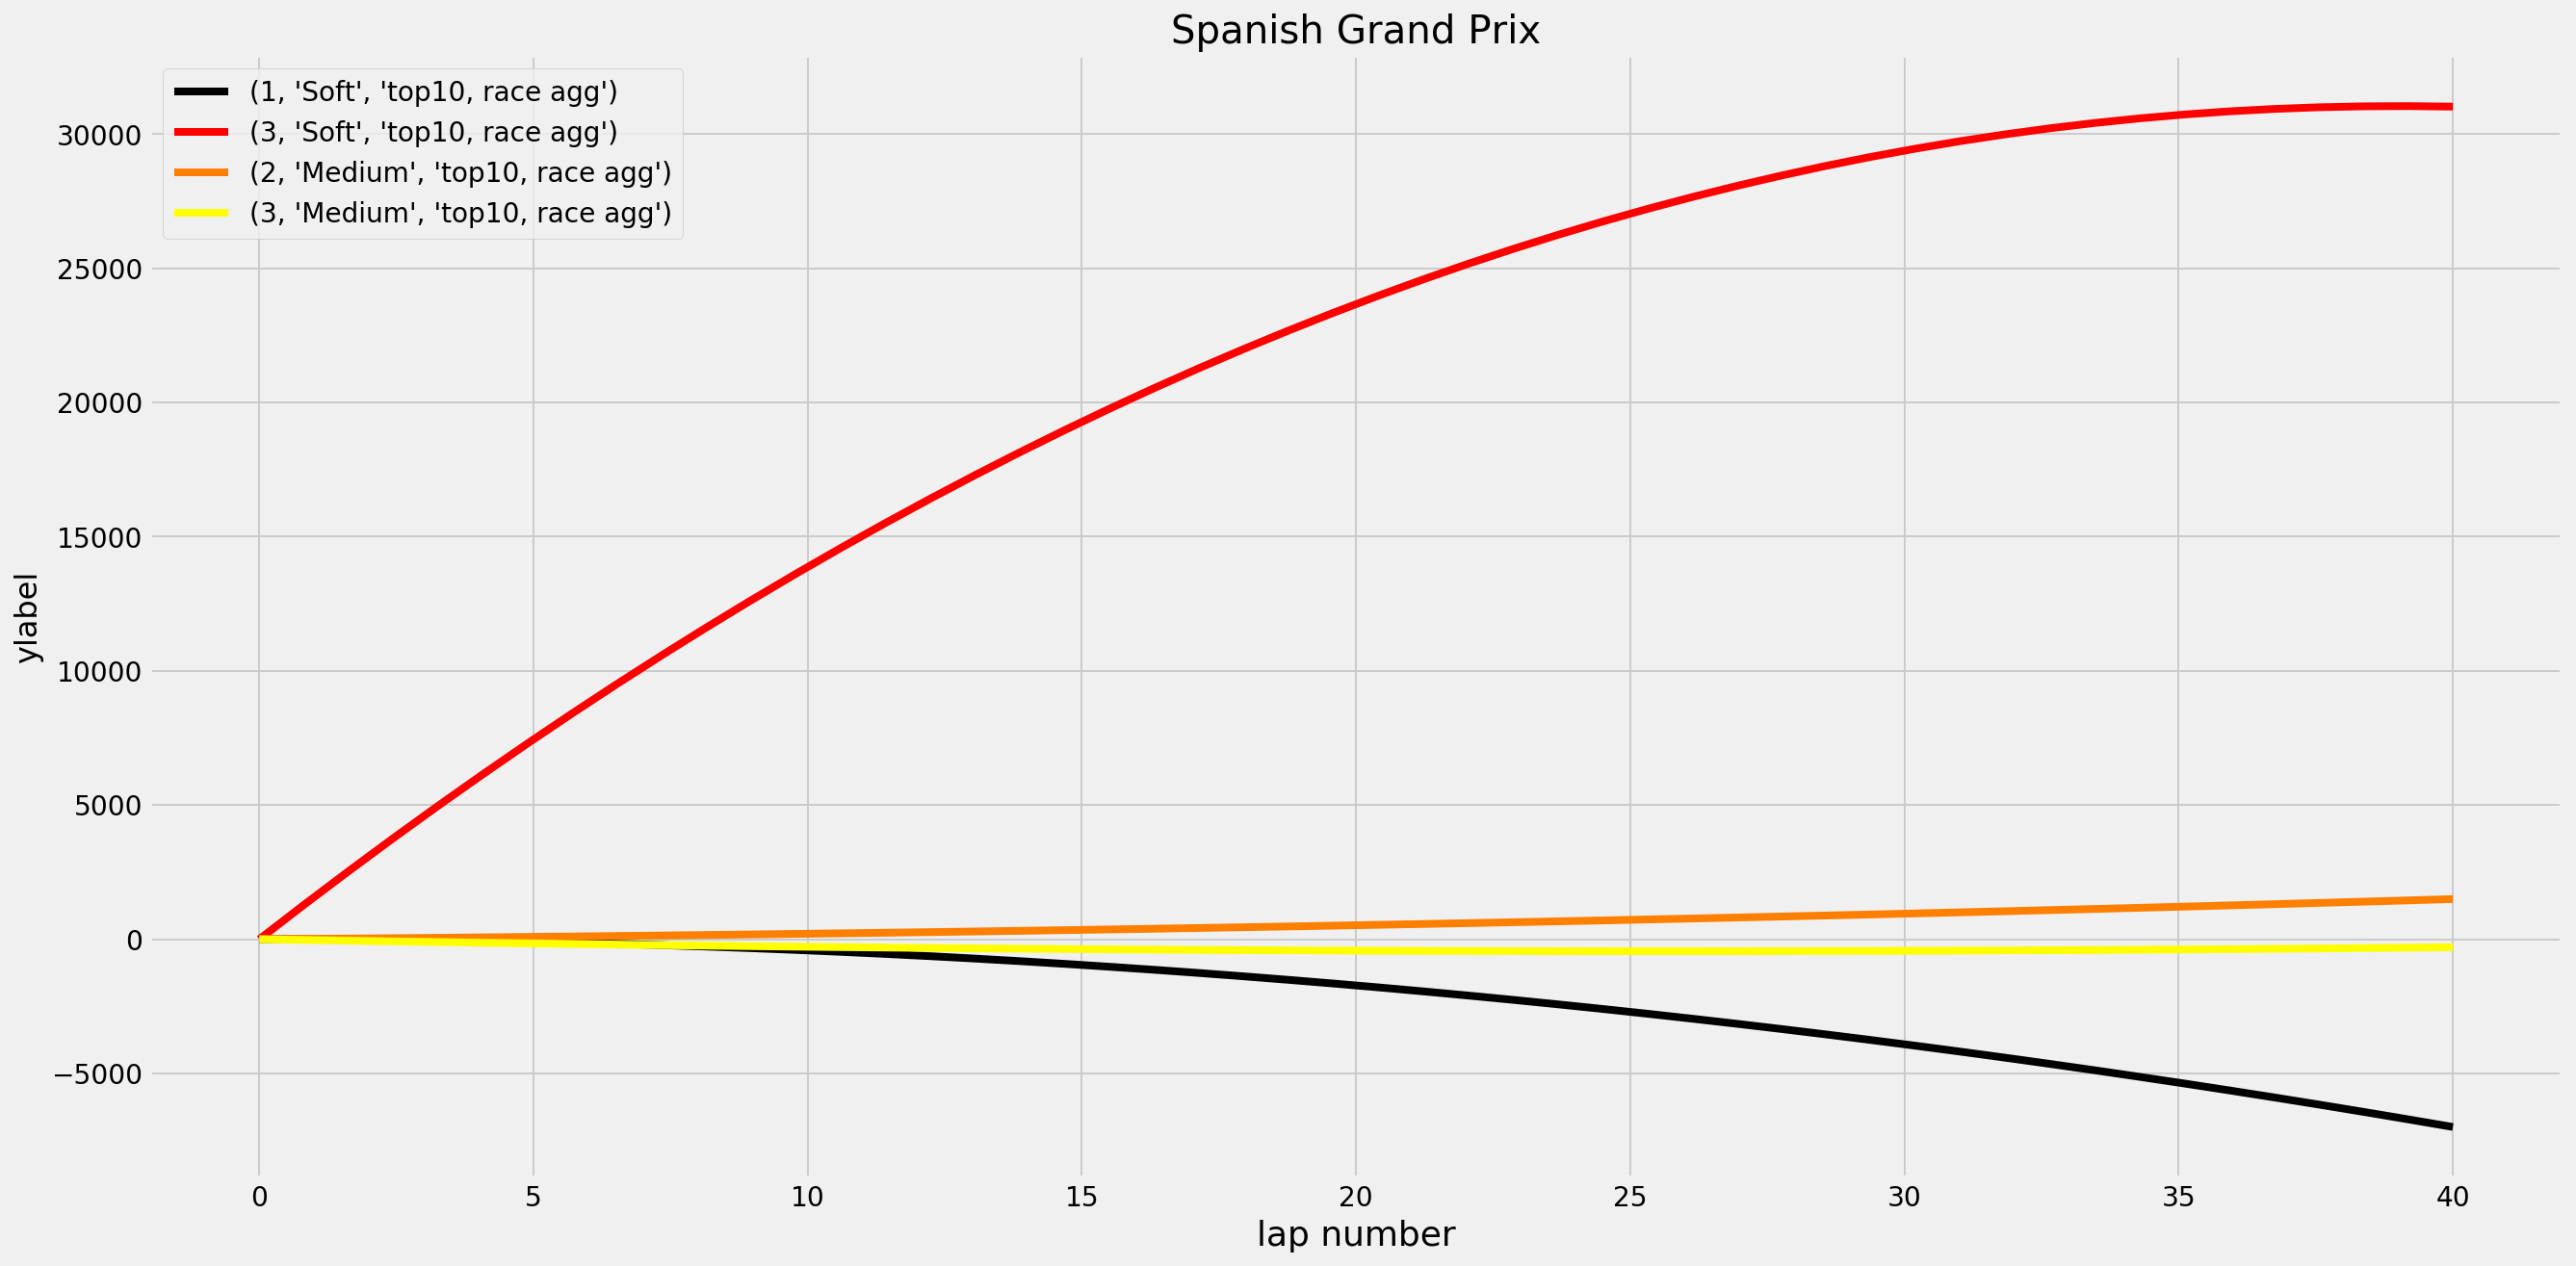

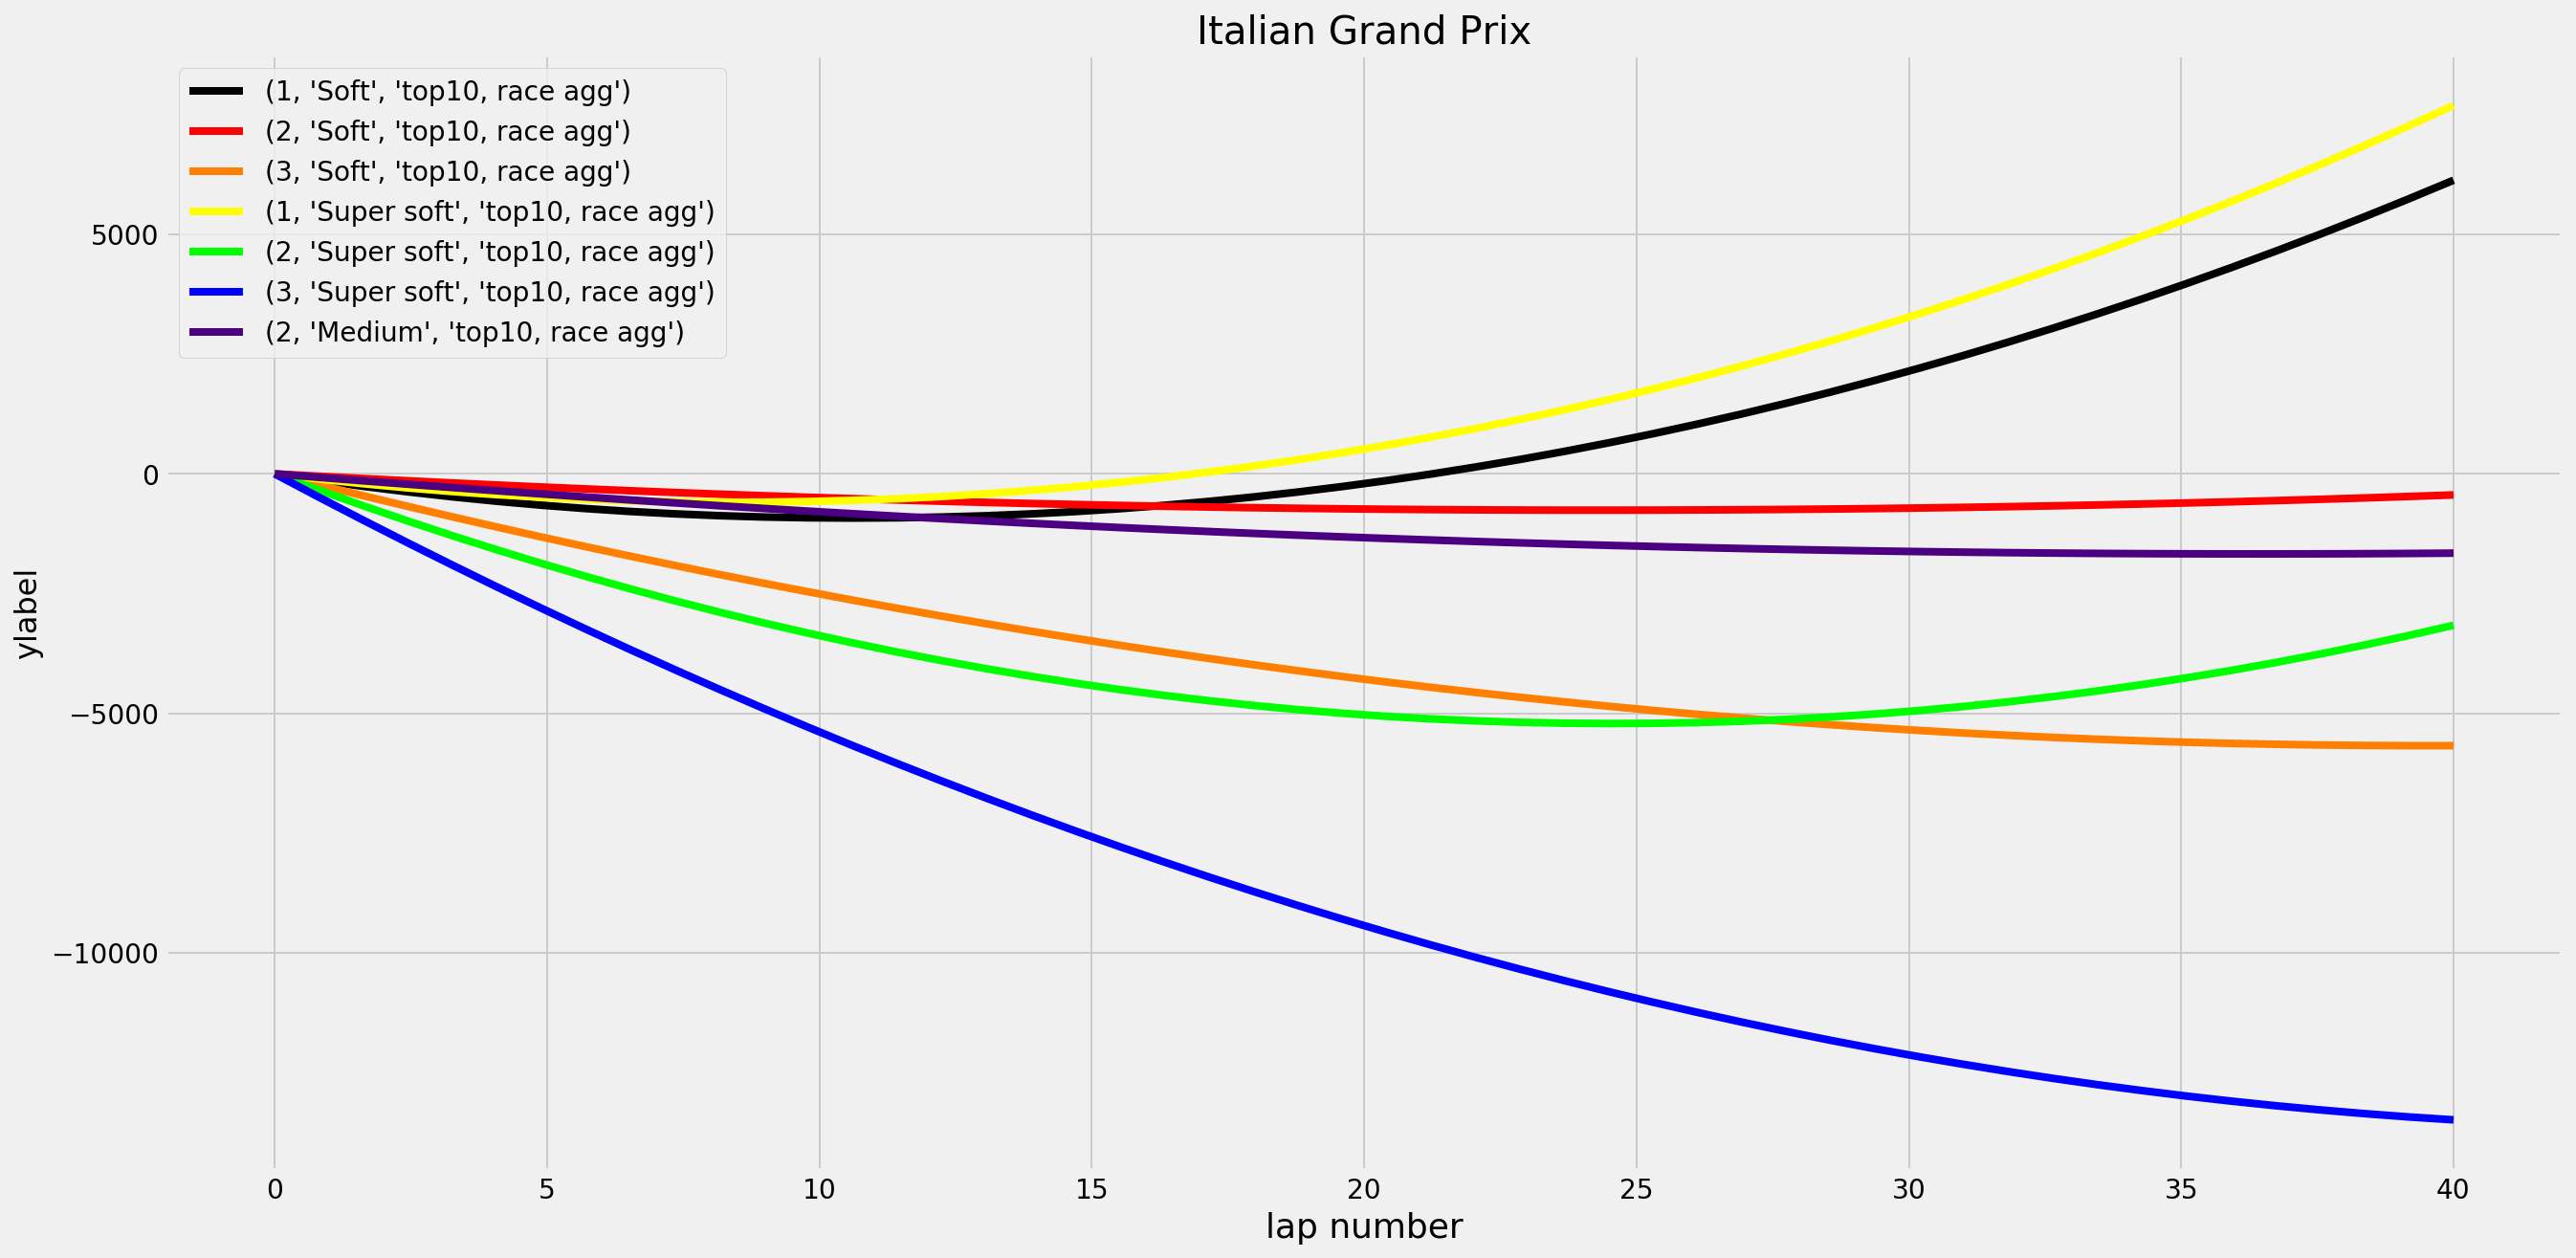

In [22]:
plot_sssm123_ad = all_drivers[(all_drivers['tyre'].isin(sssm)) & \
                    (all_drivers['stint'].isin(stint123)) & \
                    (all_drivers['name'].isin(sssm123))]
for name in sssm123:
    plot_degradation_curves1(plot_sssm123_ad, name, 2016, "coeffs")

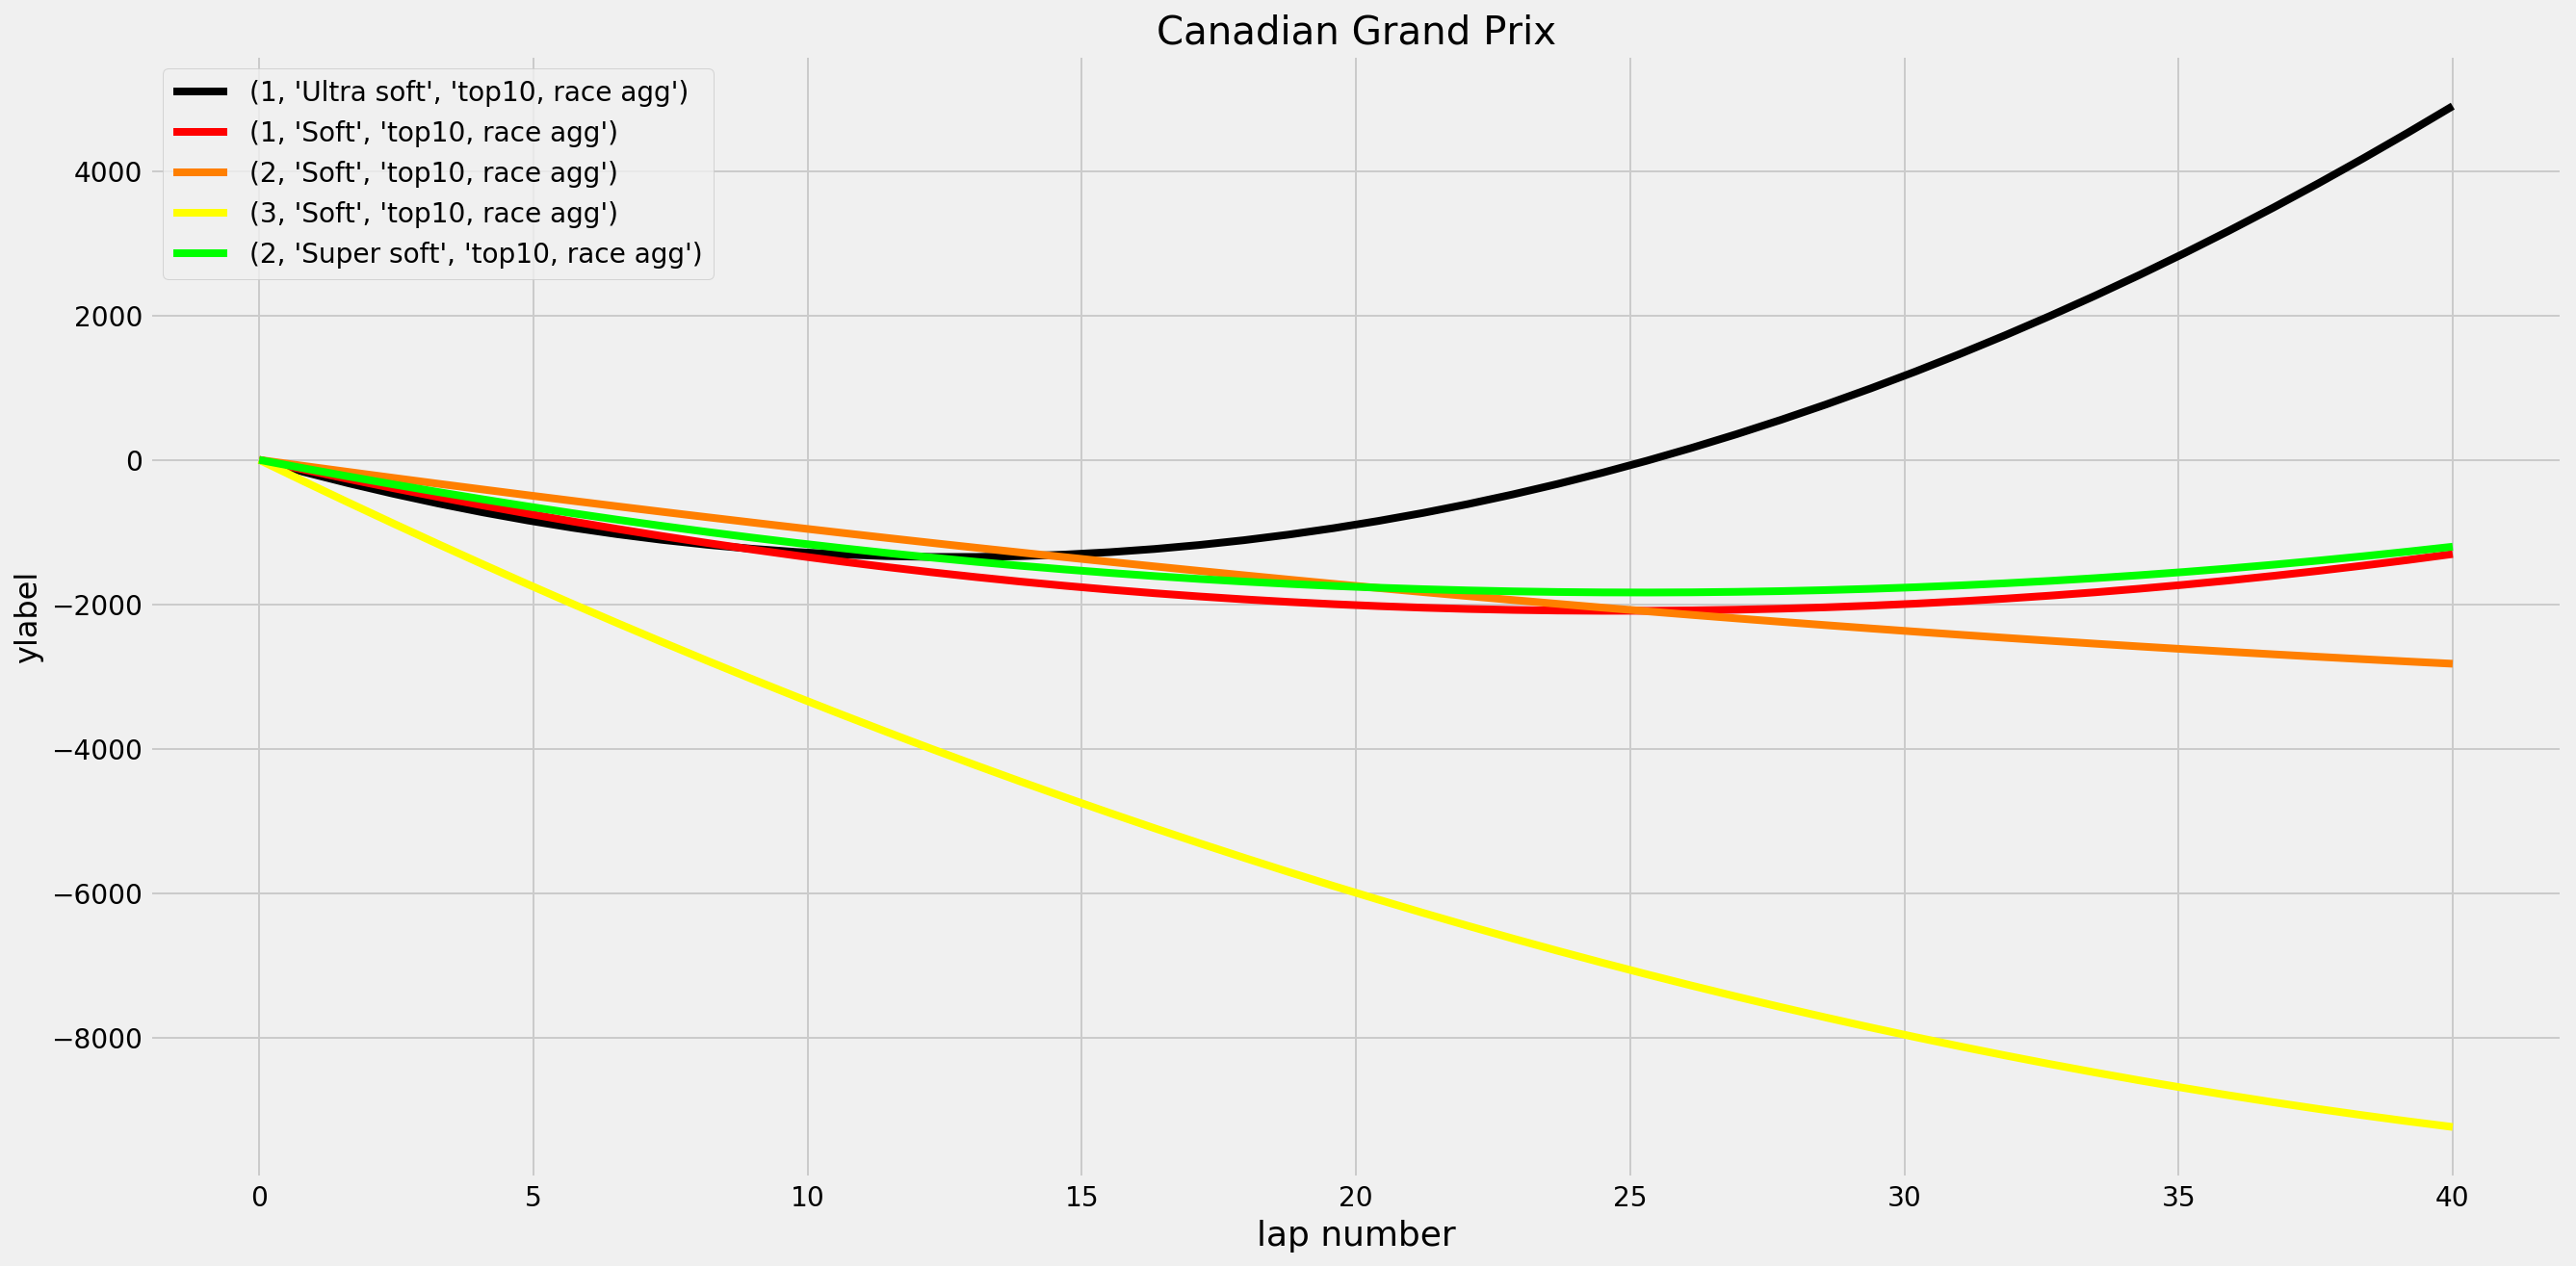

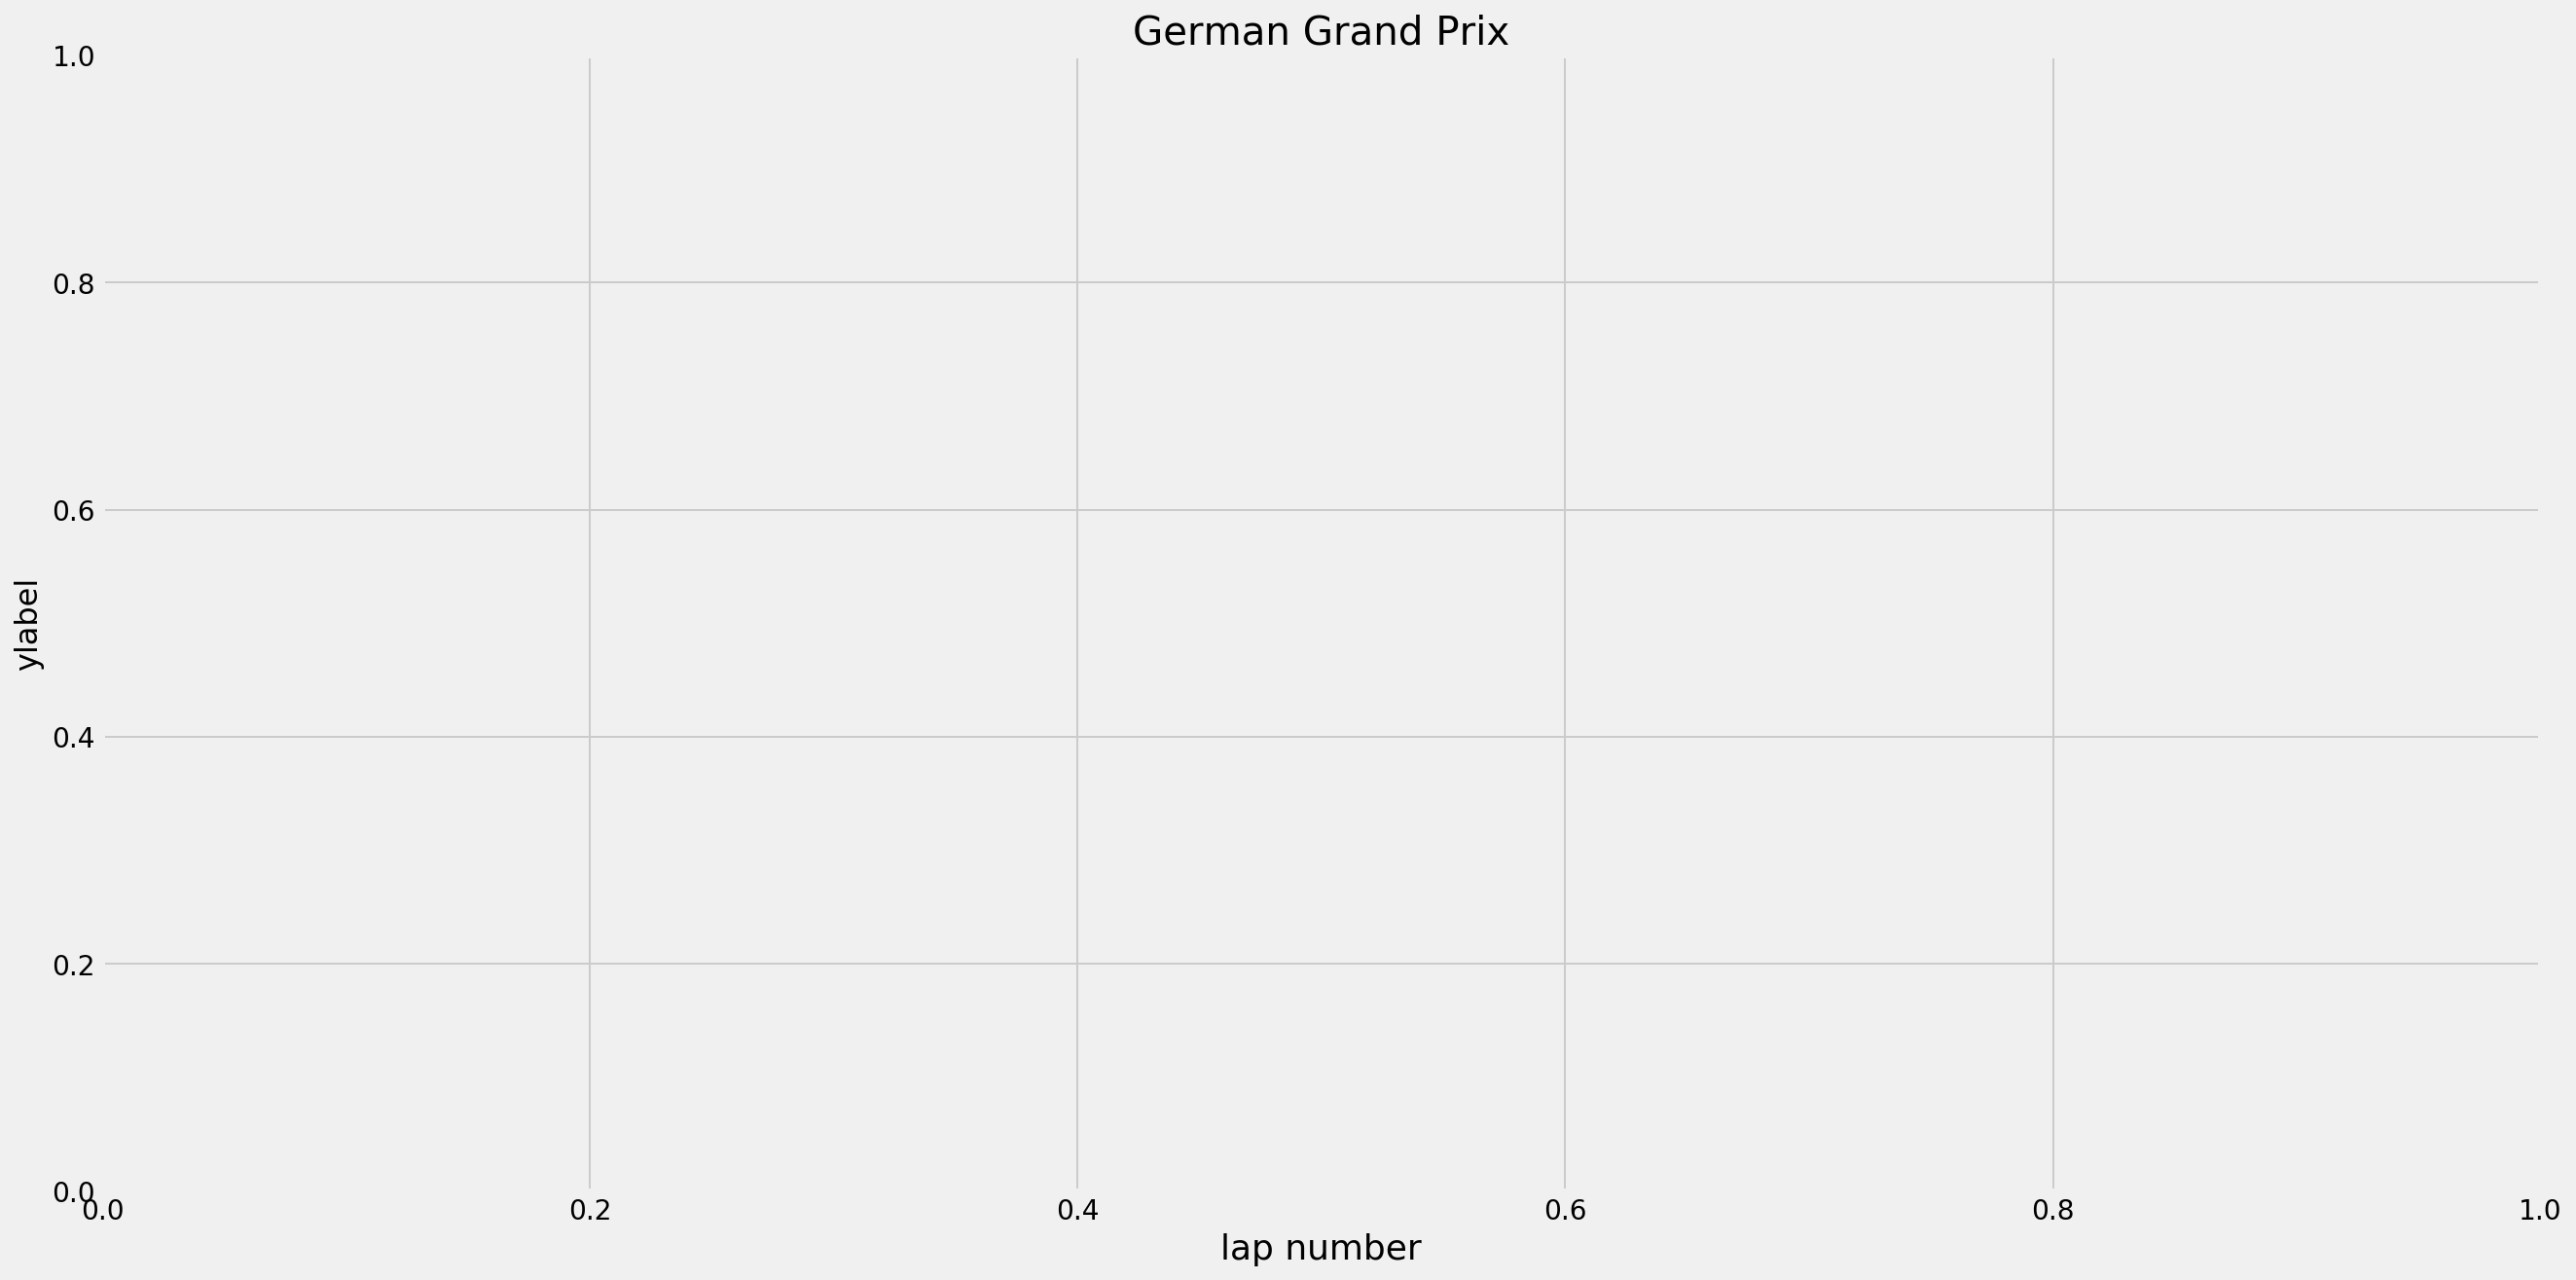

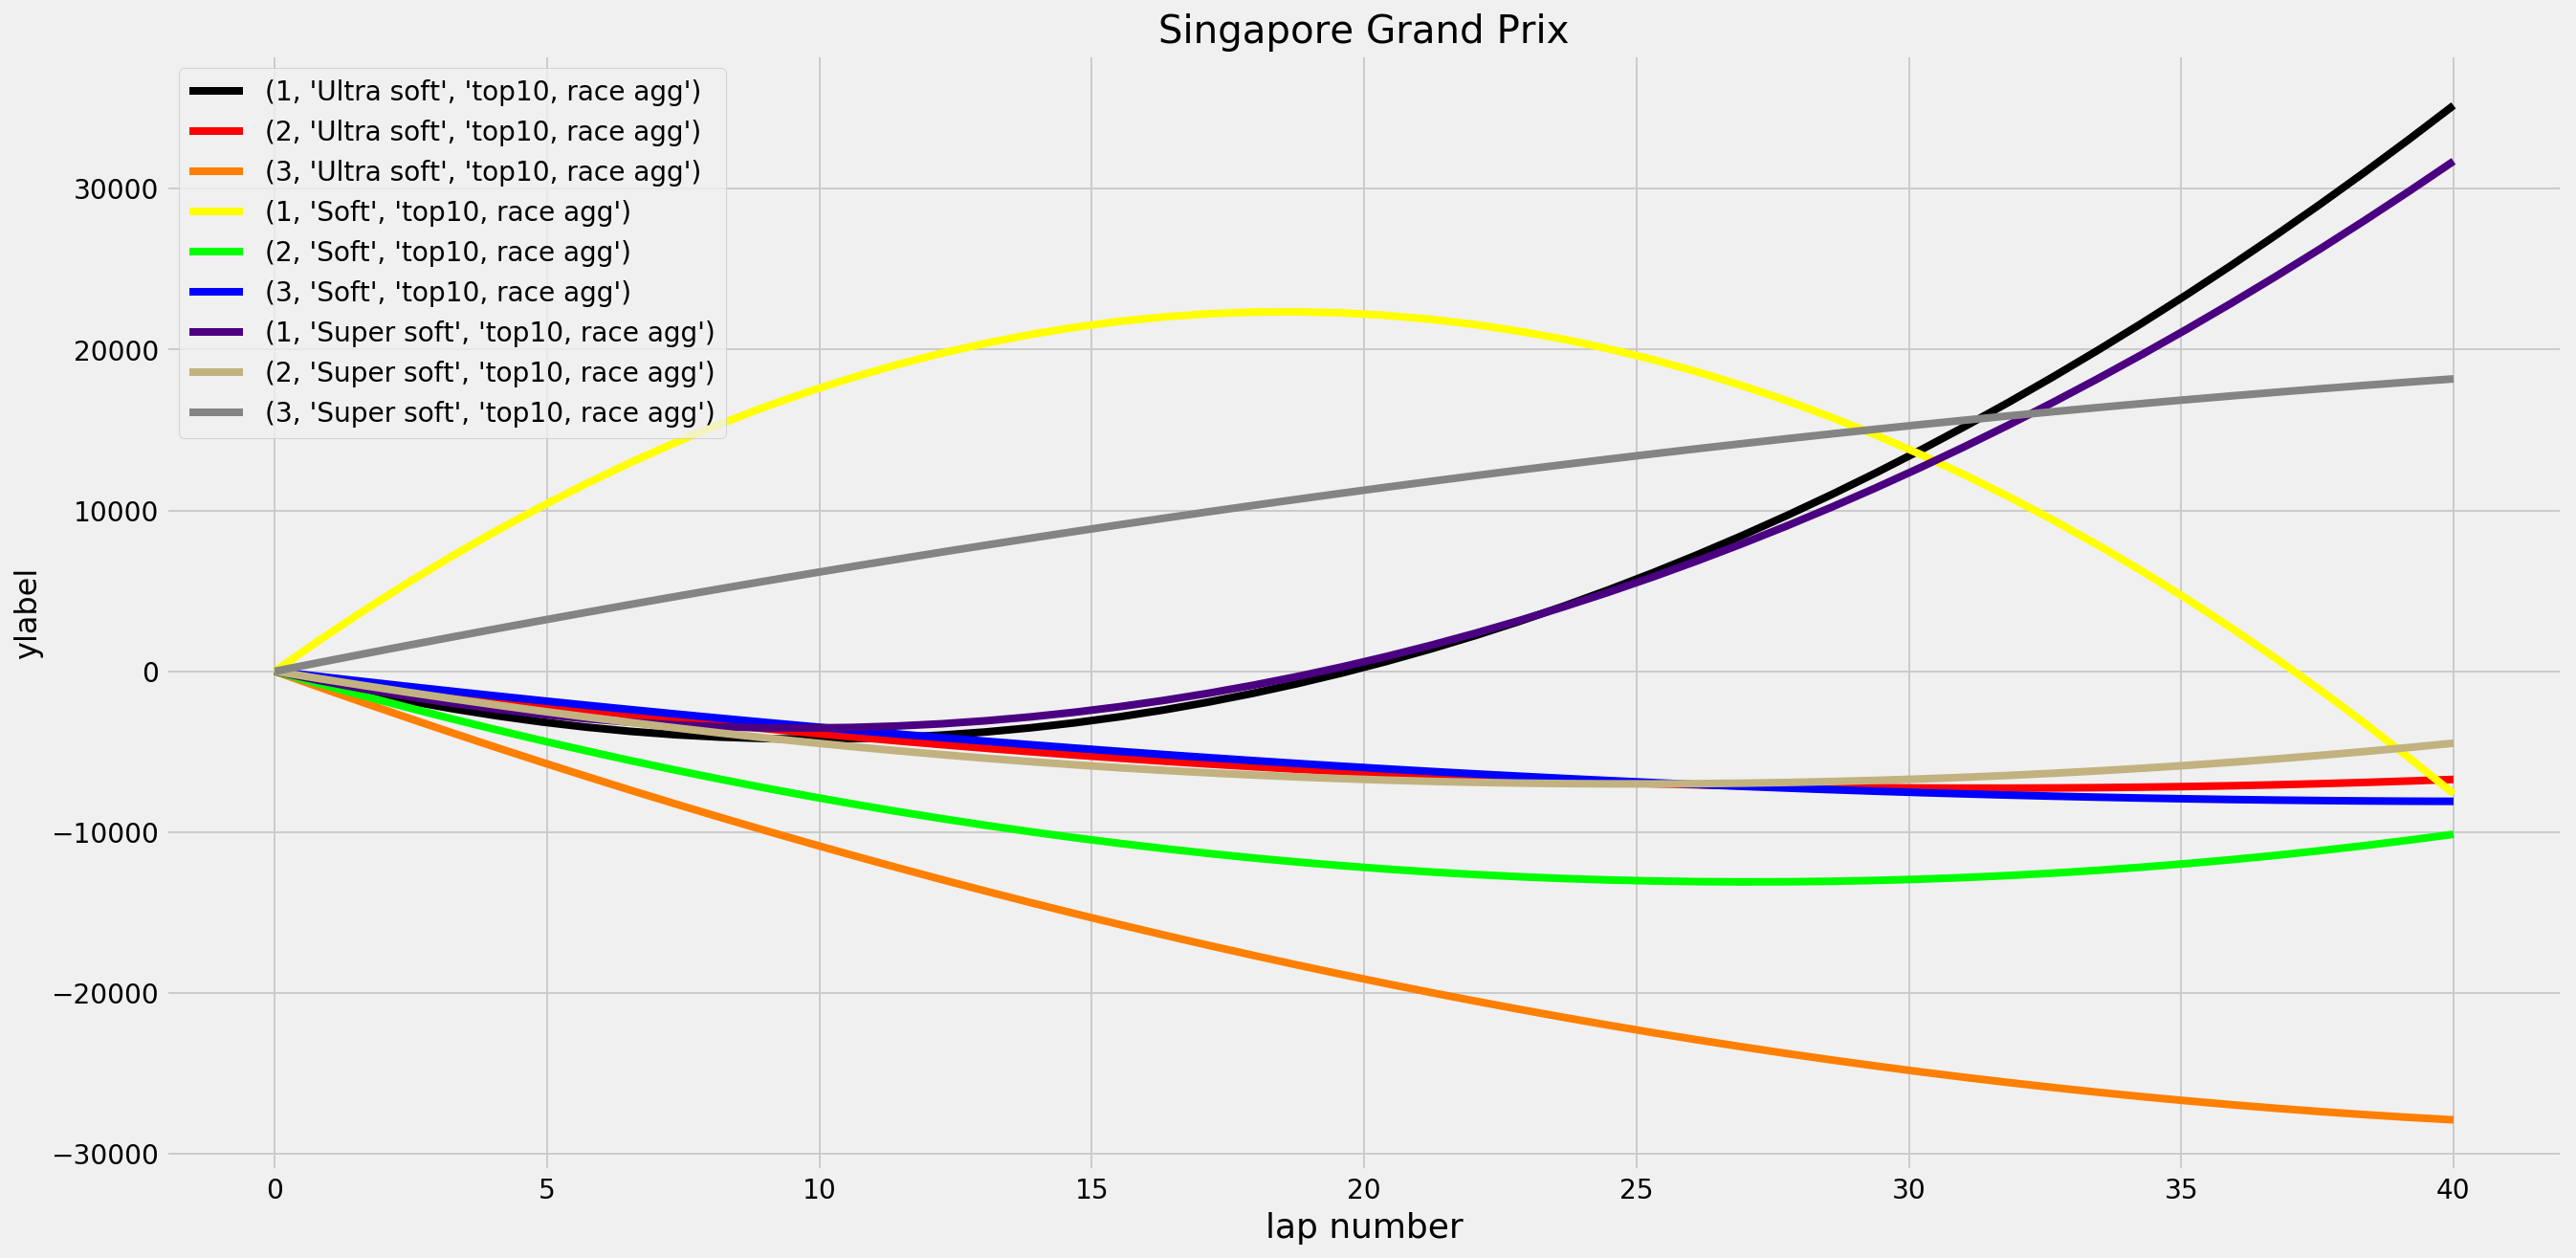

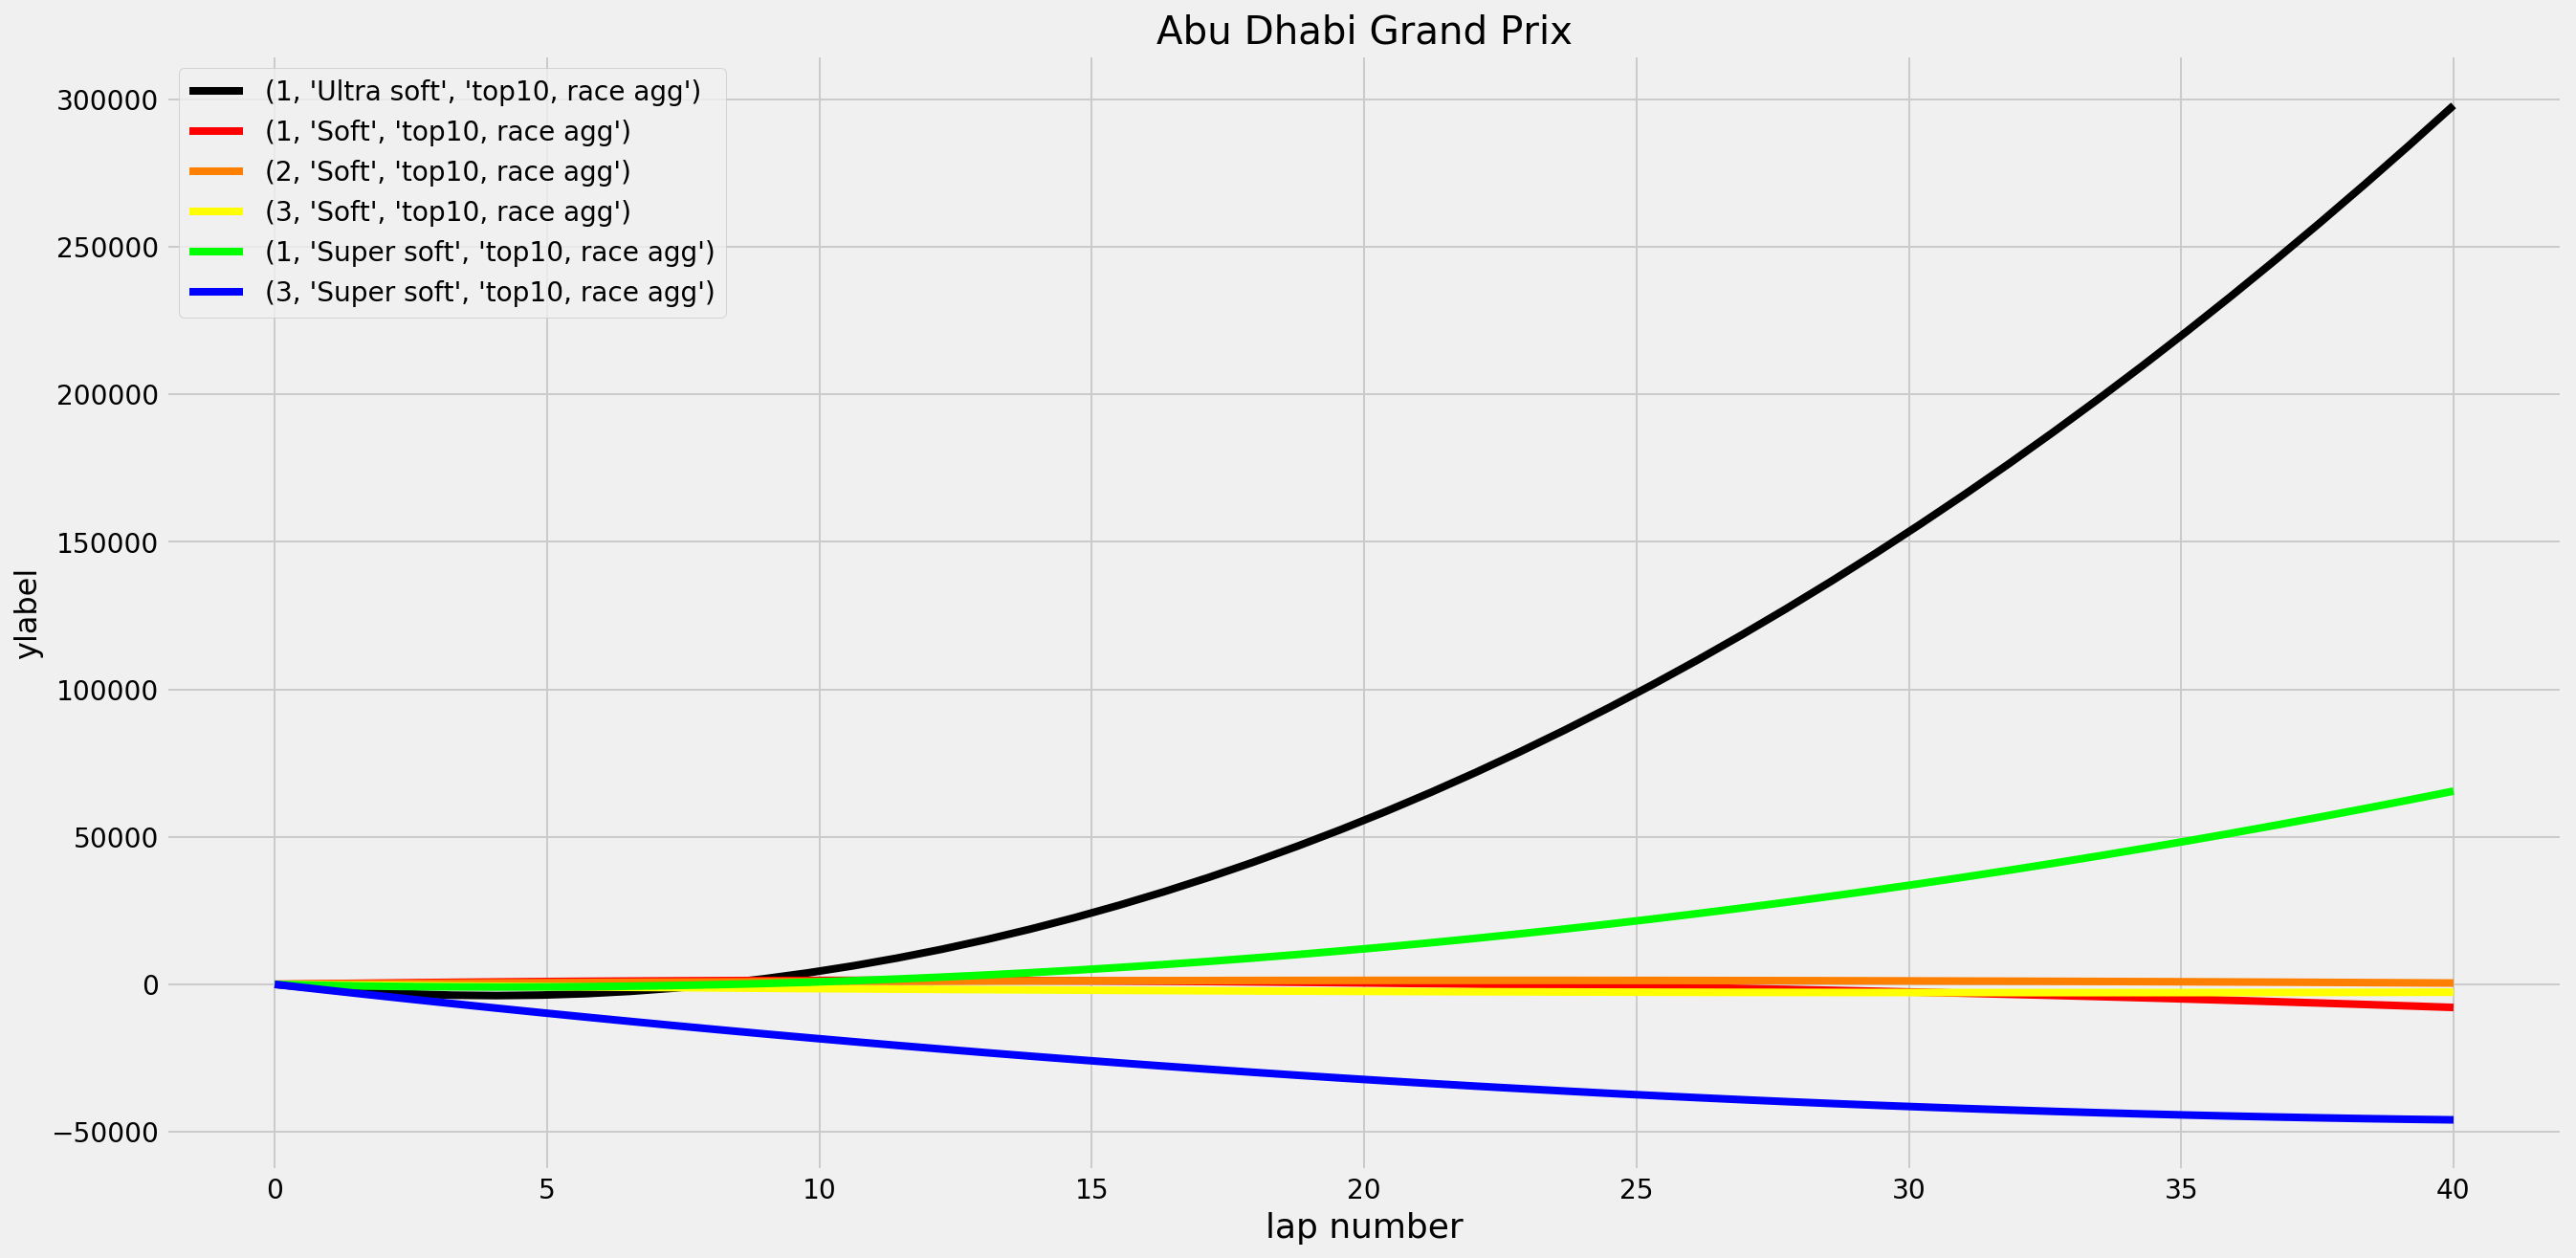

In [23]:
plot_ussss123_ad = all_drivers[(all_drivers['tyre'].isin(ussss)) & \
                    (all_drivers['stint'].isin(stint123)) & \
                    (all_drivers['name'].isin(ussss123))]
for name in ussss123:
    plot_degradation_curves1(plot_ussss123_ad, name, 2016, "coeffs")

#### Center the polynomial coefficients (intercept = 0)

In [24]:
def center_polynomial_curves(tyre_degrad, name, year, column):

    ps = []
    c_new = []
    model = tyre_degrad[tyre_degrad['name'] == name].reset_index(drop=True)
    model = model[model[column].notnull()].reset_index(drop=True)
    model = model[model[column] != "Did not run a full stint on this tyre during the race"].reset_index(drop=True)
    maxlaps = df_races_maxlaps[(df_races_maxlaps['name'] == name) & (df_races_maxlaps['year'] == year) ]['total laps']
    
    t = range(0, maxlaps)
    coeffs = model[column]
    c = [coeffs[i](t) for i in range(len(coeffs))]
    for i in c:
        i = i-i[0]
        c_new.append(i)

    centered = pd.DataFrame({"coeffs centered": c_new,
                     "stint": model['stint'],
                     "tyre": model['tyre'],
                     "name": name, 
                     "year": year})

    return centered

In [25]:
def center_polynomial_curves_concat(df, races, year, column):
    
    df_c = pd.DataFrame()
    for name in races:
        centered = center_polynomial_curves(df, name, year, column)
        df_c = pd.concat([df_c, centered])
        df_c = df_c.reset_index(drop=True)

    return df_c

In [26]:
# tyre_degrad_2016_new contain aggregated coeffs of race leaders  
# for missing values for stint and tyre groupings, they are inputed with the race's aggregated coeffs
# if there are still missing values, they are inputed with the season's aggregated coeffs
# center the polynomial curves to 0
# Based on visual inspection, we can see that variation of of curves between each stint on the same tyre differ greatly,
# Based on visual inspection, we can predict that the optimal tyre arrangement would be Soft on Stint 1, Super Soft on Stint 2
race_leaders_c = pd.DataFrame()
for name in races:
    centered = center_polynomial_curves(race_leaders, name, 2016, "coeffs")
    race_leaders_c = pd.concat([race_leaders_c, centered])
    race_leaders_c = race_leaders_c.reset_index(drop=True)
    
race_leaders_c

coeffs centered  \
0   [0.0, 22.3696969697, 58.4212121212, 108.154545...   
1   [0.0, -929.254852455, -1815.69967228, -2659.33...   
2   [0.0, -939.186561265, -1857.93929983, -2756.25...   
3   [0.0, -117.911263736, -227.321153846, -328.229...   
4   [0.0, -238.510319917, -468.515221878, -690.014...   
5   [0.0, -355.139393939, -636.960606061, -845.463...   
6   [0.0, -9823.38571428, -19352.1642857, -28586.3...   
7   [0.0, 93.9139902922, 184.187521489, 270.820593...   
8   [0.0, -231.487955182, -445.126470588, -640.915...   
9   [0.0, 416.057142857, 784.185714286, 1104.38571...   
10  [0.0, 1396.38571429, 2760.80714286, 4093.26428...   
11  [0.0, -1.17622377626, -0.667132867195, 1.52727...   
12  [0.0, -2021.21109312, -4010.55971673, -5968.04...   
13  [0.0, -4850.59435459, -9482.45307605, -13895.5...   
14  [0.0, -188.223777636, -358.09922321, -509.6263...   
15  [0.0, -244.552263178, -484.682018717, -720.389...   
16  [0.0, 872.075924076, 1715.54095904, 2530.39510...   
17  [0.0, -77.7211042312, -148.100748194, -211.138...   
18  [0.0, -328.934782609, -650.49647092, -964.6850...   
19  [0.0, -6251.32727273, -12406.4424242, -18465.3...   
20  [0.0, -908.580589509, -1794.20189076, -2656.86...   
21  [0.0, -28401.3333333, -54451.9880952, -78151.9...   
22  [0.0, 97.3466967815, 187.858836815, 271.536420...   
23  [0.0, -265.104879795, -526.393583428, -783.866...   
24  [0.0, -179.050949051, -352.334665335, -519.851...   
25  [0.0, 936.057142857, 1819.01538462, 2648.87472...   
26  [0.0, -613.811145511, -1208.02812177, -1782.65...   
27  [0.0, -227.96076555, -434.326862611, -619.0982...   
28  [0.0, -78.3689107827, -154.778346175, -229.228...   
29  [0.0, -427.123376623, -815.864635365, -1166.22...   
30  [0.0, -830.028571429, -1623.95824176, -2381.78...   
31  [0.0, -390.976506252, -773.535809019, -1147.67...   
32  [0.0, -574.887447056, -1097.66583303, -1568.33...   
33  [0.0, -5939.13846154, -11757.8923077, -17456.2...   
34  [0.0, -159.885714286, -247.613419913, -263.183...   
35  [0.0, -491.089010989, -956.325, -1395.70796703...   
36  [0.0, -514.167890314, -1015.73530886, -1504.70...   
37  [0.0, 23.7857142857, 18.5357142857, -15.75, -7...   
38  [0.0, -335.991435036, -656.706690368, -962.145...   
39  [0.0, 163.536137775, 323.725014116, 480.566629...   
40  [0.0, -36.3998341241, -69.2856796334, -98.6575...   
41  [0.0, -100.442402302, -199.209385133, -296.300...   
42  [0.0, -10965.0294118, -20752.9845201, -29363.8...   
43  [0.0, 3324.05369021, 6578.36279475, 9762.92731...   
44  [0.0, -6.68328412545, -14.0527273764, -22.1083...   
45  [0.0, -454.976006192, -899.107714138, -1332.39...   

                        name  stint          tyre  year  
0      Australian Grand Prix      1    Super soft  2016  
1      Australian Grand Prix      2    Super soft  2016  
2      Australian Grand Prix      3        Medium  2016  
3         Bahrain Grand Prix      2          Soft  2016  
4         Bahrain Grand Prix      4          Soft  2016  
5         Bahrain Grand Prix      1    Super soft  2016  
6         Bahrain Grand Prix      3    Super soft  2016  
7         Russian Grand Prix      2          Soft  2016  
8         Russian Grand Prix      1    Super soft  2016  
9         Spanish Grand Prix      1          Soft  2016  
10        Spanish Grand Prix      3          Soft  2016  
11        Spanish Grand Prix      2        Medium  2016  
12         Monaco Grand Prix      2    Ultra soft  2016  
13         Monaco Grand Prix      1           Wet  2016  
14       Canadian Grand Prix      1    Ultra soft  2016  
15       Canadian Grand Prix      2          Soft  2016  
16       Canadian Grand Prix      2    Super soft  2016  
17       Austrian Grand Prix      1    Ultra soft  2016  
18       Austrian Grand Prix      2          Soft  2016  
19       Austrian Grand Prix      3    Super soft  2016  
20        British Grand Prix      3        Medium  2016  
21        British Grand Prix      2  Intermediate  2016  
22      Hungarian Grand 

In [27]:
# race_leaders_new contain coeffs of race leaders, \
# for missing values for stint and tyre groupings, they are inputed with the aggregated coeffs
# center the polynomial curves to 0
all_drivers_c = pd.DataFrame()
for name in races:
    centered = center_polynomial_curves(all_drivers, name, 2016, "coeffs")
    all_drivers_c = pd.concat([all_drivers_c, centered])
    all_drivers_c = all_drivers_c.reset_index(drop=True)

all_drivers_c

coeffs centered  \
0    [0.0, -92.4131144618, -165.334665062, -218.764...   
1    [0.0, -49.5963139721, -98.5606012901, -146.892...   
2    [0.0, -170.495811136, -304.219702508, -401.171...   
3    [0.0, -1427.42314799, -2792.63689708, -4095.64...   
4    [0.0, -10517.6256657, -20822.5835755, -30914.8...   
5    [0.0, -122.790215417, -242.683789611, -359.680...   
6    [0.0, -43.6743808586, -85.7130703578, -126.116...   
7    [0.0, -973.880952381, -1839.0952381, -2595.642...   
8    [0.0, -263.129224454, -513.279744494, -750.451...   
9    [0.0, 71.3962480157, 141.601275694, 210.615083...   
10   [0.0, -912.00448481, -1800.8506635, -2666.5385...   
11   [0.0, 259.559523941, 483.817272171, 672.773244...   
12   [0.0, 241.377622378, 482.456543457, 723.236763...   
13   [0.0, -232.846181653, -456.418788397, -670.717...   
14   [0.0, -324.739160316, -631.413985076, -920.024...   
15   [0.0, -265.323076923, -525.03076923, -779.1230...   
16   [0.0, -288.54773513, -569.750927435, -843.6095...   
17   [0.0, -292.896430436, -563.625845878, -812.188...   
18   [0.0, 313.244155844, 610.890909091, 892.940259...   
19   [0.0, -792.414285715, -1568.36428572, -2327.85...   
20   [0.0, 1318.73809524, 2573.95238095, 3765.64285...   
21   [0.0, -1.81497004113, -12.50690636, -32.075808...   
22   [0.0, 1570.8729132, 3100.96640843, 4590.280485...   
23   [0.0, 15.2773675555, 31.6888327101, 49.2343954...   
24   [0.0, -34.3450040501, -67.31319377, -98.904569...   
25   [0.0, -295.532887209, -583.931854625, -865.196...   
26   [0.0, -2247.84839088, -4460.01886953, -6636.51...   
27   [0.0, -2299.47158715, -4561.20460552, -6785.19...   
28   [0.0, -1896.04416096, -3761.77220152, -5597.18...   
29   [0.0, -2175.27864246, -4315.62321188, -6421.03...   
..                                                 ...   
79   [0.0, -36.4326424654, -73.2304153952, -110.393...   
80   [0.0, 134.983727146, 260.841102674, 377.572126...   
81   [0.0, -35.0814936023, -70.3911206559, -105.928...   
82   [0.0, 216.587285879, 428.256732054, 635.008338...   
83   [0.0, 157.352238541, 302.118651895, 434.299240...   
84   [0.0, -270.072755418, -529.369066047, -777.888...   
85   [0.0, 520.586926688, 1010.06807512, 1468.44344...   
86   [0.0, -209.886939612, -413.939535774, -612.157...   
87   [0.0, -143.842421949, -282.170078485, -414.982...   
88   [0.0, -276.865649736, -544.919350066, -804.161...   
89   [0.0, -53.2072729423, -83.1431276853, -89.8075...   
90   [0.0, -88.9308427761, -172.146606138, -249.647...   
91   [0.0, 72.8661552129, 120.117041539, 141.752658...   
92   [0.0, 5500.08289676, 10824.2385978, 15972.4671...   
93   [0.0, 400.914266724, 783.339469394, 1147.27560...   
94   [0.0, -298.778498641, -590.584275601, -875.417...   
95   [0.0, 0.758469439621, 0.168338690404, -1.77039...   
96   [0.0, -3319.05738358, -6582.22727672, -9789.50...   
97   [0.0, -187.24585343, -349.22347114, -485.93285...   
98   [0.0, -46.1013533793, -91.4629704258, -136.084...   
99   [0.0, 460.567023411, 913.726168711, 1359.47743...   
100  [0.0, -10187.3293074, -19296.3537163, -27327.0...   
101  [0.0, 2744.85542607, 5431.25113141, 8059.18711...   
102  [0.0, 3542.75317158, 7013.220889, 10411.403152...   
103  [0.0, -1655.2, -2843.61428571, -3565.24285714,...   
104  [0.0, 231.714285714, 441.5, 629.357142857, 795...   
105  [0.0, 119.364379732, 233.15752368, 341.3794318...   
106  [0.0, -169.568835767, -333.851801312, -492.848...   
107  [0.0, -383.314285714, -663.021428571, -839.121...   
108  [0.0, -2053.66061856, -4060.89686646, -6021.70...   

                         name  stint        tyre  year  
0       Australian Grand Prix      1        Soft  2016  
1       Australian Grand Prix      3        Soft  2016  
2       Australian Grand Prix      1  Super soft  2016  
3       Australian Grand Prix      2  Super soft  2016  
4       Australian Grand Prix      4  Super soft  2016  
5       Australian Grand Prix      2      Medium  2016  
6       Australian Grand Prix      3      M

### FInd out the optimal pit laps and tyre combination

In [28]:
def tyre_combis(tyre_to_use_list, name , year):
    
    maxlaps = df_races_maxlaps[(df_races_maxlaps['name'] == name) & (df_races_maxlaps['year'] == year) ]['total laps']
    
    def all_exist(avalue, bvalue):
        return list(all(any(x in y for y in bvalue) for x in avalue))
    
    combins = itertools.combinations_with_replacement(tyre_to_use_list, maxlaps)
    combins_list = list(combins)
    
    return combins_list

In [77]:
def calc_optimal(tyre_to_use_list, name, year, tyre_degrad_models, show_table=False): 
    
    timings = []
    tyre_strategy = []
    freqs = []
    strategy = []
    
    # Filter tyre degradation models for the race
    model = tyre_degrad_models[tyre_degrad_models['name'] == name].reset_index(drop=True)
    #model = model[model["coeffs new"] != "Did not run a full stint on this tyre during the race"]
    
    # Generate tyre combinations (Driver must use first tyre specified)
    combis_all = tyre_combis(tyre_to_use_list, name , year)

    if len(tyre_to_use_list) == 2:
        combis = list(filter(lambda x: len(set(x)) > 1, combis_all))
        
    elif len(tyre_to_use_list) == 3:
        combis = list(filter(lambda x: len(set(x)) > 2, combis_all))
        
    elif len(tyre_to_use_list) == 4:
        combis = list(filter(lambda x: len(set(x)) > 3, combis_all))
    
    # Delete intger at end of tyre combination
    def remove_int(x):
        return x.translate(None, digits).rstrip(" ")
    
    combis_new = [map(remove_int, combis[x]) for x in range(len(combis))]
    
    tyre_to_use_list = map(remove_int, tyre_to_use_list)

    # Function to calculate total race time if tyre combination was used
    def calc_time_per_combi(x):

        freq = [len(list(group)) for key, group in groupby(combis[x])]
        #print freq
        #print combis_new[x]

        timing = []
        
        f1 = model[(model['tyre'] == combis_new[x][freq[0]-1]) & (model['stint'] == 0+1)]['coeffs centered'].reset_index(drop=True)[0]
        f1 = f1[0:freq[0]+1]
        t1 = simps(f1, dx=5)
        timing.append(t1)        
        #print "stint 1 : " + str(combis_new[x][freq[0]-1])
        #print "laps1 : " + str(freq[0])
        #print "y points 1: " + str(f1)
        #print timing
         
        if len(freq) > 1:
            f2 = model[(model['tyre'] == combis_new[x][freq[0]+freq[1]-1]) & (model['stint'] == 1+1)]['coeffs centered'].reset_index(drop=True)[0]     
            if f2.any():
                f2 = f2[0:freq[1]+1]
                f2 = list(np.asarray(f2) + f1[freq[0]])
                t2 = simps(f2, dx=5)
                timing.append(t2)
                #print str(f1[freq[0]])
                #print "stint 2 : " + str(combis_new[x][freq[0]+freq[1]-1])
                #print "laps 2: " + str(freq[1])
                #print "coeffs 2: " + str(f2)
                #print timing
                
        if len(freq) > 2:
            f3 = model[(model['tyre'] == combis_new[x][freq[0]+freq[1]+freq[2]-1]) & (model['stint'] == 2+1)]['coeffs centered'].reset_index(drop=True)[0]
            if f3.any():
                f3 = f3[0:freq[2]+1] 
                f3 = list(np.asarray(f3) + f2[freq[1]])
                t3 = simps(f3, dx=5) 
                timing.append(t3)
                #print str(f2[freq[1]])
                #print "stint 3 : " + str(combis_new[x][freq[0]+freq[1]+freq[2]-1])
                #print "laps 3: " + str(freq[2])
                #print "coeffs 3: " + str(f3)
                #print timing

        summed = sum([int(i) for i in timing])
        #print "total : " + str(summed)
        #print "------------------------------"
        return summed 

    # Create dataframe of results of all combinations
    for x in range(len(combis)):
        c = calc_time_per_combi(x)
        timings.append(c)
        tyre_strategy.append(combis[x])
        freq = [len(list(group)) for key, group in groupby(combis[x])]
        freqs.append(freq)

    df = pd.DataFrame({"tyre strategy": combis,
                            "tyre freq": freqs,
                            "timings": timings}).sort_values("timings", ascending=True)

    # Find the optimal tyre strategy 
    # Lowest timing: Optimal laps where pitstops should happen
    def find_optimal(df):
        mini = df.iloc[:,0].idxmin()
        optimal = df['tyre freq'][mini]
        strategy = df['tyre strategy'][mini]
        return optimal, strategy

    optimal, strategy = find_optimal(df)

    if show_table == True:
        return df
    else:
        return optimal, strategy 

#### Eg. Predict the optimal pitlaps for 2016 Russian Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [73]:
sss_aus = calc_optimal(['Super soft 1', 'Super soft 2', 'Medium'], "Australian Grand Prix", 2016, race_leaders_c, show_table=True)
sss_aus

timings    tyre freq                                      tyre strategy
1529 -5258538  [1, 11, 45]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1530 -5254762  [1, 10, 46]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1528 -5250486  [1, 12, 44]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1531 -5238521   [1, 9, 47]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1527 -5231030  [1, 13, 43]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1532 -5209390   [1, 8, 48]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1526 -5200807  [1, 14, 42]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1533 -5166733   [1, 7, 49]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1525 -5160238  [1, 15, 41]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1534 -5110127   [1, 6, 50]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1524 -5109962  [1, 16, 40]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1474 -5099140  [2, 11, 44]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1475 -5097702  [2, 10, 45]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1473 -5089030  [2, 12, 43]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1476 -5084150   [2, 9, 46]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1472 -5067868  [2, 13, 42]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1477 -5057991   [2, 8, 47]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1523 -5050404  [1, 17, 39]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1535 -5038935   [1, 5, 51]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1471 -5036218  [2, 14, 41]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1478 -5018657   [2, 7, 48]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1470 -4994576  [2, 15, 40]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1522 -4982198  [1, 18, 38]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1479 -4965655   [2, 6, 49]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1536 -4952733   [1, 4, 52]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1469 -4943508  [2, 16, 39]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1421 -4937251  [3, 10, 44]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1420 -4936416  [3, 11, 43]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1422 -4926252   [3, 9, 45]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1419 -4924386  [3, 12, 42]  (Super soft 1, Super soft 1, Super soft 1, Sup...
...       ...          ...                                                ...
29    1923551   [48, 7, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
28    1925804   [48, 8, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
26    1976570   [49, 2, 6]  (Super soft 1, Super soft 1, Super soft 1, Sup...
27    1976731   [49, 1, 7]  (Super soft 1, Super soft 1, Super soft 1, Sup...
25    1977938   [49, 3, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
24    1980198   [49, 4, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
23    1982926   [49, 5, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
22    1985485   [49, 6, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
21    1987452   [49, 7, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
20    2036029   [50, 1, 6]  (Super soft 1, Super soft 1, Super soft 1, Sup...
19    2036183   [50, 2, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
18    2037516   [50, 3, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
17    2039459   [50, 4, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
16    2041519   [50, 5, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
15    2043129   [50, 6, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
14    2088203   [51, 1, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
13    2088537   [51, 2, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
12    2089766   [51, 3, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
11    2091256   [51, 4, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
10    2092581   [51, 5, 1]  

#### Eg. Predict the optimal pitlaps for 2016 Russian Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [78]:
sssm_rus = calc_optimal(['Super soft', 'Soft'], "Russian Grand Prix", 2016, race_leaders_c, show_table=True)
sssm_rus

timings tyre freq                                      tyre strategy
37  -209532  [15, 38]  (Super soft, Super soft, Super soft, Super sof...
38  -208138  [14, 39]  (Super soft, Super soft, Super soft, Super sof...
36  -207902  [16, 37]  (Super soft, Super soft, Super soft, Super sof...
39  -203525  [13, 40]  (Super soft, Super soft, Super soft, Super sof...
35  -203373  [17, 36]  (Super soft, Super soft, Super soft, Super sof...
34  -196139  [18, 35]  (Super soft, Super soft, Super soft, Super sof...
40  -195567  [12, 41]  (Super soft, Super soft, Super soft, Super sof...
33  -186328  [19, 34]  (Super soft, Super soft, Super soft, Super sof...
41  -184069  [11, 42]  (Super soft, Super soft, Super soft, Super sof...
32  -174134  [20, 33]  (Super soft, Super soft, Super soft, Super sof...
42  -168905  [10, 43]  (Super soft, Super soft, Super soft, Super sof...
31  -159681  [21, 32]  (Super soft, Super soft, Super soft, Super sof...
43  -149881   [9, 44]  (Super soft, Super soft, Super soft, Super sof...
30  -143167  [22, 31]  (Super soft, Super soft, Super soft, Super sof...
44  -126871   [8, 45]  (Super soft, Super soft, Super soft, Super sof...
29  -124715  [23, 30]  (Super soft, Super soft, Super soft, Super sof...
28  -104522  [24, 29]  (Super soft, Super soft, Super soft, Super sof...
45   -99679   [7, 46]  (Super soft, Super soft, Super soft, Super sof...
27   -82711  [25, 28]  (Super soft, Super soft, Super soft, Super sof...
46   -68181   [6, 47]  (Super soft, Super soft, Super soft, Super sof...
26   -59480  [26, 27]  (Super soft, Super soft, Super soft, Super sof...
25   -34952  [27, 26]  (Super soft, Super soft, Super soft, Super sof...
47   -32181   [5, 48]  (Super soft, Super soft, Super soft, Super sof...
24    -9324  [28, 25]  (Super soft, Super soft, Super soft, Super sof...
48     8445   [4, 49]  (Super soft, Super soft, Super soft, Super sof...
23    17280  [29, 24]  (Super soft, Super soft, Super soft, Super sof...
22    44664  [30, 23]  (Super soft, Super soft, Super soft, Super sof...
49    53895   [3, 50]  (Super soft, Super soft, Super soft, Soft, Sof...
21    72704  [31, 22]  (Super soft, Super soft, Super soft, Super sof...
20   101202  [32, 21]  (Super soft, Super soft, Super soft, Super sof...
50   104292   [2, 51]  (Super soft, Super soft, Soft, Soft, Soft, Sof...
19   130035  [33, 20]  (Super soft, Super soft, Super soft, Super sof...
18   159007  [34, 19]  (Super soft, Super soft, Super soft, Super sof...
51   159833   [1, 52]  (Super soft, Soft, Soft, Soft, Soft, Soft, Sof...
17   187992  [35, 18]  (Super soft, Super soft, Super soft, Super sof...
16   216796  [36, 17]  (Super soft, Super soft, Super soft, Super sof...
15   245292  [37, 16]  (Super soft, Super soft, Super soft, Super sof...
14   273287  [38, 15]  (Super soft, Super soft, Super soft, Super sof...
13   300654  [39, 14]  (Super soft, Super soft, Super soft, Super sof...
12   327199  [40, 13]  (Super soft, Super soft, Super soft, Super sof...
11   352794  [41, 12]  (Super soft, Super soft, Super soft, Super sof...
10   377247  [42, 11]  (Super soft, Super soft, Super soft, Super sof...
9    400431  [43, 10]  (Super soft, Super soft, Super soft, Super sof...
8    422151   [44, 9]  (Super soft, Super soft, Super soft, Super sof...
7    442283   [45, 8]  (Super soft, Super soft, Super soft, Super sof...
6    460629   [46, 7]  (Super soft, Super soft, Super soft, Super sof...
5    477067   [47, 6]  (Super soft, Super soft, Super soft, Super sof...
4    491398   [48, 5]  (Super soft, Super soft, Super soft, Super sof...
3    503499   [49, 4]  (Super soft, Super soft, Super soft, Super sof...
2    513175   [50, 3]  (Super soft, Super soft, Super soft, Super sof...
1    520299   [51, 2]  (Super soft, Super soft, Super soft, Super sof...
0    524677   [52, 1]  (Super soft, Super soft, Super soft, Super sof...

In [79]:
sssm_rus1 = calc_optimal(['Super soft', 'Soft'], "Russian Grand Prix", 2016, all_drivers_c, show_table=True)
sssm_rus1

timings tyre freq                                      tyre strategy
44 -1348373   [8, 45]  (Super soft, Super soft, Super soft, Super sof...
45 -1345492   [7, 46]  (Super soft, Super soft, Super soft, Super sof...
43 -1345432   [9, 44]  (Super soft, Super soft, Super soft, Super sof...
42 -1336948  [10, 43]  (Super soft, Super soft, Super soft, Super sof...
46 -1336551   [6, 47]  (Super soft, Super soft, Super soft, Super sof...
41 -1323156  [11, 42]  (Super soft, Super soft, Super soft, Super sof...
47 -1321269   [5, 48]  (Super soft, Super soft, Super soft, Super sof...
40 -1304341  [12, 41]  (Super soft, Super soft, Super soft, Super sof...
48 -1299411   [4, 49]  (Super soft, Super soft, Super soft, Super sof...
39 -1280734  [13, 40]  (Super soft, Super soft, Super soft, Super sof...
49 -1270696   [3, 50]  (Super soft, Super soft, Super soft, Soft, Sof...
38 -1252618  [14, 39]  (Super soft, Super soft, Super soft, Super sof...
50 -1234889   [2, 51]  (Super soft, Super soft, Soft, Soft, Soft, Sof...
37 -1220229  [15, 38]  (Super soft, Super soft, Super soft, Super sof...
51 -1191707   [1, 52]  (Super soft, Soft, Soft, Soft, Soft, Soft, Sof...
36 -1183849  [16, 37]  (Super soft, Super soft, Super soft, Super sof...
35 -1143711  [17, 36]  (Super soft, Super soft, Super soft, Super sof...
34 -1100100  [18, 35]  (Super soft, Super soft, Super soft, Super sof...
33 -1053246  [19, 34]  (Super soft, Super soft, Super soft, Super sof...
32 -1003436  [20, 33]  (Super soft, Super soft, Super soft, Super sof...
31  -950902  [21, 32]  (Super soft, Super soft, Super soft, Super sof...
30  -895927  [22, 31]  (Super soft, Super soft, Super soft, Super sof...
29  -838746  [23, 30]  (Super soft, Super soft, Super soft, Super sof...
28  -779640  [24, 29]  (Super soft, Super soft, Super soft, Super sof...
27  -718843  [25, 28]  (Super soft, Super soft, Super soft, Super sof...
26  -656640  [26, 27]  (Super soft, Super soft, Super soft, Super sof...
25  -593263  [27, 26]  (Super soft, Super soft, Super soft, Super sof...
24  -528996  [28, 25]  (Super soft, Super soft, Super soft, Super sof...
23  -464072  [29, 24]  (Super soft, Super soft, Super soft, Super sof...
22  -398775  [30, 23]  (Super soft, Super soft, Super soft, Super sof...
21  -333336  [31, 22]  (Super soft, Super soft, Super soft, Super sof...
20  -268042  [32, 21]  (Super soft, Super soft, Super soft, Super sof...
19  -203125  [33, 20]  (Super soft, Super soft, Super soft, Super sof...
18  -138868  [34, 19]  (Super soft, Super soft, Super soft, Super sof...
17   -75504  [35, 18]  (Super soft, Super soft, Super soft, Super sof...
16   -13317  [36, 17]  (Super soft, Super soft, Super soft, Super sof...
15    47460  [37, 16]  (Super soft, Super soft, Super soft, Super sof...
14   106543  [38, 15]  (Super soft, Super soft, Super soft, Super sof...
13   163699  [39, 14]  (Super soft, Super soft, Super soft, Super sof...
12   218645  [40, 13]  (Super soft, Super soft, Super soft, Super sof...
11   271146  [41, 12]  (Super soft, Super soft, Super soft, Super sof...
10   320920  [42, 11]  (Super soft, Super soft, Super soft, Super sof...
9    367734  [43, 10]  (Super soft, Super soft, Super soft, Super sof...
8    411304   [44, 9]  (Super soft, Super soft, Super soft, Super sof...
7    451396   [45, 8]  (Super soft, Super soft, Super soft, Super sof...
6    487728   [46, 7]  (Super soft, Super soft, Super soft, Super sof...
5    520065   [47, 6]  (Super soft, Super soft, Super soft, Super sof...
4    548125   [48, 5]  (Super soft, Super soft, Super soft, Super sof...
3    571674   [49, 4]  (Super soft, Super soft, Super soft, Super sof...
2    590428   [50, 3]  (Super soft, Super soft, Super soft, Super sof...
1    604155   [51, 2]  (Super soft, Super soft, Super soft, Super sof...
0    612570   [52, 1]  (Super soft, Super soft, Super soft, Super sof...

#### Eg. Predict the optimal pitlaps for 2016 Bahrain Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [80]:
sssm_bah = calc_optimal(['Super soft 1', 'Soft 1', 'Super soft 2', 'Soft 2'], "Bahrain Grand Prix", 2016, race_leaders_c, show_table=True)
sssm_bah

timings      tyre freq  \
27666 -34158656  [1, 1, 54, 1]   
26182 -33675802  [2, 1, 53, 1]   
27613 -33628808  [1, 2, 53, 1]   
27667 -33597168  [1, 1, 53, 2]   
24752 -33143893  [3, 1, 52, 1]   
26130 -33117434  [2, 2, 52, 1]   
26183 -33084933  [2, 1, 52, 2]   
27561 -33068201  [1, 3, 52, 1]   
27614 -33038801  [1, 2, 52, 2]   
27668 -33007708  [1, 1, 52, 3]   
23375 -32564765  [4, 1, 51, 1]   
24701 -32557988  [3, 2, 51, 1]   
26079 -32529334  [2, 3, 51, 1]   
24753 -32524991  [3, 1, 51, 2]   
26131 -32499029  [2, 2, 51, 2]   
27510 -32477919  [1, 4, 51, 1]   
26184 -32467074  [2, 1, 51, 3]   
27562 -32450700  [1, 3, 51, 2]   
27615 -32421804  [1, 2, 51, 3]   
27669 -32391259  [1, 1, 51, 4]   
23325 -31953288  [4, 2, 50, 1]   
24651 -31944357  [3, 3, 50, 1]   
22050 -31940996  [5, 1, 50, 1]   
23376 -31920162  [4, 1, 50, 2]   
26029 -31913564  [2, 4, 50, 1]   
24702 -31913514  [3, 2, 50, 2]   
26080 -31885398  [2, 3, 50, 2]   
24754 -31881064  [3, 1, 50, 3]   
27460 -31859995  [1, 5, 50, 1]   
26132 -31855597  [2, 2, 50, 3]   
...         ...            ...   
37      6867217  [49, 5, 1, 2]   
85      6878450  [47, 7, 2, 1]   
24      6886435  [50, 3, 2, 2]   
59      6894589  [48, 5, 3, 1]   
84      6951190  [47, 8, 1, 1]   
22      6958919  [50, 4, 1, 2]   
26      6961477  [50, 2, 4, 1]   
14      6963325  [51, 2, 2, 2]   
57      7013485  [48, 6, 2, 1]   
38      7016814  [49, 4, 3, 1]   
8       7024450  [52, 1, 2, 2]   
12      7035753  [51, 3, 1, 2]   
16      7055582  [51, 1, 4, 1]   
56      7086168  [48, 7, 1, 1]   
6       7096807  [52, 2, 1, 2]   
23      7125237  [50, 3, 3, 1]   
36      7135612  [49, 5, 2, 1]   
3       7141441  [53, 1, 1, 2]   
35      7208224  [49, 6, 1, 1]   
13      7219185  [51, 2, 3, 1]   
21      7243920  [50, 4, 2, 1]   
7       7297778  [52, 1, 3, 1]   
20      7316476  [50, 5, 1, 1]   
11      7337770  [51, 3, 2, 1]   
10      7410255  [51, 4, 1, 1]   
5       7416249  [52, 2, 2, 1]   
2       7478717  [53, 1, 2, 1]   
4       7488677  [52, 3, 1, 1]   
1       7551074  [53, 2, 1, 1]   
0       7596564  [54, 1, 1, 1]   

                                           tyre strategy  
27666  (Super soft 1, Soft 1, Super soft 2, Super sof...  
26182  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27613  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27667  (Super soft 1, Soft 1, Super soft 2, Super sof...  
24752  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26130  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
26183  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27561  (Super soft 1, Soft 1, Soft 1, Soft 1, Super s...  
27614  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27668  (Super soft 1, Soft 1, Super soft 2, Super sof...  
23375  (Super soft 1, Super soft 1, Super soft 1, Sup...  
24701  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26079  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
24753  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26131  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
27510  (Super soft 1, Soft 1, Soft 1, Soft 1, Soft 1,...  
26184  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27562  (Super soft 1, Soft 1, Soft 1, Soft 1, Super s...  
27615  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27669  (Super soft 1, Soft 1, Super soft 2, Super sof...  
23325  (Super soft 1, Super soft 1, Super soft 1, Sup...  
24651  (Super soft 1, Super soft 1, Super soft 1, Sof...  
22050  (Super soft 1, Super soft 1, Super soft 1, Sup...  
23376  (Super soft 1, Super soft 1, Super soft 1, Sup...  
26029  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
24702  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26080  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
24754  (Super soft 1, Super soft 1, Super soft 1, Sof...  
27460  (Super soft 1, Soft 1, Soft 1, Soft 1, Soft 1,...  
26132  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
...                                                  ...  
37     (Sup

### Findings: Initial estimation of optimal pitlaps does not give realistic figures. In reality, all drivers do not pit at lap 1. This is because I have not yet adjusted for fuel load effect (ie. the extra time taken to complete lap due to fuel on board)

## Find the optimal pitlaps after adjusting for Fuel Load Effect

In [36]:
tyre_degrad_nomin_adj = read_from_pickle(directory, "tyre_degrad_nomin_adj.pickle")
tyre_degrad_top10_adj = read_from_pickle(directory, "tyre_degrad_top10_adj.pickle")
tyre_degrad_top10_ts_adj = read_from_pickle(directory, "tyre_degrad_top10_ts_adj.pickle")
tyre_degrad_rl = read_from_pickle(directory,"tyre_degrad_rl.pickle")

In [57]:
tyre_degrad_top10_adj

coeffs  \
0                      [18.3859598819, -188.881771018]   
1                      [9.74578193084, -102.158896393]   
2    Did not run a full stint on this tyre during t...   
3    Did not run a full stint on this tyre during t...   
4    Did not run a full stint on this tyre during t...   
5    Did not run a full stint on this tyre during t...   
6    Did not run a full stint on this tyre during t...   
7                       [31.104699451, -1458.52784744]   
8    Did not run a full stint on this tyre during t...   
9                      [1.44832061137, -124.238536028]   
10   Did not run a full stint on this tyre during t...   
11   Did not run a full stint on this tyre during t...   
12   Did not run a full stint on this tyre during t...   
13   Did not run a full stint on this tyre during t...   
14   Did not run a full stint on this tyre during t...   
15                     [0.31601332705, -49.9123272991]   
16                    [0.817845679688, -44.4922265383]   
17   Did not run a full stint on this tyre during t...   
18   Did not run a full stint on this tyre during t...   
19   Did not run a full stint on this tyre during t...   
20   Did not run a full stint on this tyre during t...   
21                     [106.333877975, -10623.9595437]   
22   Did not run a full stint on this tyre during t...   
23   Did not run a full stint on this tyre during t...   
24   Did not run a full stint on this tyre during t...   
25   Did not run a full stint on this tyre during t...   
26   Did not run a full stint on this tyre during t...   
27   Did not run a full stint on this tyre during t...   
28   Did not run a full stint on this tyre during t...   
29                     [2.36456723753, -62.3910624708]   
..                                                 ...   
502  Did not run a full stint on this tyre during t...   
503  Did not run a full stint on this tyre during t...   
504                    [51.8035714286, -435.117857143]   
505                    [-10.9642857143, 242.678571429]   
506  Did not run a full stint on this tyre during t...   
507  Did not run a full stint on this tyre during t...   
508  Did not run a full stint on this tyre during t...   
509                    [233.392857143, -1888.59285714]   
510  Did not run a full stint on this tyre during t...   
511  Did not run a full stint on this tyre during t...   
512                    [-2.78561789146, 122.149997623]   
513  Did not run a full stint on this tyre during t...   
514  Did not run a full stint on this tyre during t...   
515  Did not run a full stint on this tyre during t...   
516  Did not run a full stint on this tyre during t...   
517  Did not run a full stint on this tyre during t...   
518                     [23.2121853319, -2076.8728039]   
519                    [2.64293511126, -172.211770879]   
520  Did not run a full stint on this tyre during t...   
521  Did not run a full stint on this tyre during t...   
522  Did not run a full stint on this tyre during t...   
523  Did not run a full stint on this tyre during t...   
524  Did not run a full stint on this tyre during t...   
525  Did not run a full stint on this tyre during t...   
526  Did not run a full stint on this tyre during t...   
527  Did not run a full stint on this tyre during t...   
528  Did not run a full stint on this tyre during t...   
529  Did not run a full stint on this tyre during t...   
530  Did not run a full stint on this tyre during t...   
531  Did not run a full stint on this tyre during t...   

                                             min point  stint length  year  \
0                                      [5.13657628515]            71  2016   
1                                      [5.24118521826]            20  2016   
2    Did not run a full stint on this tyre during t...            20  2016   
3    Did not run a full stint on this tyre during t...            20  2016   
4    Did not run a full stint on this tyre during t...       

In [45]:
name = df_tyres_trunc.name.unique()
list_of_dfs_adj = [tyre_degrad_top10_ts_adj, tyre_degrad_nomin_adj, tyre_degrad_top10_adj, tyre_degrad_rl]
t_adj = merge_all_coeffs(list_of_dfs_adj, coeffs_cols, min_cols, name, tyre, stint)
all_drivers_adj = select_coeffs_1(t_adj)
all_drivers_adj = all_drivers_adj[all_drivers_adj['coeffs'] != "None"]
all_drivers_adj_c = center_polynomial_curves_concat(all_drivers_adj, races, 2016, "coeffs")
all_drivers_adj_c

coeffs centered  \
0    [0.0, -92.4131144618, -165.334665062, -218.764...   
1    [0.0, -49.5963139721, -98.5606012901, -146.892...   
2    [0.0, -170.495811136, -304.219702508, -401.171...   
3    [0.0, -1427.42314799, -2792.63689708, -4095.64...   
4    [0.0, -10517.6256657, -20822.5835755, -30914.8...   
5    [0.0, -122.790215417, -242.683789611, -359.680...   
6    [0.0, -43.6743808586, -85.7130703578, -126.116...   
7    [0.0, -973.880952381, -1839.0952381, -2595.642...   
8    [0.0, -263.129224454, -513.279744494, -750.451...   
9    [0.0, 71.3962480157, 141.601275694, 210.615083...   
10   [0.0, -912.00448481, -1800.8506635, -2666.5385...   
11   [0.0, 259.559523941, 483.817272171, 672.773244...   
12   [0.0, 241.377622378, 482.456543457, 723.236763...   
13   [0.0, -232.846181653, -456.418788397, -670.717...   
14   [0.0, -324.739160316, -631.413985076, -920.024...   
15   [0.0, -265.323076923, -525.03076923, -779.1230...   
16   [0.0, -288.54773513, -569.750927435, -843.6095...   
17   [0.0, -292.896430436, -563.625845878, -812.188...   
18   [0.0, 313.244155844, 610.890909091, 892.940259...   
19   [0.0, -792.414285715, -1568.36428572, -2327.85...   
20   [0.0, 1318.73809524, 2573.95238095, 3765.64285...   
21   [0.0, -1.81497004113, -12.50690636, -32.075808...   
22   [0.0, 1570.8729132, 3100.96640843, 4590.280485...   
23   [0.0, 15.2773675555, 31.6888327101, 49.2343954...   
24   [0.0, -34.3450040501, -67.31319377, -98.904569...   
25   [0.0, -295.532887209, -583.931854625, -865.196...   
26   [0.0, -2247.84839088, -4460.01886953, -6636.51...   
27   [0.0, -2299.47158715, -4561.20460552, -6785.19...   
28   [0.0, -1896.04416096, -3761.77220152, -5597.18...   
29   [0.0, -2175.27864246, -4315.62321188, -6421.03...   
..                                                 ...   
79   [0.0, -36.4326424654, -73.2304153952, -110.393...   
80   [0.0, 134.983727146, 260.841102674, 377.572126...   
81   [0.0, -35.0814936023, -70.3911206559, -105.928...   
82   [0.0, 216.587285879, 428.256732054, 635.008338...   
83   [0.0, 157.352238541, 302.118651895, 434.299240...   
84   [0.0, -270.072755418, -529.369066047, -777.888...   
85   [0.0, 520.586926688, 1010.06807512, 1468.44344...   
86   [0.0, -209.886939612, -413.939535774, -612.157...   
87   [0.0, -143.842421949, -282.170078485, -414.982...   
88   [0.0, -276.865649736, -544.919350066, -804.161...   
89   [0.0, -53.2072729423, -83.1431276853, -89.8075...   
90   [0.0, -88.9308427761, -172.146606138, -249.647...   
91   [0.0, 72.8661552129, 120.117041539, 141.752658...   
92   [0.0, 5500.08289676, 10824.2385978, 15972.4671...   
93   [0.0, 400.914266724, 783.339469394, 1147.27560...   
94   [0.0, -298.778498641, -590.584275601, -875.417...   
95   [0.0, 0.758469439621, 0.168338690404, -1.77039...   
96   [0.0, -3319.05738358, -6582.22727672, -9789.50...   
97   [0.0, -187.24585343, -349.22347114, -485.93285...   
98   [0.0, -46.1013533793, -91.4629704258, -136.084...   
99   [0.0, 460.567023411, 913.726168711, 1359.47743...   
100  [0.0, -10187.3293074, -19296.3537163, -27327.0...   
101  [0.0, 2744.85542607, 5431.25113141, 8059.18711...   
102  [0.0, 3542.75317158, 7013.220889, 10411.403152...   
103  [0.0, -1655.2, -2843.61428571, -3565.24285714,...   
104  [0.0, 231.714285714, 441.5, 629.357142857, 795...   
105  [0.0, 119.364379732, 233.15752368, 341.3794318...   
106  [0.0, -169.568835767, -333.851801312, -492.848...   
107  [0.0, -383.314285714, -663.021428571, -839.121...   
108  [0.0, -2053.66061856, -4060.89686646, -6021.70...   

                         name  stint        tyre  year  
0       Australian Grand Prix      1        Soft  2016  
1       Australian Grand Prix      3        Soft  2016  
2       Australian Grand Prix      1  Super soft  2016  
3       Australian Grand Prix      2  Super soft  2016  
4       Australian Grand Prix      4  Super soft  2016  
5       Australian Grand Prix      2      Medium  2016  
6       Australian Grand Prix      3      M

In [46]:
race_leaders_adj = select_coeffs(t_adj)
race_leaders_adj = race_leaders_adj[race_leaders_adj['coeffs'] != "None"]
race_leaders_adj_c = center_polynomial_curves_concat(race_leaders_adj, races, 2016, "coeffs")
race_leaders_adj_c

coeffs centered  \
0   [0.0, 22.3696969697, 58.4212121212, 108.154545...   
1   [0.0, -929.254852455, -1815.69967228, -2659.33...   
2   [0.0, -939.186561265, -1857.93929983, -2756.25...   
3   [0.0, -117.911263736, -227.321153846, -328.229...   
4   [0.0, -238.510319917, -468.515221878, -690.014...   
5   [0.0, -355.139393939, -636.960606061, -845.463...   
6   [0.0, -9823.38571428, -19352.1642857, -28586.3...   
7   [0.0, 93.9139902922, 184.187521489, 270.820593...   
8   [0.0, -231.487955182, -445.126470588, -640.915...   
9   [0.0, 416.057142857, 784.185714286, 1104.38571...   
10  [0.0, 1396.38571429, 2760.80714286, 4093.26428...   
11  [0.0, -1.17622377626, -0.667132867195, 1.52727...   
12  [0.0, -2021.21109312, -4010.55971673, -5968.04...   
13  [0.0, -4850.59435459, -9482.45307605, -13895.5...   
14  [0.0, -188.223777636, -358.09922321, -509.6263...   
15  [0.0, -244.552263178, -484.682018717, -720.389...   
16  [0.0, 872.075924076, 1715.54095904, 2530.39510...   
17  [0.0, -77.7211042312, -148.100748194, -211.138...   
18  [0.0, -328.934782609, -650.49647092, -964.6850...   
19  [0.0, -6251.32727273, -12406.4424242, -18465.3...   
20  [0.0, -908.580589509, -1794.20189076, -2656.86...   
21  [0.0, -28401.3333333, -54451.9880952, -78151.9...   
22  [0.0, 97.3466967815, 187.858836815, 271.536420...   
23  [0.0, -265.104879795, -526.393583428, -783.866...   
24  [0.0, -179.050949051, -352.334665335, -519.851...   
25  [0.0, 936.057142857, 1819.01538462, 2648.87472...   
26  [0.0, -613.811145511, -1208.02812177, -1782.65...   
27  [0.0, -227.96076555, -434.326862611, -619.0982...   
28  [0.0, -78.3689107827, -154.778346175, -229.228...   
29  [0.0, -427.123376623, -815.864635365, -1166.22...   
30  [0.0, -830.028571429, -1623.95824176, -2381.78...   
31  [0.0, -390.976506252, -773.535809019, -1147.67...   
32  [0.0, -574.887447056, -1097.66583303, -1568.33...   
33  [0.0, -5939.13846154, -11757.8923077, -17456.2...   
34  [0.0, -159.885714286, -247.613419913, -263.183...   
35  [0.0, -491.089010989, -956.325, -1395.70796703...   
36  [0.0, -514.167890314, -1015.73530886, -1504.70...   
37  [0.0, 23.7857142857, 18.5357142857, -15.75, -7...   
38  [0.0, -335.991435036, -656.706690368, -962.145...   
39  [0.0, 163.536137775, 323.725014116, 480.566629...   
40  [0.0, -36.3998341241, -69.2856796334, -98.6575...   
41  [0.0, -100.442402302, -199.209385133, -296.300...   
42  [0.0, -10965.0294118, -20752.9845201, -29363.8...   
43  [0.0, 3324.05369021, 6578.36279475, 9762.92731...   
44  [0.0, -6.68328412545, -14.0527273764, -22.1083...   
45  [0.0, -454.976006192, -899.107714138, -1332.39...   

                        name  stint          tyre  year  
0      Australian Grand Prix      1    Super soft  2016  
1      Australian Grand Prix      2    Super soft  2016  
2      Australian Grand Prix      3        Medium  2016  
3         Bahrain Grand Prix      2          Soft  2016  
4         Bahrain Grand Prix      4          Soft  2016  
5         Bahrain Grand Prix      1    Super soft  2016  
6         Bahrain Grand Prix      3    Super soft  2016  
7         Russian Grand Prix      2          Soft  2016  
8         Russian Grand Prix      1    Super soft  2016  
9         Spanish Grand Prix      1          Soft  2016  
10        Spanish Grand Prix      3          Soft  2016  
11        Spanish Grand Prix      2        Medium  2016  
12         Monaco Grand Prix      2    Ultra soft  2016  
13         Monaco Grand Prix      1           Wet  2016  
14       Canadian Grand Prix      1    Ultra soft  2016  
15       Canadian Grand Prix      2          Soft  2016  
16       Canadian Grand Prix      2    Super soft  2016  
17       Austrian Grand Prix      1    Ultra soft  2016  
18       Austrian Grand Prix      2          Soft  2016  
19       Austrian Grand Prix      3    Super soft  2016  
20        British Grand Prix      3        Medium  2016  
21        British Grand Prix      2  Intermediate  2016  
22      Hungarian Grand 

In [ ]:
plot_sssm123_ad = all_drivers[(all_drivers['tyre'].isin(sssm)) & \
                    (all_drivers['stint'].isin(stint123)) & \
                    (all_drivers['name'].isin(sssm123))]
for name in sssm123:
    plot_degradation_curves1(plot_sssm123_ad, name, 2016, "coeffs")

#### Eg. Predict the optimal pitlaps for 2016 Australian Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [54]:
sss_aus_adj = calc_optimal(['Super soft 1', 'Super soft 2', 'Medium'], "Australian Grand Prix", 2016, race_leaders_adj_c, show_table=True)
sss_aus_adj

timings   tyre freq                                      tyre strategy
1539 -4349058  [1, 1, 55]  (Super soft 1, Super soft 2, Medium, Medium, M...
1538 -4248991  [1, 2, 54]  (Super soft 1, Super soft 2, Super soft 2, Med...
1484 -4241902  [2, 1, 54]  (Super soft 1, Super soft 1, Super soft 2, Med...
1537 -4152425  [1, 3, 53]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1483 -4141047  [2, 2, 53]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1430 -4133733  [3, 1, 53]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1536 -4059356  [1, 4, 52]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1482 -4043830  [2, 3, 52]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1429 -4032227  [3, 2, 52]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1377 -4024641  [4, 1, 52]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1535 -3969565  [1, 5, 51]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1481 -3950178  [2, 4, 51]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1428 -3934427  [3, 3, 51]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1376 -3922552  [4, 2, 51]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1325 -3914603  [5, 1, 51]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1534 -3883046  [1, 6, 50]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1480 -3859941  [2, 5, 50]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1427 -3840329  [3, 4, 50]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1375 -3824306  [4, 3, 50]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1324 -3812068  [5, 2, 50]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1274 -3803711  [6, 1, 50]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1533 -3799582  [1, 7, 49]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1479 -3773043  [2, 6, 49]  (Super soft 1, Super soft 1, Super soft 2, Sup...
1426 -3749713  [3, 5, 49]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1374 -3729829  [4, 4, 49]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1532 -3719166  [1, 8, 48]  (Super soft 1, Super soft 2, Super soft 2, Sup...
1323 -3713443  [5, 3, 49]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1273 -3700797  [6, 2, 49]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1224 -3691941  [7, 1, 49]  (Super soft 1, Super soft 1, Super soft 1, Sup...
1478 -3689337  [2, 7, 48]  (Super soft 1, Super soft 1, Super soft 2, Sup...
...       ...         ...                                                ...
32    1257419  [48, 4, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
31    1258537  [48, 5, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
27    1321819  [49, 1, 7]  (Super soft 1, Super soft 1, Super soft 1, Sup...
21    1328046  [49, 7, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
26    1343605  [49, 2, 6]  (Super soft 1, Super soft 1, Super soft 1, Sup...
22    1347384  [49, 6, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
25    1356986  [49, 3, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
23    1358762  [49, 5, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
24    1361965  [49, 4, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
20    1438153  [50, 1, 6]  (Super soft 1, Super soft 1, Super soft 1, Sup...
15    1442044  [50, 6, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
19    1455823  [50, 2, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
16    1457948  [50, 5, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
18    1464950  [50, 3, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
17    1465608  [50, 4, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
14    1553881  [51, 1, 5]  (Super soft 1, Super soft 1, Super soft 1, Sup...
10    1556118  [51, 5, 1]  (Super soft 1, Super soft 1, Super soft 1, Sup...
13    1567297  [51, 2, 4]  (Super soft 1, Super soft 1, Super soft 1, Sup...
11    1568304  [51, 4, 2]  (Super soft 1, Super soft 1, Super soft 1, Sup...
12    1572103  [51, 3, 3]  (Super soft 1, Super soft 1, Super soft 1, Sup...
9 

#### Eg. Predict the optimal pitlaps for 2016 Russian Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [82]:
sssm_rus_adj = calc_optimal(['Super soft', 'Soft'], "Russian Grand Prix", 2016, race_leaders_adj_c, show_table=True)
sssm_rus_adj

timings tyre freq                                      tyre strategy
37  -209532  [15, 38]  (Super soft, Super soft, Super soft, Super sof...
38  -208138  [14, 39]  (Super soft, Super soft, Super soft, Super sof...
36  -207902  [16, 37]  (Super soft, Super soft, Super soft, Super sof...
39  -203525  [13, 40]  (Super soft, Super soft, Super soft, Super sof...
35  -203373  [17, 36]  (Super soft, Super soft, Super soft, Super sof...
34  -196139  [18, 35]  (Super soft, Super soft, Super soft, Super sof...
40  -195567  [12, 41]  (Super soft, Super soft, Super soft, Super sof...
33  -186328  [19, 34]  (Super soft, Super soft, Super soft, Super sof...
41  -184069  [11, 42]  (Super soft, Super soft, Super soft, Super sof...
32  -174134  [20, 33]  (Super soft, Super soft, Super soft, Super sof...
42  -168905  [10, 43]  (Super soft, Super soft, Super soft, Super sof...
31  -159681  [21, 32]  (Super soft, Super soft, Super soft, Super sof...
43  -149881   [9, 44]  (Super soft, Super soft, Super soft, Super sof...
30  -143167  [22, 31]  (Super soft, Super soft, Super soft, Super sof...
44  -126871   [8, 45]  (Super soft, Super soft, Super soft, Super sof...
29  -124715  [23, 30]  (Super soft, Super soft, Super soft, Super sof...
28  -104522  [24, 29]  (Super soft, Super soft, Super soft, Super sof...
45   -99679   [7, 46]  (Super soft, Super soft, Super soft, Super sof...
27   -82711  [25, 28]  (Super soft, Super soft, Super soft, Super sof...
46   -68181   [6, 47]  (Super soft, Super soft, Super soft, Super sof...
26   -59480  [26, 27]  (Super soft, Super soft, Super soft, Super sof...
25   -34952  [27, 26]  (Super soft, Super soft, Super soft, Super sof...
47   -32181   [5, 48]  (Super soft, Super soft, Super soft, Super sof...
24    -9324  [28, 25]  (Super soft, Super soft, Super soft, Super sof...
48     8445   [4, 49]  (Super soft, Super soft, Super soft, Super sof...
23    17280  [29, 24]  (Super soft, Super soft, Super soft, Super sof...
22    44664  [30, 23]  (Super soft, Super soft, Super soft, Super sof...
49    53895   [3, 50]  (Super soft, Super soft, Super soft, Soft, Sof...
21    72704  [31, 22]  (Super soft, Super soft, Super soft, Super sof...
20   101202  [32, 21]  (Super soft, Super soft, Super soft, Super sof...
50   104292   [2, 51]  (Super soft, Super soft, Soft, Soft, Soft, Sof...
19   130035  [33, 20]  (Super soft, Super soft, Super soft, Super sof...
18   159007  [34, 19]  (Super soft, Super soft, Super soft, Super sof...
51   159833   [1, 52]  (Super soft, Soft, Soft, Soft, Soft, Soft, Sof...
17   187992  [35, 18]  (Super soft, Super soft, Super soft, Super sof...
16   216796  [36, 17]  (Super soft, Super soft, Super soft, Super sof...
15   245292  [37, 16]  (Super soft, Super soft, Super soft, Super sof...
14   273287  [38, 15]  (Super soft, Super soft, Super soft, Super sof...
13   300654  [39, 14]  (Super soft, Super soft, Super soft, Super sof...
12   327199  [40, 13]  (Super soft, Super soft, Super soft, Super sof...
11   352794  [41, 12]  (Super soft, Super soft, Super soft, Super sof...
10   377247  [42, 11]  (Super soft, Super soft, Super soft, Super sof...
9    400431  [43, 10]  (Super soft, Super soft, Super soft, Super sof...
8    422151   [44, 9]  (Super soft, Super soft, Super soft, Super sof...
7    442283   [45, 8]  (Super soft, Super soft, Super soft, Super sof...
6    460629   [46, 7]  (Super soft, Super soft, Super soft, Super sof...
5    477067   [47, 6]  (Super soft, Super soft, Super soft, Super sof...
4    491398   [48, 5]  (Super soft, Super soft, Super soft, Super sof...
3    503499   [49, 4]  (Super soft, Super soft, Super soft, Super sof...
2    513175   [50, 3]  (Super soft, Super soft, Super soft, Super sof...
1    520299   [51, 2]  (Super soft, Super soft, Super soft, Super sof...
0    524677   [52, 1]  (Super soft, Super soft, Super soft, Super sof...

In [83]:
sssm_rus1_adj = calc_optimal(['Super soft', 'Soft'], "Russian Grand Prix", 2016, all_drivers_adj_c, show_table=True)
sssm_rus1_adj

timings tyre freq                                      tyre strategy
44 -1348373   [8, 45]  (Super soft, Super soft, Super soft, Super sof...
45 -1345492   [7, 46]  (Super soft, Super soft, Super soft, Super sof...
43 -1345432   [9, 44]  (Super soft, Super soft, Super soft, Super sof...
42 -1336948  [10, 43]  (Super soft, Super soft, Super soft, Super sof...
46 -1336551   [6, 47]  (Super soft, Super soft, Super soft, Super sof...
41 -1323156  [11, 42]  (Super soft, Super soft, Super soft, Super sof...
47 -1321269   [5, 48]  (Super soft, Super soft, Super soft, Super sof...
40 -1304341  [12, 41]  (Super soft, Super soft, Super soft, Super sof...
48 -1299411   [4, 49]  (Super soft, Super soft, Super soft, Super sof...
39 -1280734  [13, 40]  (Super soft, Super soft, Super soft, Super sof...
49 -1270696   [3, 50]  (Super soft, Super soft, Super soft, Soft, Sof...
38 -1252618  [14, 39]  (Super soft, Super soft, Super soft, Super sof...
50 -1234889   [2, 51]  (Super soft, Super soft, Soft, Soft, Soft, Sof...
37 -1220229  [15, 38]  (Super soft, Super soft, Super soft, Super sof...
51 -1191707   [1, 52]  (Super soft, Soft, Soft, Soft, Soft, Soft, Sof...
36 -1183849  [16, 37]  (Super soft, Super soft, Super soft, Super sof...
35 -1143711  [17, 36]  (Super soft, Super soft, Super soft, Super sof...
34 -1100100  [18, 35]  (Super soft, Super soft, Super soft, Super sof...
33 -1053246  [19, 34]  (Super soft, Super soft, Super soft, Super sof...
32 -1003436  [20, 33]  (Super soft, Super soft, Super soft, Super sof...
31  -950902  [21, 32]  (Super soft, Super soft, Super soft, Super sof...
30  -895927  [22, 31]  (Super soft, Super soft, Super soft, Super sof...
29  -838746  [23, 30]  (Super soft, Super soft, Super soft, Super sof...
28  -779640  [24, 29]  (Super soft, Super soft, Super soft, Super sof...
27  -718843  [25, 28]  (Super soft, Super soft, Super soft, Super sof...
26  -656640  [26, 27]  (Super soft, Super soft, Super soft, Super sof...
25  -593263  [27, 26]  (Super soft, Super soft, Super soft, Super sof...
24  -528996  [28, 25]  (Super soft, Super soft, Super soft, Super sof...
23  -464072  [29, 24]  (Super soft, Super soft, Super soft, Super sof...
22  -398775  [30, 23]  (Super soft, Super soft, Super soft, Super sof...
21  -333336  [31, 22]  (Super soft, Super soft, Super soft, Super sof...
20  -268042  [32, 21]  (Super soft, Super soft, Super soft, Super sof...
19  -203125  [33, 20]  (Super soft, Super soft, Super soft, Super sof...
18  -138868  [34, 19]  (Super soft, Super soft, Super soft, Super sof...
17   -75504  [35, 18]  (Super soft, Super soft, Super soft, Super sof...
16   -13317  [36, 17]  (Super soft, Super soft, Super soft, Super sof...
15    47460  [37, 16]  (Super soft, Super soft, Super soft, Super sof...
14   106543  [38, 15]  (Super soft, Super soft, Super soft, Super sof...
13   163699  [39, 14]  (Super soft, Super soft, Super soft, Super sof...
12   218645  [40, 13]  (Super soft, Super soft, Super soft, Super sof...
11   271146  [41, 12]  (Super soft, Super soft, Super soft, Super sof...
10   320920  [42, 11]  (Super soft, Super soft, Super soft, Super sof...
9    367734  [43, 10]  (Super soft, Super soft, Super soft, Super sof...
8    411304   [44, 9]  (Super soft, Super soft, Super soft, Super sof...
7    451396   [45, 8]  (Super soft, Super soft, Super soft, Super sof...
6    487728   [46, 7]  (Super soft, Super soft, Super soft, Super sof...
5    520065   [47, 6]  (Super soft, Super soft, Super soft, Super sof...
4    548125   [48, 5]  (Super soft, Super soft, Super soft, Super sof...
3    571674   [49, 4]  (Super soft, Super soft, Super soft, Super sof...
2    590428   [50, 3]  (Super soft, Super soft, Super soft, Super sof...
1    604155   [51, 2]  (Super soft, Super soft, Super soft, Super sof...
0    612570   [52, 1]  (Super soft, Super soft, Super soft, Super sof...

#### Eg. Predict the optimal pitlaps for 2016 Bahrain Grand Prix (Test if the tyre degrad model is accurate on 2016 tyre selection, before testing on 2017's tyre selection )

In [59]:
sssm_bah_adj = calc_optimal(['Super soft 1', 'Soft 1', 'Super soft 2', 'Soft 2'], "Bahrain Grand Prix", 2016, race_leaders_adj_c, show_table=True)
sssm_bah_adj

timings      tyre freq  \
27666 -34029156  [1, 1, 54, 1]   
26182 -33472576  [2, 1, 53, 1]   
27613 -33470904  [1, 2, 53, 1]   
27667 -33470034  [1, 1, 53, 2]   
24752 -32889187  [3, 1, 52, 1]   
26130 -32886351  [2, 2, 52, 1]   
26183 -32885481  [2, 1, 52, 2]   
27561 -32885198  [1, 3, 52, 1]   
27614 -32883809  [1, 2, 52, 2]   
27668 -32882939  [1, 1, 52, 3]   
23375 -32279729  [4, 1, 51, 1]   
24701 -32275973  [3, 2, 51, 1]   
24753 -32275103  [3, 1, 51, 2]   
26079 -32273656  [2, 3, 51, 1]   
27510 -32272994  [1, 4, 51, 1]   
26131 -32272267  [2, 2, 51, 2]   
26184 -32271397  [2, 1, 51, 3]   
27562 -32271114  [1, 3, 51, 2]   
27615 -32269725  [1, 2, 51, 3]   
27669 -32268855  [1, 1, 51, 4]   
22050 -31645676  [5, 1, 50, 1]   
23325 -31641488  [4, 2, 50, 1]   
23376 -31640618  [4, 1, 50, 2]   
24651 -31638251  [3, 3, 50, 1]   
24702 -31636862  [3, 2, 50, 2]   
26029 -31636425  [2, 4, 50, 1]   
27460 -31636196  [1, 5, 50, 1]   
24754 -31635992  [3, 1, 50, 3]   
26080 -31634545  [2, 3, 50, 2]   
27511 -31633883  [1, 4, 50, 2]   
...         ...            ...   
32      4970687  [50, 1, 3, 3]   
21      5086395  [50, 4, 2, 1]   
24      5088275  [50, 3, 2, 2]   
28      5089664  [50, 2, 2, 3]   
33      5090534  [50, 1, 2, 4]   
20      5157266  [50, 5, 1, 1]   
22      5159579  [50, 4, 1, 2]   
25      5161459  [50, 3, 1, 3]   
29      5162848  [50, 2, 1, 4]   
34      5163718  [50, 1, 1, 5]   
16      5173727  [51, 1, 4, 1]   
13      5338383  [51, 2, 3, 1]   
17      5339253  [51, 1, 3, 2]   
11      5456841  [51, 3, 2, 1]   
14      5458230  [51, 2, 2, 2]   
18      5459100  [51, 1, 2, 3]   
10      5528145  [51, 4, 1, 1]   
12      5530025  [51, 3, 1, 2]   
15      5531414  [51, 2, 1, 3]   
19      5532284  [51, 1, 1, 4]   
7       5724495  [52, 1, 3, 1]   
5       5843472  [52, 2, 2, 1]   
8       5844342  [52, 1, 2, 2]   
4       5915267  [52, 3, 1, 1]   
6       5916656  [52, 2, 1, 2]   
9       5917526  [52, 1, 1, 3]   
2       6246748  [53, 1, 2, 1]   
1       6319062  [53, 2, 1, 1]   
3       6319932  [53, 1, 1, 2]   
0       6739748  [54, 1, 1, 1]   

                                           tyre strategy  
27666  (Super soft 1, Soft 1, Super soft 2, Super sof...  
26182  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27613  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27667  (Super soft 1, Soft 1, Super soft 2, Super sof...  
24752  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26130  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
26183  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27561  (Super soft 1, Soft 1, Soft 1, Soft 1, Super s...  
27614  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27668  (Super soft 1, Soft 1, Super soft 2, Super sof...  
23375  (Super soft 1, Super soft 1, Super soft 1, Sup...  
24701  (Super soft 1, Super soft 1, Super soft 1, Sof...  
24753  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26079  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
27510  (Super soft 1, Soft 1, Soft 1, Soft 1, Soft 1,...  
26131  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
26184  (Super soft 1, Super soft 1, Soft 1, Super sof...  
27562  (Super soft 1, Soft 1, Soft 1, Soft 1, Super s...  
27615  (Super soft 1, Soft 1, Soft 1, Super soft 2, S...  
27669  (Super soft 1, Soft 1, Super soft 2, Super sof...  
22050  (Super soft 1, Super soft 1, Super soft 1, Sup...  
23325  (Super soft 1, Super soft 1, Super soft 1, Sup...  
23376  (Super soft 1, Super soft 1, Super soft 1, Sup...  
24651  (Super soft 1, Super soft 1, Super soft 1, Sof...  
24702  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26029  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
27460  (Super soft 1, Soft 1, Soft 1, Soft 1, Soft 1,...  
24754  (Super soft 1, Super soft 1, Super soft 1, Sof...  
26080  (Super soft 1, Super soft 1, Soft 1, Soft 1, S...  
27511  (Super soft 1, Soft 1, Soft 1, Soft 1, Soft 1,...  
...                                                  ...  
32     (Sup

#### Calculate all the optimal pitlaps

In [ ]:
# List of all possible tyre strategies based on pirelli's history of mandatory. First tyre in the list is fixed as stint 1's tyre
s1 = ['Super soft', 'Soft', 'Medium']
s2 = ['Super soft', 'Soft']
#s3 = ['Soft', 'Medium']
s4 = ['Ultra soft', 'Super soft', 'Soft']
s5 = ['Ultra soft', 'Soft']
s6 = ['Ultra soft', 'Super Soft']
s7 = ['Ultra soft 1', 'Soft', "Ultra soft 2"]

# Race tracks that tend to use SS, S, M in 2016
combi1 = ["Russian Grand Prix", "Bahrain Grand Prix", "Chinese Grand Prix", "Azerbaijan Grand Prix", 
       "Australian Grand Prix", "Spanish Grand Prix", "United States Grand Prix"
       "Italian Grand Prix", "Hungarian Grand Prix", "Belgian Grand Prix"]

sssm = ["Australian Grand Prix", "Bahrain Grand Prix"]
ssso = ['Russian Grand Prix', 'Azerbaijan Grand Prix', 'Austrian Grand Prix']
somm = ['Spanish Grand Prix']
sssoss = ["Austrian Grand Prix", "Italian Grand Pric"]

ussss = ["Canadian Grand Prix", "German Grand Prix", "Singapore Grand Prix", "Abu Dhabi Grand Prix"]
uss = ["Canadian Grand Prix","Austrian Grand Prix", "Abu Dhabi Grand Prix"]

shm = ['Japan Grand Prix']
shh = ['Japan Grand Prix']

In [ ]:
def calc_optimal_ALL(tyre_degrad, race_names, combis):

    races = []
    results = []
    tyres = []

    for name in race_names:
        try: 
            optimal, strategy = calc_optimal(combis, name, 2016, tyre_degrad, show_table = False)
            results.append(optimal)
            races.append(name)
            tyres.append(strategy)
            
        except:
            results.append("error")
            races.append(name)
            tyres.append("error")
            
    df = pd.DataFrame({'name': races,
                       'optimal': results,
                       'tyre strategy': tyres})
    
    #df[['crossover point', 'tyre strategy']] = df['optimal'].apply(pd.Series)

    #df = df.drop("optimal", axis=1)
    
    return df

In [ ]:
sssm_optimal = calc_optimal_ALL(race_leaders_c, sssm1, s1)
sssm_optimal

### Tune polynomial regression

#### Compare polynomial curves of individual drivers with the aggregated curve, to detect which are the outliers skewing the aggregated curve and remove them

In [ ]:
# Center the per race aggregated curve
tyre_degrad_2016c = pd.DataFrame()
for name in races:
    centered = center_polynomial_curves(race_leaders_c, name, 2016, "coeffs(per race agg)", has_driver=False)
    tyre_degrad_2016c = pd.concat([tyre_degrad_2016c, centered])
    tyre_degrad_2016c = tyre_degrad_2016c.reset_index(drop=True)

tyre_degrad_2016c

In [ ]:
# tyre_degradation_table_race: Degradation per driver per race per tyre per stint in 2016 
# Center the individual polynomial curves
tyre_degradation_table_race_c = pd.DataFrame()
for name in races:
    centered = center_polynomial_curves(tyre_degradation_table_race, name, 2016, "coeffs", has_driver=True)
    tyre_degradation_table_race_c = pd.concat([tyre_degradation_table_race_c, centered])
    tyre_degradation_table_race_c = tyre_degradation_table_race_c.reset_index(drop=True)
    
tyre_degradation_table_race_c

In [ ]:
def compare_curve_with_agg(c, c_agg):
    

    C = [abs(a - b) for a, b in zip(c, c_agg)]
    curve_diff = sum(i for i in C)
    
    return curve_diff
            

In [ ]:
def comparison_loop(df, df_agg):
    """Function to compare each individual polynomial curve with the aggregated curve"""
    diffs = []
    ns = []
    ts = []
    ss = []
    ds = []
    names = df.name.unique()
    tyres = df.tyre.unique()
    stints = df.stint.unique()
    drivers = df.driver.unique()

    for n,t,s,d in itertools.product(names, tyres, stints, drivers):
        try:
            c_agg = df_agg.groupby(["name", "tyre", "stint"]).get_group((n, t, s)).reset_index(drop=True)['coeffs centered'][0]
            c = df.groupby(["name", "tyre", "stint", "driver"]).get_group((n, t, s, d)).reset_index(drop=True)['coeffs centered'][0]
            curve_diff = compare_curve_with_agg(c, c_agg)
            diffs.append(curve_diff)
            ns.append(n)
            ts.append(t)
            ss.append(s)
            ds.append(d)
        except:
            ns.append(n)
            ts.append(t)
            ss.append(s)
            ds.append(d)
            diffs.append("nil")
        
    
    results = pd.DataFrame(
        { "name": ns,
        "driverRef": ds,
        'stint': ss,
        'tyre': ts,
         "total diff": diffs
        }
    )
    
    # Find the percentage distribution within each group. 
    # Drivers at the back seem to have the greatest variation. Should remove these drivers from the calculation of the aggregated curve.
    # As stint number increase, varation between drivers increase
    c = results[results['total diff'] != "nil"]
    sums = c.groupby(['name', 'tyre', 'stint'])['total diff'].sum()
    c = c.set_index(['name', 'tyre', 'stint']).assign(pct=sums).reset_index()
    c['pct'] = (c['total diff'] / c['pct']) * 100

    # Remove drivers with more than 40% deviation from the aggregated curve
    for i,row in c.iterrows():
        if c.loc[i,'pct'] > 50:
            c.loc[i, 'to remove'] = "yes"
    
    return c

In [ ]:
comparison = comparison_loop(tyre_degradation_table_race_c, tyre_degrad_2016c)
comparison

In [ ]:
comparison.to_pickle(os.path.join(directory,  "comparison.pickle"))

In [ ]:
c_remove = pd.merge(df_TDPS_tyres_2016, comparison, on=['name', 'tyre', 'stint', 'driverRef'], how='left')
c_removed = c_remove[c_remove['to remove'].isnull()]

In [ ]:
def indiv_polynomial_reg_POLYFITtest(data, centered=True, show_plot=False, show_table=True, calc_degrad=True, **kwargs):
    
    """Returns individual polynomial regression coefficients for each specified grouping"""
    min_point = []
    coeffs = []
    gs = []
    lengths = []
    years = []
    all_eqns = pd.DataFrame()
    groupby_fields = []
    values = []
    
    if kwargs is not None:
        for key, value in kwargs.iteritems():
            groupby = data[value].unique()
            groupby_fields.append(groupby)
            values.append(value)
            
    for g in itertools.product(*groupby_fields):
        
        try:
            data_grouped = data.groupby(values).get_group(g).reset_index()
            #data_grouped['milliseconds_ctr'] = data_grouped['milliseconds'] - data_grouped['milliseconds'][0]
            gs.append(g) 
            years.append(data_grouped['year'][0])
            lengths.append(len(data_grouped.index))
            if calc_degrad==True:
                f = plot_polyreg_curve_1(data_grouped, centered, show_plot)
                coeffs.append(f)            
                min_point.append(f.deriv().r)
        except: 
            comment = "Did not run a full stint on this tyre during the race"
            gs.append(g) 
            years.append(data_grouped['year'][0])
            lengths.append(len(data_grouped.index))
            if calc_degrad==True:
                coeffs.append(comment)
                min_point.append(comment)
                

        model = pd.DataFrame(
                                {"group": gs,
                                 'coeffs': coeffs,
                                 'min point': min_point,
                                 'stint length': lengths,
                                 'year': years
                                }
                            )
        
        grouping = pd.DataFrame(model['group'].values.tolist(), index=model.index, columns=values)
        
        model_new = model.join(grouping, how='outer')
        model_new = model_new.drop('group', axis=1)

    if show_table == True:
        return model_new 

In [ ]:
def plot_polyreg_curve_1(group, centered=True, show_plot=True):
    
    # get x and y vectors
    x = group['lap']

    if centered == True:
        y = group['milliseconds_ctr']
    else:
        y = group['milliseconds']

    # calculate polynomial
    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    # calculate new x's and y's
    x_new = range(group['lap'].min(), group['lap'].max() +1)
    y_new = f(x_new)
            
    if show_plot == True:
        
        plt.figure(figsize=(20,10))
        plt.title("  Race: " + str(group['name'].unique()[0]) + \
                  "  Driver: " + str(group['driverRef'].unique()) + \
                  "  Stint: " + str(group['stint'].unique()[0]) + \
                  "  Compound: " + str(group['compound'].unique()[0]) + \
                  "  Tyre: " + str(group['tyre'].unique()[0]))
        plt.plot(x, y,'o', x_new, y_new)
        plt.show()

    return f

In [ ]:
tyre_degrad_refined = indiv_polynomial_reg_POLYFITtest(c_removed, groupby_1_field="name", groupby_2_field="tyre", groupby_3_field="stint", centered=False, show_plot=False, show_table = True)
tyre_degrad_refined.rename(columns={'coeffs':'coeffs(outliers removed)'}, inplace=True)
tyre_degrad_refined.drop(['min point', 'stint length'], axis=1, inplace=True)
tyre_degrad_2016_new1 = pd.merge(tyre_degrad_2016_new, tyre_degrad_refined, on=['name', 'tyre', 'stint', 'year'], how='left')
# Re-inpute values
tyre_degrad_2016_new1['coeffs'] = tyre_degrad_2016_new1['coeffs(race leaders)']
tyre_degrad_2016_new1['coeffs'].fillna(tyre_degrad_2016_new1['coeffs(race leaders)'], inplace=True) 
tyre_degrad_2016_new1['coeffs'].fillna(tyre_degrad_2016_new1['coeffs(outliers removed)'], inplace=True) 
tyre_degrad_2016_new1['coeffs'].fillna(tyre_degrad_2016_new1['coeffs(per season agg)'], inplace=True) 
tyre_degrad_2016_new1['coeffs'].replace("Did not run a full stint on this tyre during the race", np.nan, inplace=True)
tyre_degrad_2016_new1 

In [ ]:
#tyre_degrad_refined = tyre_degrad_refined[tyre_degrad_refined['coeffs'] !='Did not run a full stint on this tyre during the race']
tyre_degrad_2016_new1c = pd.DataFrame()
for name in races:
    centered = center_polynomial_curves(tyre_degrad_2016_new1, name, 2016, "coeffs", has_driver=False)
    tyre_degrad_2016_new1c = pd.concat([tyre_degrad_2016_new1c, centered])
    tyre_degrad_2016_new1c = tyre_degrad_2016_new1c.reset_index(drop=True)

tyre_degrad_2016_new1c

In [ ]:
outlier_removed_plot = tyre_degrad_2016_new1[(tyre_degrad_2016_new1['tyre'].isin(tyrelist)) & (tyre_degrad_2016_new1['stint'].isin(stint))]
for name in races:
    plot_degradation_curves1(outlier_removed_plot, name, 2016, "coeffs")